 # Team 2
 #                        Project Title :   ADHD Analysis  An Exploratory
  #                                                                    Approach


# Group Members:
**1.Adesh Busari**               **02FE23BCS165**

**2.Maruti Haval**         **02FE23BCS080**

**3.Bhumika N**             **02FE23BCS076**

**4.Pranjali M**            **02FE23BCS151**

# DATA SET :

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [6]:
import pandas as pd

file_path_trainC = r"C:\Users\ADESH BUSARI\Downloads\TRAIN_CATEGORICAL_METADATA_new.xlsx"
train_cat = pd.read_excel(file_path_trainC)

# Display first few rows
(train_cat.head())  

# Display last few rows

participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   00aIpNTbG5uh                     2019                       4   
1   00fV0OyyoLfw                     2017                       1   
2   04X1eiS79T4B                     2017                       1   
3   05ocQutkURd6                     2018                       1   
4   06YUNBA9ZRLq                     2018                       1   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               1.0                          0.0   
1                               0.0                          9.0   
2                               1.0                          2.0   
3                               3.0                          8.0   
4                               0.0                          1.0   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                      3.0                    21.0                    45.0   
1                      2.0                    21.0                     0.0   
2                      2.0                     9.0                     0.0   
3                      2.0                    18.0                    10.0   
4                      2.0                    12.0                     0.0   

   Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
0                     NaN                     NaN  
1                    21.0                    45.0  
2                     NaN                     NaN  
3                    18.0                     0.0  
4                     NaN                     NaN

In [8]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [18]:
# Functional Connectome Matrices

file_path_trainFCM = r"C:\Users\ADESH BUSARI\Downloads\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"
train_FCM = pd.read_csv(file_path_trainFCM)
train_FCM.head()

participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.222930          0.527903          0.429966   
1   WHWymJu6zNZi          0.614765          0.577255          0.496127   
2   4PAQp1M6EyAo         -0.116833          0.458408          0.260703   
3   obEacy4Of68I          0.199688          0.752714          0.658283   
4   s7WzzDcmDOhF          0.227321          0.613268          0.621447   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.060457          0.566489          0.315342          0.508408   
1          0.496606          0.404686          0.439724          0.122590   
2          0.639031          0.769337          0.442528          0.637110   
3          0.575096          0.692867          0.645789          0.522750   
4          0.562673          0.736709          0.589813          0.266676   

   0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
0         -0.078290          0.525692  ...              0.224985   
1         -0.085452          0.120673  ...              0.217546   
2          0.192010          0.520379  ...              0.342487   
3          0.412188          0.530843  ...              0.103562   
4          0.359668          0.300771  ...             -0.164956   

   195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
0              0.397448              0.422966              0.184642   
1             -0.014549              0.000440             -0.096451   
2             -0.021141             -0.037836              0.075069   
3             -0.178313              0.210983             -0.018666   
4              0.007064             -0.120904             -0.488095   

   196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
0              0.305549              0.420349              0.016328   
1              0.454501              0.343916              0.167313   
2              0.412712              0.292708              0.391005   
3              0.436313              0.592982              0.216205   
4              0.493575             -0.215361              0.210685   

   197throw_198thcolumn  197throw_199thcolumn  198throw_199thcolumn  
0              0.561864              0.471170              0.365221  
1              0.607656              0.550623              0.503176  
2              0.461544              0.508912              0.624232  
3              0.341272              0.440313              0.558193  
4              0.055850              0.119065              0.108273  

[5 rows x 19901 columns]

In [22]:
train_FCM.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [14]:
# Quantitative varaible train dataframe

file_path_trainQ = r"C:\Users\ADESH BUSARI\Downloads\TRAIN_QUANTITATIVE_METADATA_new.xlsx"
train_Quant = pd.read_excel(file_path_trainQ)
train_Quant.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   00aIpNTbG5uh         100.00                  13.0             3.0   
1   00fV0OyyoLfw          92.27                  14.0             3.0   
2   04X1eiS79T4B          86.67                  14.0             3.0   
3   05ocQutkURd6          93.34                  14.0             3.0   
4   06YUNBA9ZRLq           0.00                  14.0             8.0   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0            15.0             44.0             14.0            20.0   
1            12.0             35.0             25.0            28.0   
2            21.0             37.0             18.0            26.0   
3            11.0             42.0             15.0            20.0   
4            12.0             35.0             22.0            12.0   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0            27.0                       3.0                        17.0   
1            30.0                       5.0                        20.0   
2            28.0                       3.0                        24.0   
3            28.0                       0.0                         5.0   
4            24.0                       6.0                        23.0   

   SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
0                         4.0                   11.0   
1                         4.0                   13.0   
2                         7.0                   10.0   
3                         0.0                    3.0   
4                         7.0                   15.0   

   SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
0                        5.0                    8.0                    6.0   
1                        5.0                    8.0                    7.0   
2                       10.0                    7.0                   14.0   
3                        0.0                    3.0                    2.0   
4                        8.0                    9.0                    8.0   

   SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  
0                    2.0                9.0              14.274127  
1                    3.0                8.0                    NaN  
2                    7.0                7.0              13.463381  
3                    2.0                6.0               9.572553  
4                    1.0                4.0               6.654574

In [16]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

Participant ID,Laterality Index (Score),Color vision test score,
Corporal Punishment Score,Inconsistent Discipline Score,Involvement Score,
Other Discipline Practices Score ,Poor Monitoring/Supervision Score,Positive Parenting Score,
Conduct problems scale,Total Difficulties Score,
Emotional Problems Scale,Externalizing Score,
Generating Impact Scores,Hyperactivity Scale,
Internalizing Score,Peer Problems Scale,Prosocial Scale,
Age at time of MRI scan

In [20]:
# ADHD and Sex solutions dataframe for model training
#import pandas as pd
file_path_trainS = r"C:\Users\ADESH BUSARI\Desktop\TRAINING_SOLUTIONS.xlsx"
train_Solutions = pd.read_excel(file_path_trainS)
train_Solutions.head()

participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1

In [24]:
train_Solutions.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [26]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform

# Load the dataset
df = pd.read_csv(r"C:\Users\ADESH BUSARI\Downloads\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")

# Extract participant IDs
participant_ids = df["participant_id"]

# Drop participant_id to get only connectivity values
connectivity_values = df.drop(columns=["participant_id"]).values

# Determine number of participants and features
num_participants = connectivity_values.shape[0]
num_features = connectivity_values.shape[1]

# Calculate the number of regions (symmetric matrix: upper triangle, excluding diagonal)
num_regions = int((np.sqrt(8 * num_features + 1) + 1) / 2)

# Validate
assert num_regions * (num_regions - 1) // 2 == num_features, "⚠️ Feature count does not match upper triangular matrix size"

# Reconstruct full symmetric matrices using squareform
functional_data = np.array([squareform(row) for row in connectivity_values])

print("Functional Connectivity Data Shape:", functional_data.shape)  # Expected (participants, 200, 200)

# Optional: save the full matrix for merging or modeling
np.save(r"C:\Users\ADESH BUSARI\Desktop\FULL_FUNCTIONAL_MATRIX13.npy", functional_data)


Functional Connectivity Data Shape: (1213, 200, 200)


In [28]:
functional_data

array([[[ 0.        ,  0.2229301 ,  0.52790285, ...,  0.25914074,
          0.04393227,  0.12452861],
        [ 0.2229301 ,  0.        , -0.10883984, ..., -0.0927899 ,
         -0.24121283,  0.02421868],
        [ 0.52790285, -0.10883984,  0.        , ...,  0.22211525,
          0.11465865,  0.24847324],
        ...,
        [ 0.25914074, -0.0927899 ,  0.22211525, ...,  0.        ,
          0.56186395,  0.47117019],
        [ 0.04393227, -0.24121283,  0.11465865, ...,  0.56186395,
          0.        ,  0.36522073],
        [ 0.12452861,  0.02421868,  0.24847324, ...,  0.47117019,
          0.36522073,  0.        ]],

       [[ 0.        ,  0.61476485,  0.57725539, ..., -0.1469424 ,
         -0.19799274, -0.20565338],
        [ 0.61476485,  0.        ,  0.26085785, ..., -0.04644964,
         -0.17542383, -0.15507986],
        [ 0.57725539,  0.26085785,  0.        , ..., -0.14718288,
         -0.17831505, -0.19954765],
        ...,
        [-0.1469424 , -0.04644964, -0.14718288, ...,  

In [30]:
import numpy as np

save_path = r"C:\Users\ADESH BUSARI\Documents\fianlfinal_merge_new"
np.save(save_path, functional_data)

print(f"Matrix saved successfully at: {save_path}")

Matrix saved successfully at: C:\Users\ADESH BUSARI\Documents\fianlfinal_merge_new


In [24]:
import numpy as np

# Load the saved .npy file
file_path = r"C:\Users\ADESH BUSARI\Documents\fianlfinal_merge_new.npy"
loaded_data = np.load(file_path)

# Select a participant's matrix (e.g., first participant)
participant_idx = 0
connectivity_matrix = loaded_data[participant_idx]

# Remove print limit and display full matrix
np.set_printoptions(threshold=np.inf, linewidth=500)  # Show full matrix
print(connectivity_matrix)


[[ 0.00000000e+00  2.22930101e-01  5.27902849e-01  4.29966375e-01  6.04573437e-02  5.66488749e-01  3.15342096e-01  5.08407888e-01 -7.82901208e-02  5.25691930e-01  4.70063077e-01  3.44989973e-01  6.19884542e-02 -4.75398575e-03  8.70055168e-02  6.25364790e-02  1.93675920e-02 -2.64989086e-01  1.02839608e-02 -4.89856817e-02  1.45710687e-01  1.71312538e-01  2.70525027e-01  1.89804728e-01  1.51736822e-01  1.42631796e-01  1.45842452e-01  2.37997775e-01  2.55150712e-01  1.01190549e-01 -1.73884388e-01
   1.80502298e-01  4.26843172e-02  2.35401562e-01  1.94757145e-02 -9.05981655e-02 -3.05456166e-01 -1.14085952e-01 -1.79859420e-01  2.21026267e-01 -2.15828358e-02  4.20553854e-03  1.98761213e-01 -9.26527535e-02 -8.51087427e-02  1.27888927e-02  6.35821407e-02 -2.15966260e-01  1.82789614e-01 -8.01317469e-02 -2.26538354e-01 -1.68042900e-01  1.63979075e-01  1.38895006e-01 -1.68233552e-01 -1.93041693e-01 -1.88403545e-01  4.45947815e-02  9.39348383e-02 -9.92048718e-02 -2.08053327e-01 -5.77682653e-02
  -1

In [46]:
import pandas as pd
import numpy as np

# Load Excel files
sol = pd.read_excel(r"C:\Users\ADESH BUSARI\Desktop\TRAINING_SOLUTIONS.xlsx")
cat = pd.read_excel(r"C:\Users\ADESH BUSARI\Downloads\TRAIN_CATEGORICAL_METADATA_new.xlsx")
quant = pd.read_excel(r"C:\Users\ADESH BUSARI\Downloads\TRAIN_QUANTITATIVE_METADATA_new.xlsx")

# Load .npy file (3D array)
npy_data = np.load( r"C:\Users\ADESH BUSARI\Documents\fianlfinal_merge_new.npy", allow_pickle=True)

# Check shapes
print("📦 NPY shape:", npy_data.shape)
print("🧾 Excel row counts:", sol.shape[0], cat.shape[0], quant.shape[0])

# Merge all Excel metadata on 'participant_id'
merged_metadata = sol.merge(cat, on='participant_id') \
                     .merge(quant, on='participant_id')

# Check if counts match with npy_data
if merged_metadata.shape[0] != npy_data.shape[0]:
    raise ValueError("Mismatch: metadata rows != NPY slices")

# Save metadata and NPY data together (e.g., as tuple or separate)
np.save("final_metadata_new.npy", merged_metadata.to_numpy())
np.save("final_features_new.npy", npy_data)

# Optionally: combine both into a dictionary and save
final_data = {
    "metadata": merged_metadata,
    "features": npy_data
}
np.save("final_combined_new.npy", final_data, allow_pickle=True)

# Optional CSV save
merged_metadata.to_csv("final_metadata_new.csv", index=False)

print("✅ Metadata merged and aligned with 3D NPY features.")
print("🔁 Saved as 'final_metadata_new.npy', 'final_features_new.npy', and 'final_combined_new.npy'")


📦 NPY shape: (1213, 200, 200)
🧾 Excel row counts: 1213 1213 1213
✅ Metadata merged and aligned with 3D NPY features.
🔁 Saved as 'final_metadata_new.npy', 'final_features_new.npy', and 'final_combined_new.npy'


In [28]:
import numpy as np
import pandas as pd

# Load the combined dictionary
data = np.load("final_combined_new.npy", allow_pickle=True).item()

# Extract metadata (DataFrame) and features (NumPy array)
metadata_df = data["metadata"]
features_array = data["features"]

# Show the shape of each part
print("🧾 Metadata shape:", metadata_df.shape)     # (1213, num_columns)
print("📦 Features shape:", features_array.shape)  # (1213, 200, 200)

# Preview the data
print("\n📋 Metadata preview:")
print(metadata_df.head())

print("\n🔍 One sample from features (index 0):")
print(features_array[0])  # a 200x200 matrix


🧾 Metadata shape: (1213, 30)
📦 Features shape: (1213, 200, 200)

📋 Metadata preview:
  participant_id  ADHD_Outcome  Sex_F  Basic_Demos_Enroll_Year  \
0   UmrK0vMLopoR             1      1                     2016   
1   CPaeQkhcjg7d             1      0                     2019   
2   Nb4EetVPm3gs             1      0                     2016   
3   p4vPhVu91o4b             1      1                     2018   
4   M09PXs7arQ5E             1      1                     2019   

   Basic_Demos_Study_Site  PreInt_Demos_Fam_Child_Ethnicity  \
0                       1                               0.0   
1                       3                               1.0   
2                       1                               1.0   
3                       3                               0.0   
4                       3                               0.0   

   PreInt_Demos_Fam_Child_Race  MRI_Track_Scan_Location  \
0                          0.0                      1.0   
1                    

In [30]:
import numpy as np
import pandas as pd

# Load merged data
data = np.load("final_combined_new.npy", allow_pickle=True).item()
metadata = data["metadata"]       # DataFrame
features = data["features"]       # (1213, 200, 200)

# 1. Describe metadata
print("📋 Metadata stats:")
print(metadata.describe(include='all'))

# 2. Describe features: flatten 200x200 matrices into one row each
flat_features = features.reshape(features.shape[0], -1)  # (1213, 40000)
features_df = pd.DataFrame(flat_features)

print("\n📦 Features summary (flattened):")
print(features_df.describe())


📋 Metadata stats:
       participant_id  ADHD_Outcome        Sex_F  Basic_Demos_Enroll_Year  \
count            1213   1213.000000  1213.000000              1213.000000   
unique           1213           NaN          NaN                      NaN   
top      UmrK0vMLopoR           NaN          NaN                      NaN   
freq                1           NaN          NaN                      NaN   
mean              NaN      0.685078     0.342951              2017.652102   
std               NaN      0.464676     0.474891                 1.122522   
min               NaN      0.000000     0.000000              2015.000000   
25%               NaN      0.000000     0.000000              2017.000000   
50%               NaN      1.000000     0.000000              2018.000000   
75%               NaN      1.000000     1.000000              2019.000000   
max               NaN      1.000000     1.000000              2020.000000   

        Basic_Demos_Study_Site  PreInt_Demos_Fam_Child_Et

In [51]:
print(metadata.columns.tolist())

['participant_id', 'ADHD_Outcome', 'Sex_F', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']


## Libraries Used
**numpy**  
🔹 Purpose: Numerical computing, supporting arrays, mathematical operations, and random generation.

**pandas**  
🔹 Purpose: Data manipulation and analysis using DataFrames for structured data.

**seaborn**  
🔹 Purpose: High-level statistical data visualization built on top of matplotlib.

**os**  
🔹 Purpose: Provides functions to interact with the operating system (like file paths and environment variables).

**matplotlib.pyplot**  
🔹 Purpose: Plotting and visualization library for creating static, interactive, and animated charts.

**sklearn (scikit-learn)**  
🔹 Purpose: Machine learning toolkit for modeling, evaluation, preprocessing, and selection.

**sklearn.svm.SVC**  
🔹 Purpose: Support Vector Classification model for supervised learning tasks.

**sklearn.metrics**  
🔹 Purpose: Provides evaluation metrics like accuracy, ROC-AUC, and confusion matrix.

**scipy.stats**  
🔹 Purpose: Statistical functions like z-score, Pearson correlation, and probability distributions.

**sklearn.linear_model.Ridge**  
🔹 Purpose: Linear regression model with L2 regularization to prevent overfitting.

**sklearn.model_selection**  
🔹 Purpose: Model selection and validation tools like KFold and hyperparameter tuning.

**scipy.io.loadmat**  
🔹 Purpose: Load MATLAB `.mat` files into Python as dictionaries.

**sklearn.model_selection.train_test_split**  
🔹 Purpose: Splits dataset into training and test sets for model evaluation.

**sklearn.preprocessing.StandardScaler**  
🔹 Purpose: Standardizes features by removing the mean and scaling to unit variance.


## Attributes and their brief description:

1. **participant_id** – Unique identifier for each participant.

2. **Basic_Demos_Enroll_Year** – Year the participant enrolled in the study.

3. **Basic_Demos_Study_Site** – Location where the study was conducted.

4. **PreInt_Demos_Fam_Child_Ethnicity** – Ethnicity of the child participant.

5. **PreInt_Demos_Fam_Child_Race** – Race of the child participant.

6. **MRI_Track_Scan_Location** – Location where the MRI scan was conducted.

7. **Barratt_Barratt_P1_Edu** – Education level of Parent 1.

8. **Barratt_Barratt_P1_Occ** – Occupation of Parent 1.

9. **Barratt_Barratt_P2_Edu** – Education level of Parent 2.

10. **Barratt_Barratt_P2_Occ** – Occupation of Parent 2.

11. **EHQ_EHQ_Total** – Total score from the Empathy Quotient Questionnaire.

12. **ColorVision_CV_Score** – Score measuring color vision ability.

13. **APQ_P_APQ_P_CP** – Parental report on child’s conduct problems.

14. **APQ_P_APQ_P_ID** – Parental report on child’s involvement in activities.

15. **APQ_P_APQ_P_INV** – Parental report on child’s involvement with parents.

16. **APQ_P_APQ_P_OPD** – Parental report on child’s oppositional defiance.

17. **APQ_P_APQ_P_PM** – Parental report on positive parenting methods.

18. **APQ_P_APQ_P_PP** – Parental report on parental punishment methods.

19. **SDQ_SDQ_Conduct_Problems** – Score measuring conduct-related issues.

20. **SDQ_SDQ_Difficulties_Total** – Total score of difficulties from SDQ.

21. **SDQ_SDQ_Emotional_Problems** – Score measuring emotional issues.

22. **SDQ_SDQ_Externalizing** – Score for externalizing behavior issues.

23. **SDQ_SDQ_Generating_Impact** – Score for impact of difficulties.

24. **SDQ_SDQ_Hyperactivity** – Score measuring hyperactivity levels.

25. **SDQ_SDQ_Internalizing** – Score for internalized behavior issues.

26. **SDQ_SDQ_Peer_Problems** – Score measuring peer-related problems.

27. **SDQ_SDQ_Prosocial** – Score measuring prosocial behavior.

28. **MRI_Track_Age_at_Scan** – Age of the participant at the time of the MRI scan.

29. **ADHD_Outcome** – Outcome measure related to ADHD diagnosis.

30. **Sex_F** – Gender of the participant (Female = 1, Male = 0).

## Categorizing into different types of attributes:

In [59]:
import numpy as np
import pandas as pd

# Load the combined .npy file (it's not a CSV!)
data = np.load("final_combined_new.npy", allow_pickle=True).item()

# Access metadata (DataFrame) and features (NumPy array)
metadata = data['metadata']
features = data['features']

# Show a preview
print("📋 Metadata shape:", metadata.shape)
print("📦 Features shape:", features.shape)


📋 Metadata shape: (1213, 30)
📦 Features shape: (1213, 200, 200)


In [3]:
import numpy as np
import pandas as pd

# Load data
data = np.load("final_combined_new.npy", allow_pickle=True).item()
metadata = data['metadata']

# Initialize lists
nominal_attributes = []
numeric_attributes = []
binary_attributes = []

# Threshold for low-cardinality categorical features
categorical_threshold = 15

for column, dtype in metadata.dtypes.items():
    # Skip participant_id
    if column == 'participant_id':
        continue
    
    unique_vals = metadata[column].nunique()

    # Handle object types as nominal
    if dtype == 'object':
        nominal_attributes.append(column)
    # Binary features
    elif unique_vals == 2:
        binary_attributes.append(column)
    # Low-cardinality numeric values treated as nominal
    elif unique_vals < categorical_threshold:
        nominal_attributes.append(column)
    else:
        numeric_attributes.append(column)

# Print results
print("Nominal Attributes:", nominal_attributes)
print("Numeric Attributes:", numeric_attributes)
print("Binary Attributes:", binary_attributes)


Nominal Attributes: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial']
Numeric Attributes: ['EHQ_EHQ_Total', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Internalizing', 'MRI_Track_Age_at_Scan']
Binary Attributes: ['ADHD_Outcome', 'Sex_F']


## Categorizing into different types of attributes:

In [5]:
import numpy as np
import pandas as pd

# Load the combined .npy file (it's not a CSV!)
data = np.load("final_combined_new.npy", allow_pickle=True).item()

# Access metadata (DataFrame) and features (NumPy array)
metadata = data['metadata']
features = data['features']

# Show a preview
print("📋 Metadata shape:", metadata.shape)
print("📦 Features shape:", features.shape)


📋 Metadata shape: (1213, 30)
📦 Features shape: (1213, 200, 200)


In [5]:
import numpy as np
import pandas as pd

# Load data
data = np.load("final_combined_new.npy", allow_pickle=True).item()
metadata = data['metadata']

# Initialize lists
nominal_attributes = []
numeric_attributes = []
binary_attributes = []

# Threshold for low-cardinality categorical features
categorical_threshold = 15

for column, dtype in metadata.dtypes.items():
    # Skip participant_id
    if column == 'participant_id':
        continue
    
    unique_vals = metadata[column].nunique()

    # Handle object types as nominal
    if dtype == 'object':
        nominal_attributes.append(column)
    # Binary features
    elif unique_vals == 2:
        binary_attributes.append(column)
    # Low-cardinality numeric values treated as nominal
    elif unique_vals < categorical_threshold:
        nominal_attributes.append(column)
    else:
        numeric_attributes.append(column)

# Print results
print("Nominal Attributes:", nominal_attributes)
print("Numeric Attributes:", numeric_attributes)
print("Binary Attributes:", binary_attributes)


Nominal Attributes: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial']
Numeric Attributes: ['EHQ_EHQ_Total', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Internalizing', 'MRI_Track_Age_at_Scan']
Binary Attributes: ['ADHD_Outcome', 'Sex_F']


# Data distribution:

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
data = np.load("final_combined_new.npy", allow_pickle=True).item()
metadata = data['metadata']

# Attribute Lists
nominal_attributes = ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity',
                      'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
                      'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ',
                      'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'SDQ_SDQ_Conduct_Problems',
                      'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
                      'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial']

numeric_attributes = ['EHQ_EHQ_Total', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD',
                      'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Difficulties_Total',
                      'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Internalizing', 'MRI_Track_Age_at_Scan']

binary_attributes = ['ADHD_Outcome', 'Sex_F']

# Plotting Setup
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

 **========================**
 1. Countplots for Nominal Attributes


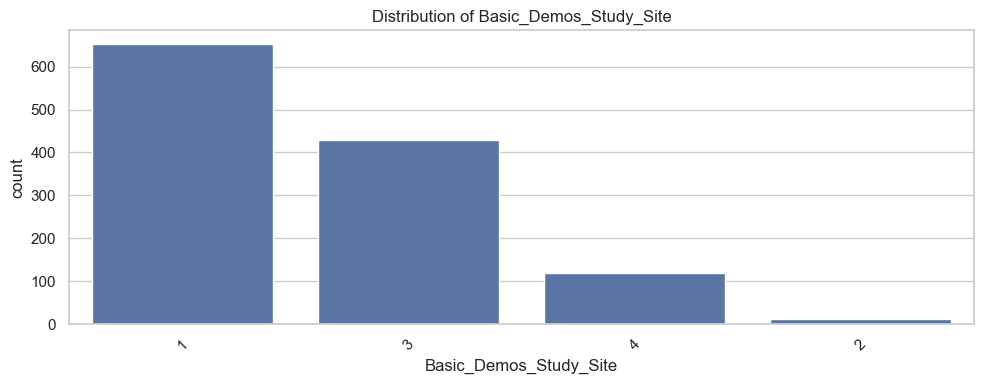

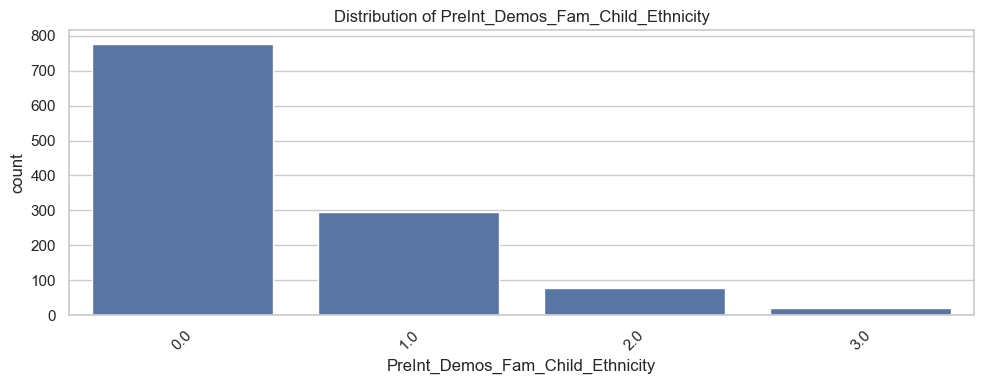

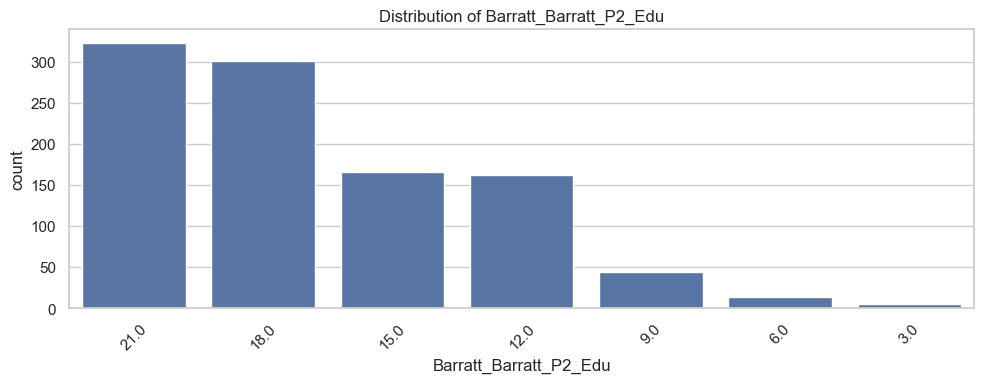

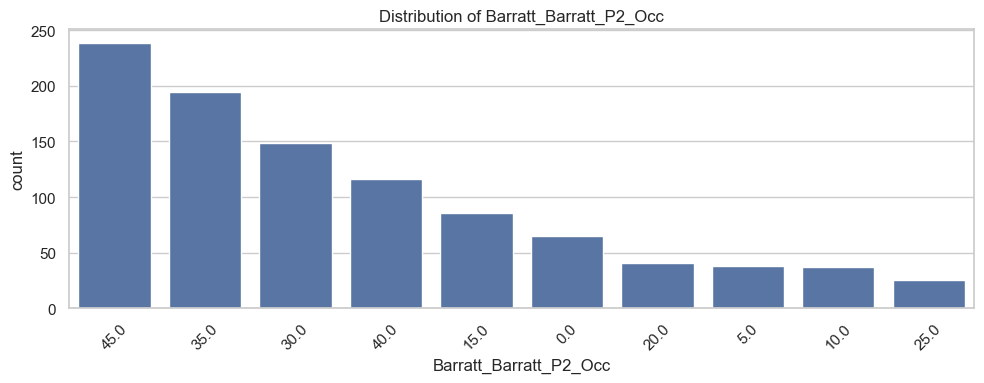

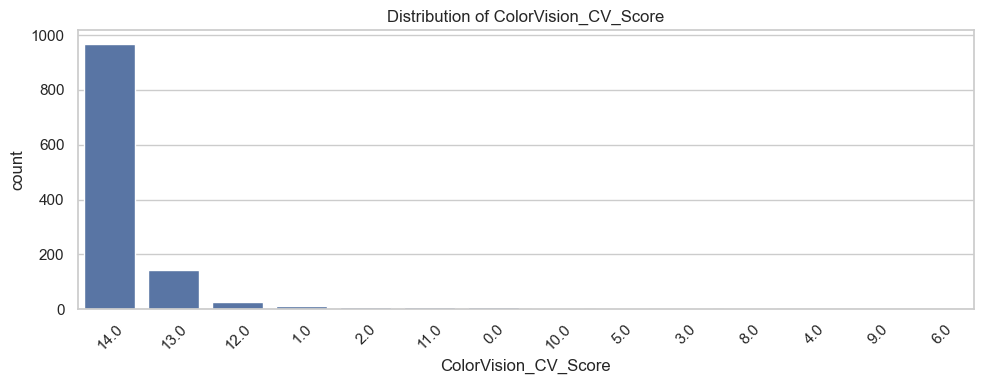

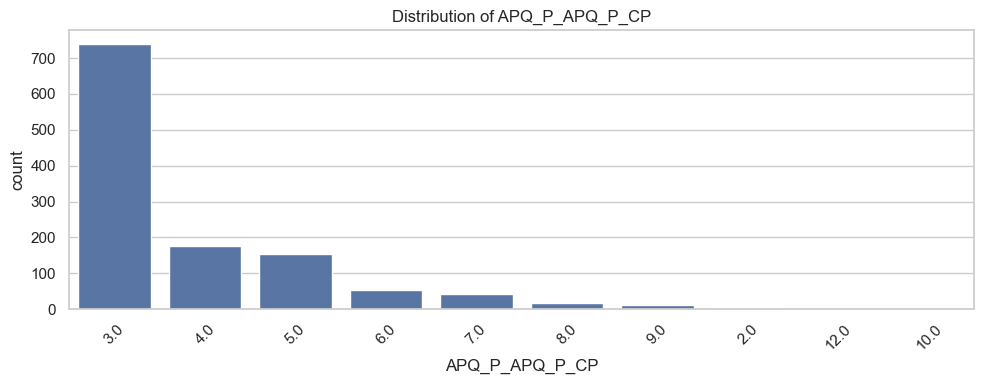

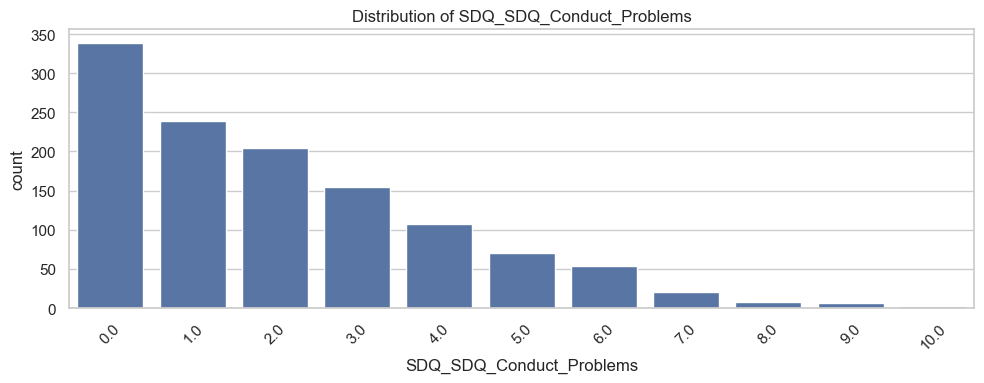

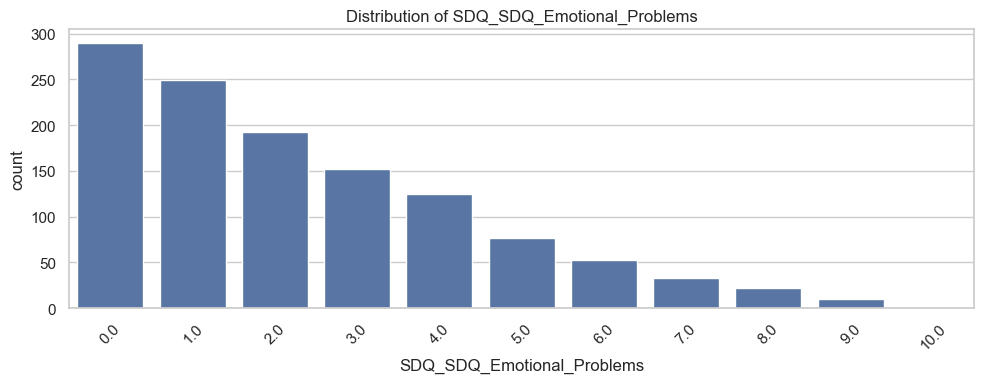

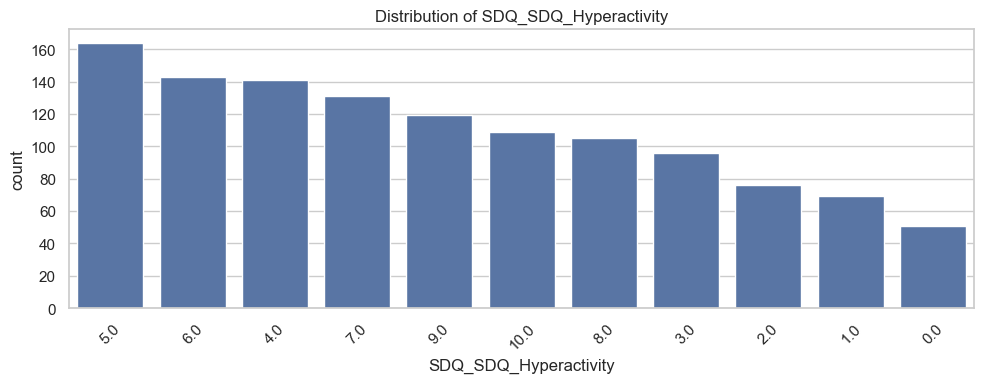

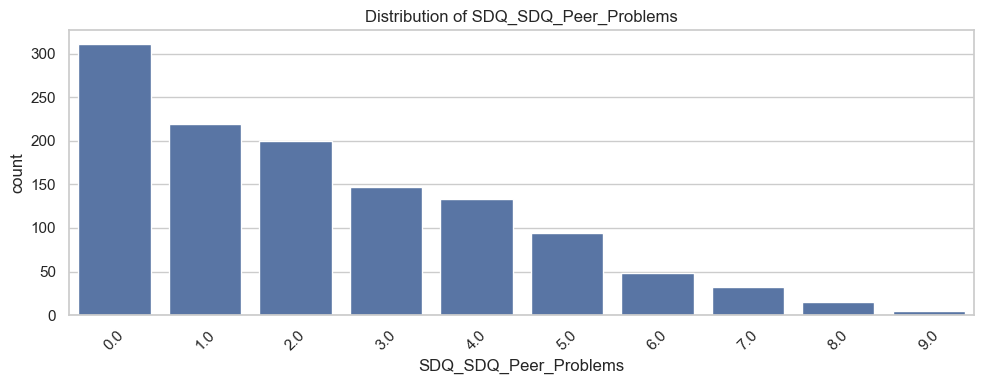

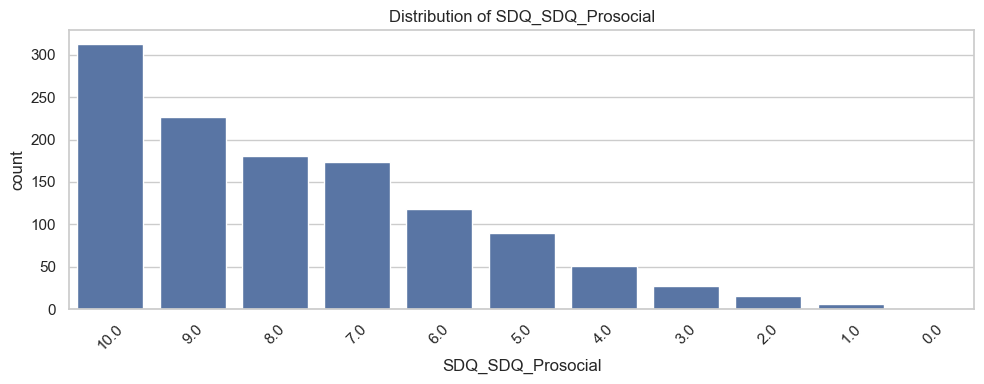

In [13]:

for col in nominal_attributes:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=metadata, x=col, order=metadata[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


2. Histograms for Numeric Attributes


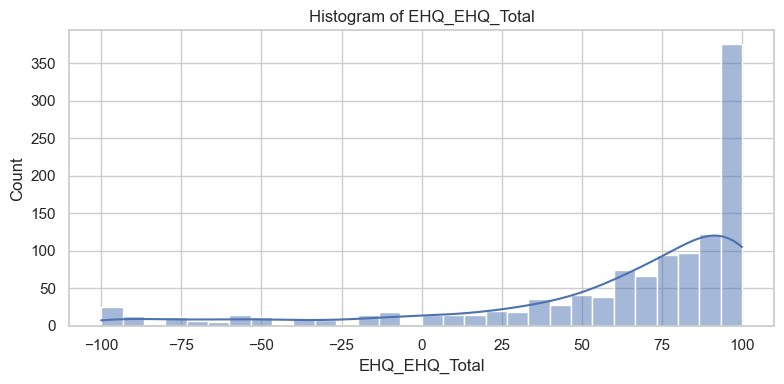

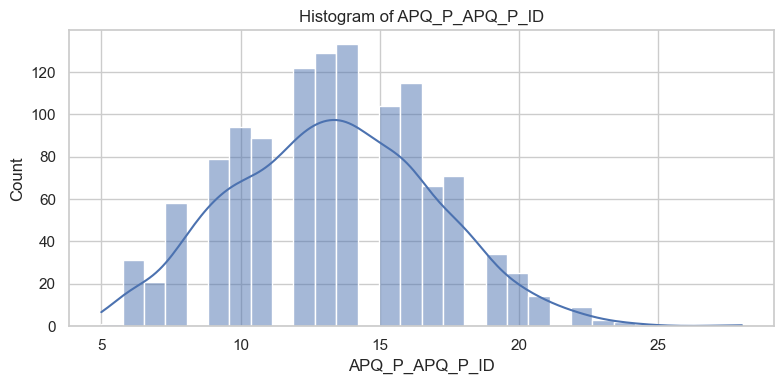

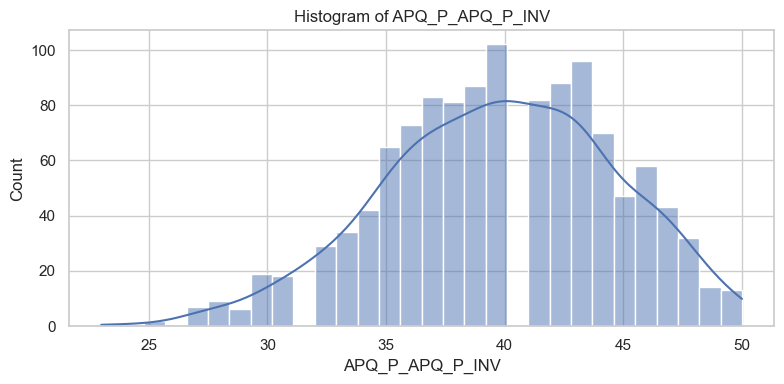

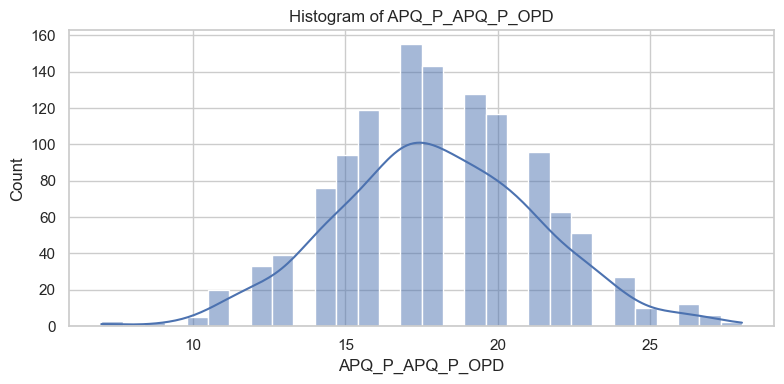

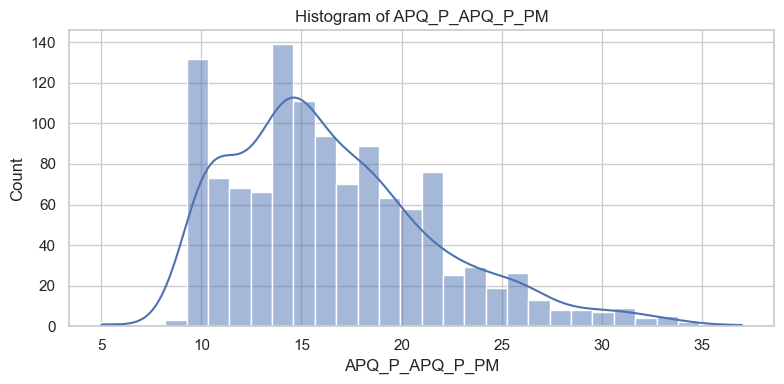

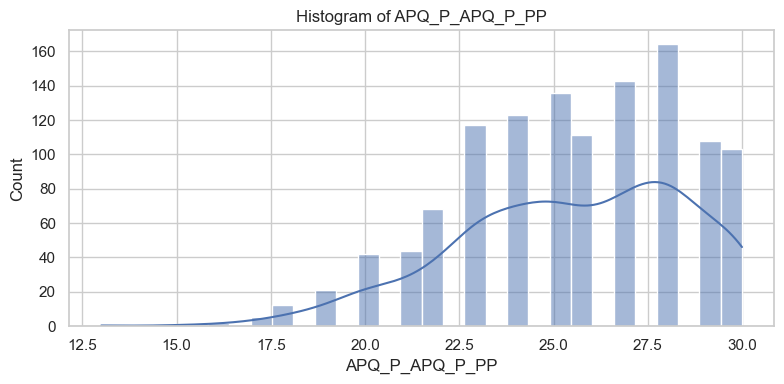

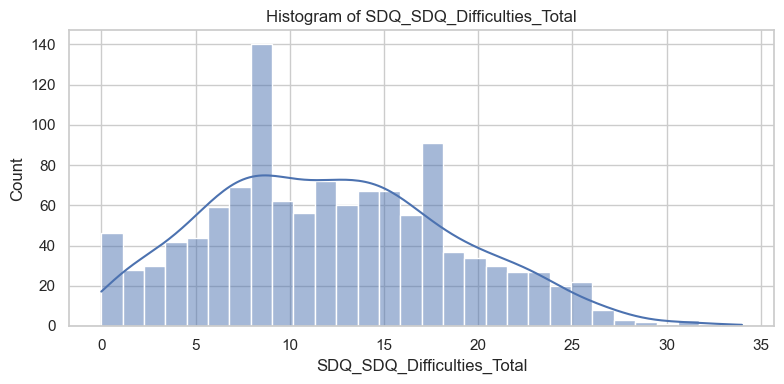

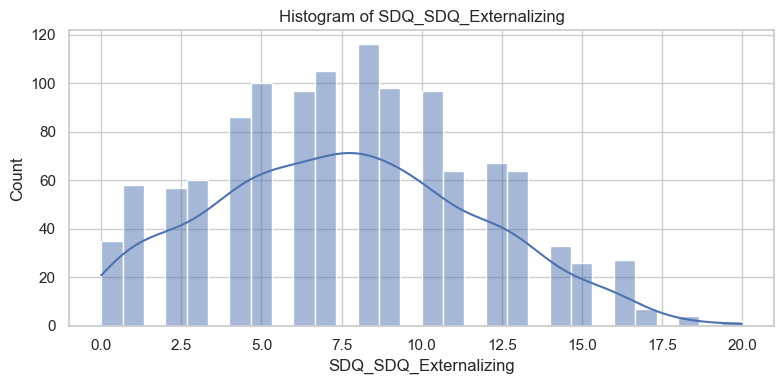

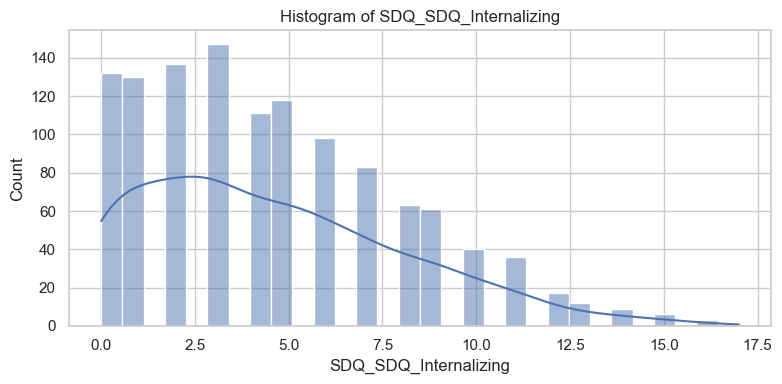

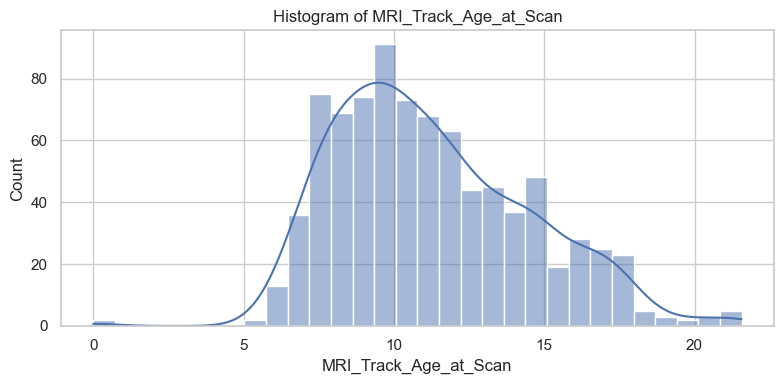

In [15]:

for col in numeric_attributes:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=metadata, x=col, kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()


3. Countplots for Binary Attributes

C:\Users\ADESH BUSARI\AppData\Local\Temp\ipykernel_1072\1949731695.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=plot_data, y=col, palette=palette)
C:\Users\ADESH BUSARI\AppData\Local\Temp\ipykernel_1072\1949731695.py:20: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(data=plot_data, y=col, palette=palette)


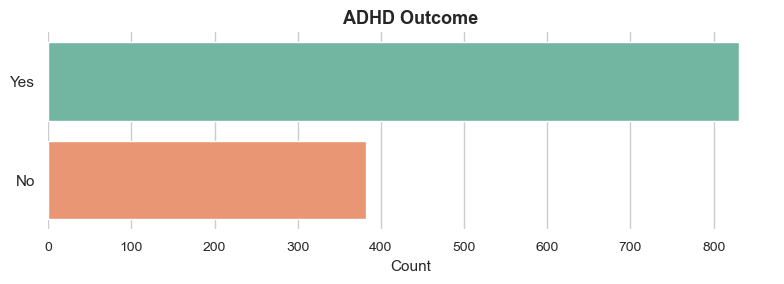

C:\Users\ADESH BUSARI\AppData\Local\Temp\ipykernel_1072\1949731695.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=plot_data, y=col, palette=palette)
C:\Users\ADESH BUSARI\AppData\Local\Temp\ipykernel_1072\1949731695.py:20: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(data=plot_data, y=col, palette=palette)


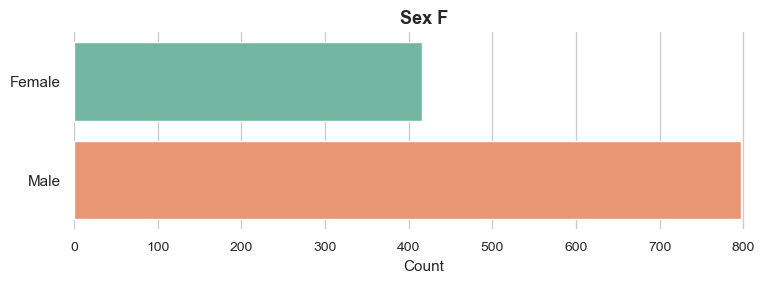

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean and minimal theme
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")

# Copy and map labels for better readability
plot_data = metadata.copy()

if 'ADHD_Outcome' in plot_data.columns:
    plot_data['ADHD_Outcome'] = plot_data['ADHD_Outcome'].map({0: 'No', 1: 'Yes'})

if 'Sex_F' in plot_data.columns:
    plot_data['Sex_F'] = plot_data['Sex_F'].map({0: 'Male', 1: 'Female'})

# Plot settings for vertical, narrow layout
for col in binary_attributes:
    plt.figure(figsize=(8, 3))  # Narrower width, taller height
    ax = sns.countplot(data=plot_data, y=col, palette=palette)
    plt.title(f"{col.replace('_', ' ')}", fontsize=13, weight='bold')
    plt.xlabel("Count", fontsize=11)
    plt.ylabel("")  # No need to repeat column name on y-axis
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=11)
    sns.despine(left=True, bottom=True)  # Clean up borders
    plt.tight_layout()
    plt.show()

C:\Users\ADESH BUSARI\AppData\Local\Temp\ipykernel_1072\1359350261.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_data, y=col, palette=palette_to_use)


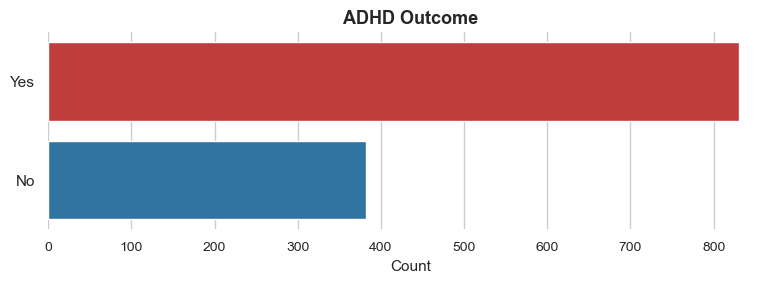

C:\Users\ADESH BUSARI\AppData\Local\Temp\ipykernel_1072\1359350261.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_data, y=col, palette=palette_to_use)


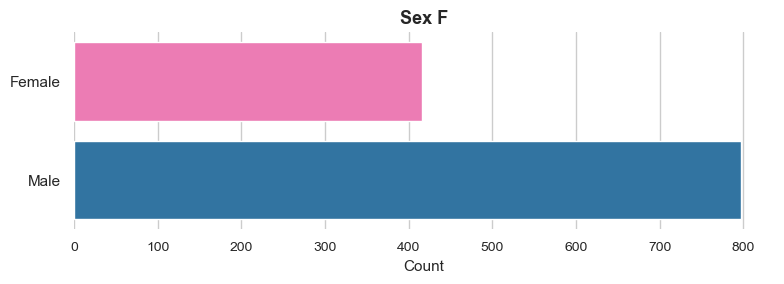

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean visual style
sns.set_theme(style="whitegrid")

# Create a copy of metadata for plotting
plot_data = metadata.copy()

# Map values for clearer labels
if 'ADHD_Outcome' in plot_data.columns:
    plot_data['ADHD_Outcome'] = plot_data['ADHD_Outcome'].map({0: 'No', 1: 'Yes'})

if 'Sex_F' in plot_data.columns:
    plot_data['Sex_F'] = plot_data['Sex_F'].map({0: 'Male', 1: 'Female'})

# Define custom colors for specific attributes
custom_palettes = {
    'ADHD_Outcome': {"No": "#1f77b4", "Yes": "#d62728"},   # Blue, Red
    'Sex_F': {"Male": "#1f77b4", "Female": "#ff69b4"}      # Blue, Pink
}

# Plot each binary attribute
for col in binary_attributes:
    plt.figure(figsize=(8, 3))  # Narrow and tall
    palette_to_use = custom_palettes.get(col, sns.color_palette("Set2"))

    sns.countplot(data=plot_data, y=col, palette=palette_to_use)

    plt.title(f"{col.replace('_', ' ')}", fontsize=13, weight='bold')
    plt.xlabel("Count", fontsize=11)
    plt.ylabel("")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=11)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

4. Correlation Heatmap (Only Numeric)

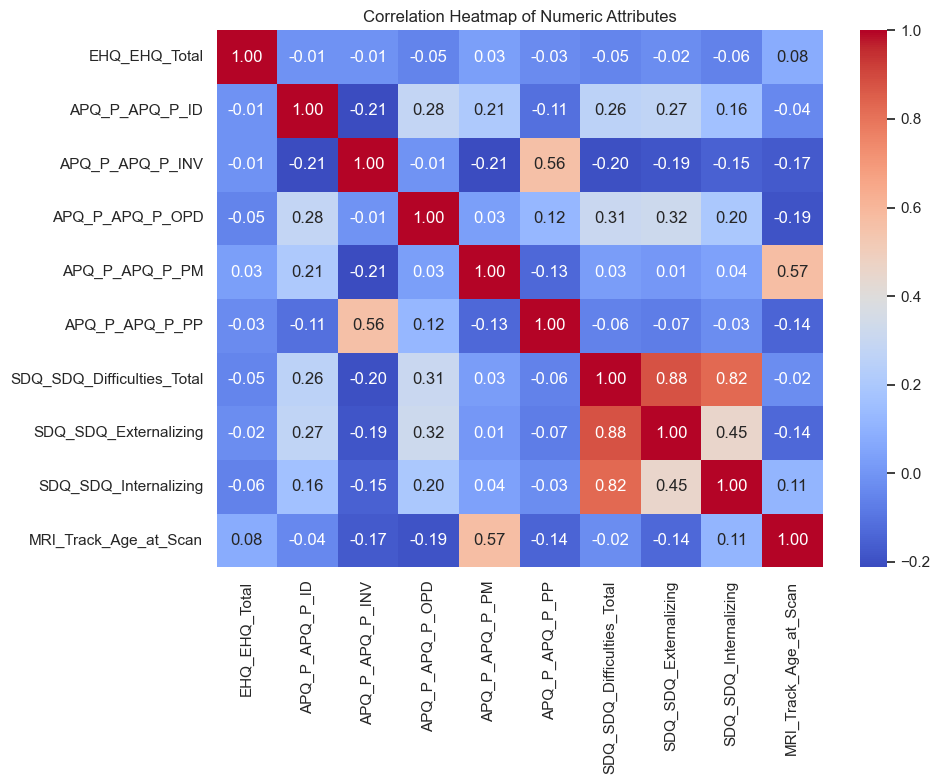

In [22]:

plt.figure(figsize=(10, 8))
corr = metadata[numeric_attributes].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Attributes")
plt.tight_layout()
plt.show()

5. Boxplots by ADHD Outcome

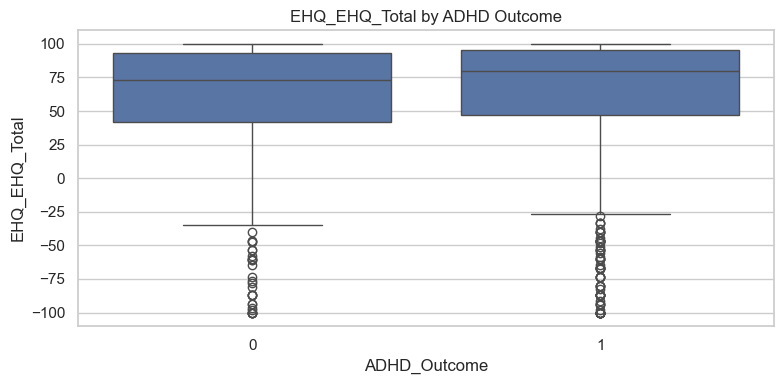

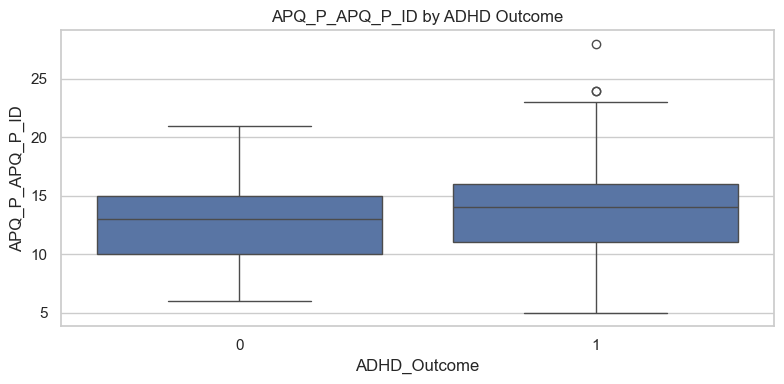

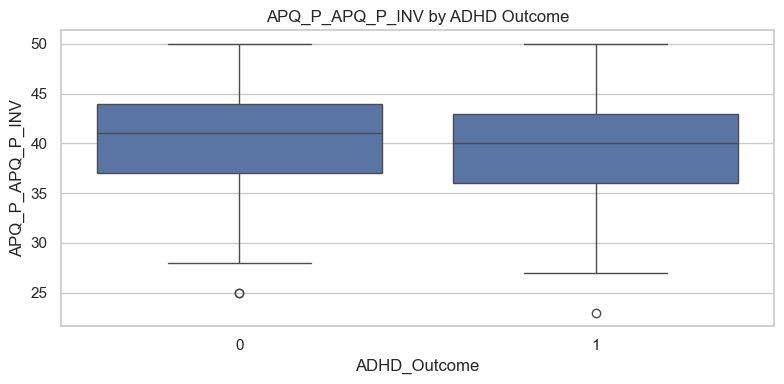

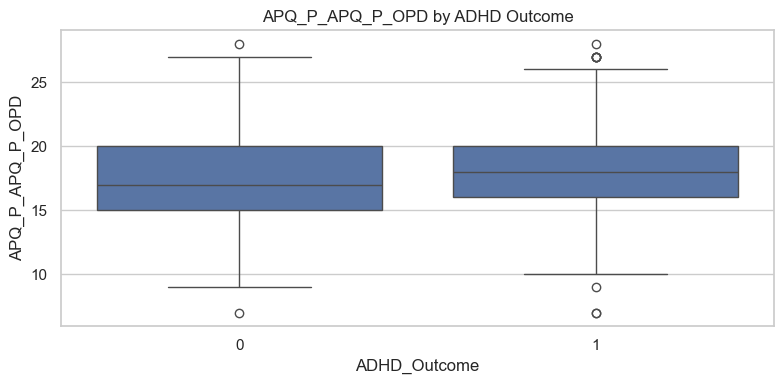

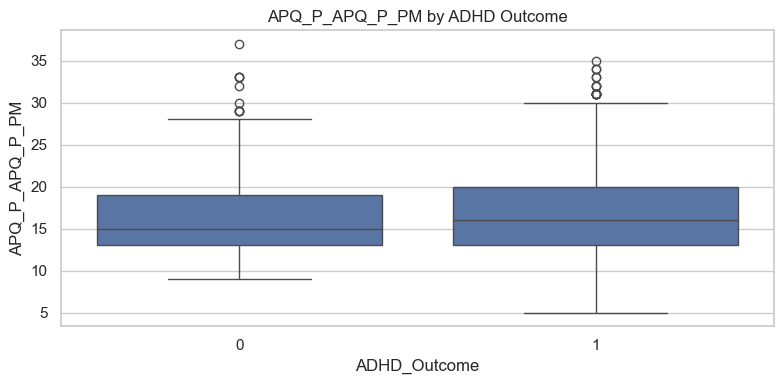

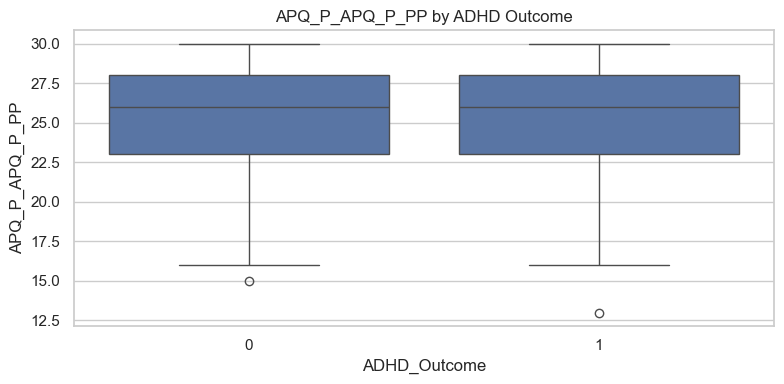

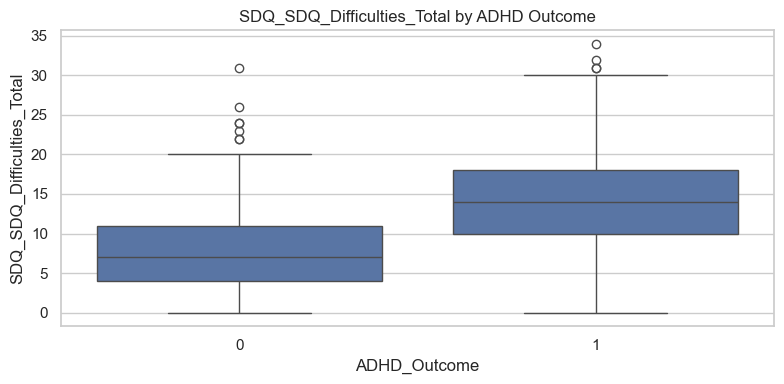

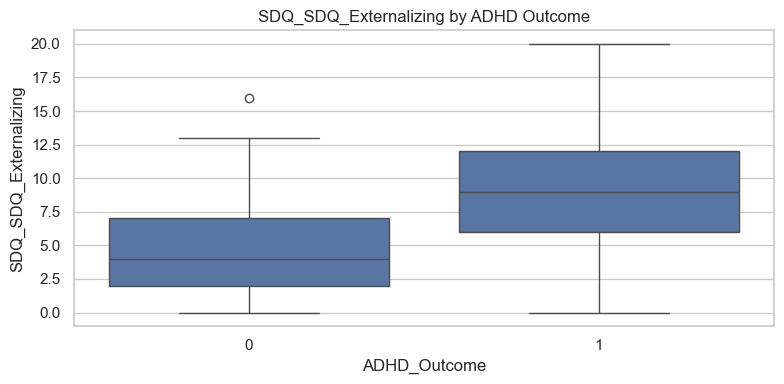

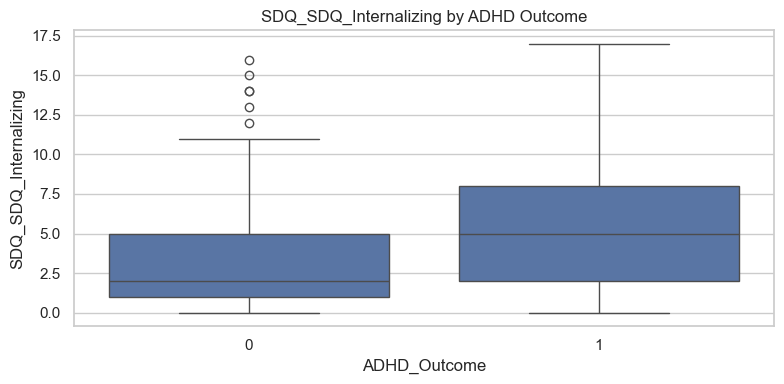

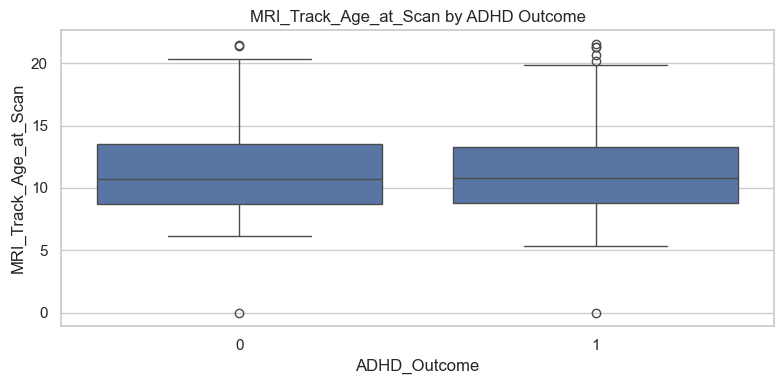

In [25]:

for col in numeric_attributes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=metadata, x="ADHD_Outcome", y=col)
    plt.title(f"{col} by ADHD Outcome")
    plt.tight_layout()
    plt.show()

pie chart for better understanding 

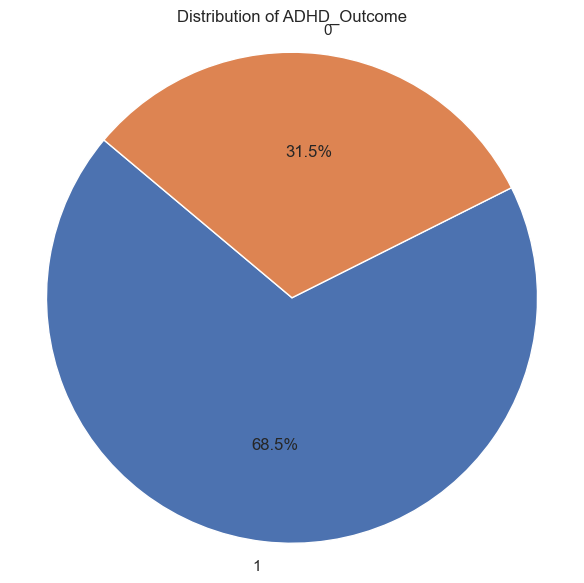

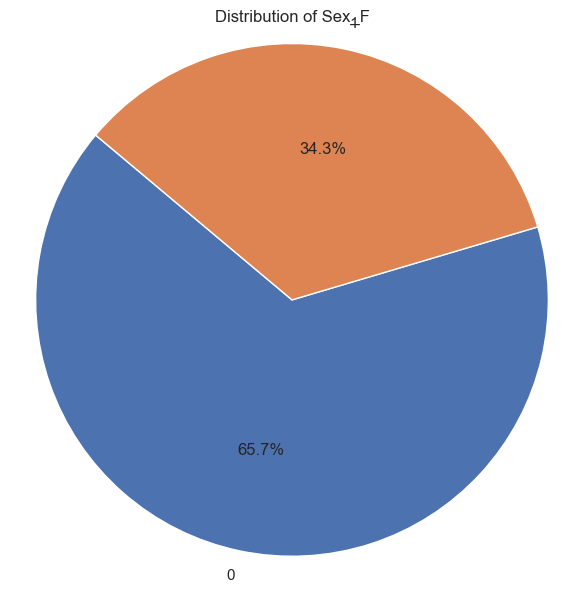

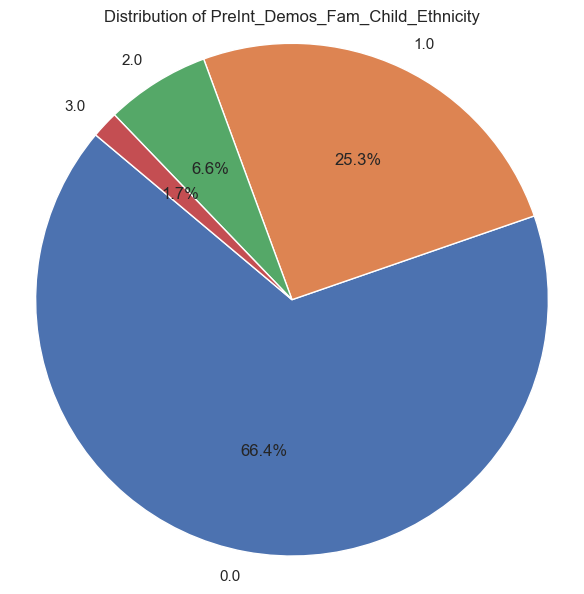

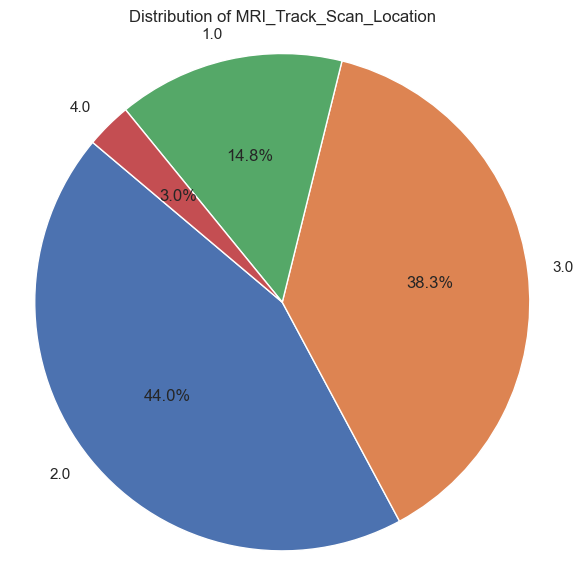

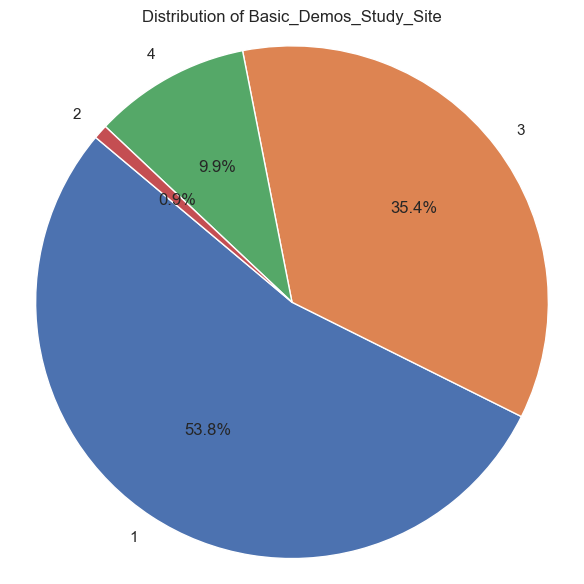

In [28]:
import matplotlib.pyplot as plt

# Attributes that are suitable for pie charts
pie_chart_attributes = ['ADHD_Outcome', 'Sex_F', 'PreInt_Demos_Fam_Child_Ethnicity',
                        'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Basic_Demos_Study_Site']

# Plot pie charts
for col in pie_chart_attributes:
    value_counts = metadata[col].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Distribution of {col}")
    plt.axis('equal')  # Equal aspect ratio for a perfect circle
    plt.tight_layout()
    plt.show()


# Data Preprocessing:

In [4]:
import numpy as np
import pandas as pd

# Load the .npy file and extract the metadata
data = np.load("final_combined_new.npy", allow_pickle=True).item()
metadata = data['metadata']

# Check for missing values
missing_values = metadata.isnull().sum()

# Show all columns (even if 0 missing), exactly like your format
print(missing_values)

participant_id                        0
ADHD_Outcome                          0
Sex_F                                 0
Basic_Demos_Enroll_Year               0
Basic_Demos_Study_Site                0
PreInt_Demos_Fam_Child_Ethnicity     43
PreInt_Demos_Fam_Child_Race          54
MRI_Track_Scan_Location               3
Barratt_Barratt_P1_Edu               15
Barratt_Barratt_P1_Occ               31
Barratt_Barratt_P2_Edu              198
Barratt_Barratt_P2_Occ              222
EHQ_EHQ_Total                        13
ColorVision_CV_Score                 23
APQ_P_APQ_P_CP                       12
APQ_P_APQ_P_ID                       12
APQ_P_APQ_P_INV                      12
APQ_P_APQ_P_OPD                      12
APQ_P_APQ_P_PM                       12
APQ_P_APQ_P_PP                       12
SDQ_SDQ_Conduct_Problems              9
SDQ_SDQ_Difficulties_Total            9
SDQ_SDQ_Emotional_Problems            9
SDQ_SDQ_Externalizing                 9
SDQ_SDQ_Generating_Impact             9


"MRI_Track_Age_at_Scan has 360 missing values (~30% of records), which could affect analyses involving age-based trends or model training. It’s important to either impute these missing values or exclude the column depending on its relevance and the impact on data integrity." 
for ML its better to replace the null values with mean, median or mode.

## Skewness

In [8]:
import numpy as np
import pandas as pd

# Load the dataset
data = np.load("final_combined_new.npy", allow_pickle=True).item()
metadata = data['metadata']

# Select numerical columns (int and float types)
numerical_data = metadata.select_dtypes(include=['int64', 'float64'])

# Compute skewness for each numerical column
skewness = numerical_data.skew()

# Display results
print("Skewness of numerical attributes:")
print(skewness)


Skewness of numerical attributes:
ADHD_Outcome                       -0.797906
Sex_F                               0.662501
Basic_Demos_Enroll_Year            -0.442314
Basic_Demos_Study_Site              0.377694
PreInt_Demos_Fam_Child_Ethnicity    1.596605
PreInt_Demos_Fam_Child_Race         1.294660
MRI_Track_Scan_Location            -0.117768
Barratt_Barratt_P1_Edu             -1.355061
Barratt_Barratt_P1_Occ             -0.552481
Barratt_Barratt_P2_Edu             -0.809369
Barratt_Barratt_P2_Occ             -0.821319
EHQ_EHQ_Total                      -1.671572
ColorVision_CV_Score               -4.986434
APQ_P_APQ_P_CP                      1.903543
APQ_P_APQ_P_ID                      0.157783
APQ_P_APQ_P_INV                    -0.242311
APQ_P_APQ_P_OPD                     0.043384
APQ_P_APQ_P_PM                      0.905412
APQ_P_APQ_P_PP                     -0.521221
SDQ_SDQ_Conduct_Problems            1.001030
SDQ_SDQ_Difficulties_Total          0.318675
SDQ_SDQ_Emotional_Pro

## Removing null values

In [31]:
import numpy as np
import pandas as pd

# 🔹 Load your existing file
data = np.load("final_combined_new.npy", allow_pickle=True).item()

# 🔹 Extract metadata and features
metadata = data['metadata']
features = data['features']

# 🔒 Backup untouched columns
original_outcome = metadata['ADHD_Outcome'].copy()
original_sex = metadata['Sex_F'].copy()

# 🚫 Columns to exclude from any filling
exclude_columns = ['ADHD_Outcome', 'Sex_F']

# 🔁 Only fill missing values in columns that:
# 1. Are not in exclude list
# 2. Actually have missing values
for column in metadata.columns:
    if column in exclude_columns or metadata[column].isnull().sum() == 0:
        continue  # Skip excluded or fully filled columns

    if metadata[column].dtype == 'float64':
        mean_val = metadata[column].mean()
        median_val = metadata[column].median()
        skewness = metadata[column].skew()

        # Use mean for symmetric data, median for skewed
        if abs(skewness) < 0.5:
            metadata[column] = metadata[column].fillna(mean_val)
        else:
            metadata[column] = metadata[column].fillna(median_val)

    elif metadata[column].dtype == 'object':
        mode_val = metadata[column].mode()[0]
        metadata[column] = metadata[column].fillna(mode_val)

# 🔁 Restore untouched columns exactly as they were
metadata['ADHD_Outcome'] = original_outcome
metadata['Sex_F'] = original_sex

# ✅ Replace cleaned metadata and features
data['metadata'] = metadata
data['features'] = features

# 💾 Save the cleaned file
np.save("final_combined_withoutnull1.npy", data)

# 🔍 Final sanity check
print("✅ Done. Missing values filled only in allowed columns.")
print("\n🔎 Null count in ADHD_Outcome and Sex_F:")
print(metadata[['ADHD_Outcome', 'Sex_F']].isnull().sum())

print("\n🔍 Total null count across all columns:")
print(metadata.isnull().sum()[metadata.isnull().sum() > 0])


✅ Done. Missing values filled only in allowed columns.

🔎 Null count in ADHD_Outcome and Sex_F:
ADHD_Outcome    0
Sex_F           0
dtype: int64

🔍 Total null count across all columns:
Series([], dtype: int64)


In [33]:
print(metadata.isnull().sum())


participant_id                      0
ADHD_Outcome                        0
Sex_F                               0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
Barratt_Barratt_P1_Occ              0
Barratt_Barratt_P2_Edu              0
Barratt_Barratt_P2_Occ              0
EHQ_EHQ_Total                       0
ColorVision_CV_Score                0
APQ_P_APQ_P_CP                      0
APQ_P_APQ_P_ID                      0
APQ_P_APQ_P_INV                     0
APQ_P_APQ_P_OPD                     0
APQ_P_APQ_P_PM                      0
APQ_P_APQ_P_PP                      0
SDQ_SDQ_Conduct_Problems            0
SDQ_SDQ_Difficulties_Total          0
SDQ_SDQ_Emotional_Problems          0
SDQ_SDQ_Externalizing               0
SDQ_SDQ_Generating_Impact           0
SDQ_SDQ_Hyperactivity               0
SDQ_SDQ_Inte

## Skewness after replacing null values

In [35]:
import numpy as np
import pandas as pd

# Load the .npy file
data = np.load("final_combined_withoutnull1.npy", allow_pickle=True).item()
metadata = data['metadata']

# Select only numerical attributes (int and float)
numerical_data = metadata.select_dtypes(include=['float64', 'int64'])

# Calculate skewness
skewness = numerical_data.skew()

# Display results
print("Skewness of numerical attributes:")
print(skewness)


Skewness of numerical attributes:
ADHD_Outcome                       -0.797906
Sex_F                               0.662501
Basic_Demos_Enroll_Year            -0.442314
Basic_Demos_Study_Site              0.377694
PreInt_Demos_Fam_Child_Ethnicity    1.650594
PreInt_Demos_Fam_Child_Race         1.360333
MRI_Track_Scan_Location            -0.117913
Barratt_Barratt_P1_Edu             -1.364926
Barratt_Barratt_P1_Occ             -0.578309
Barratt_Barratt_P2_Edu             -1.014660
Barratt_Barratt_P2_Occ             -1.076299
EHQ_EHQ_Total                      -1.688284
ColorVision_CV_Score               -5.038860
APQ_P_APQ_P_CP                      1.918307
APQ_P_APQ_P_ID                      0.158567
APQ_P_APQ_P_INV                    -0.243516
APQ_P_APQ_P_OPD                     0.043600
APQ_P_APQ_P_PM                      0.912975
APQ_P_APQ_P_PP                     -0.528461
SDQ_SDQ_Conduct_Problems            1.005567
SDQ_SDQ_Difficulties_Total          0.319860
SDQ_SDQ_Emotional_Pro

In [20]:
# import numpy as np

# # Load the numpy .npy file
# data = np.load("final_combined_withoutnull1.npy", allow_pickle=True)

# # Display the keys/attributes in the file (if it's a dictionary-like structure)
# print("Metadata Attributes in .npy file:")
# for key in data.item().keys():
#     print(f"{key}: {data.item()[key]}")


## Before removing outliers:

EHQ_EHQ_Total: 110 outliers


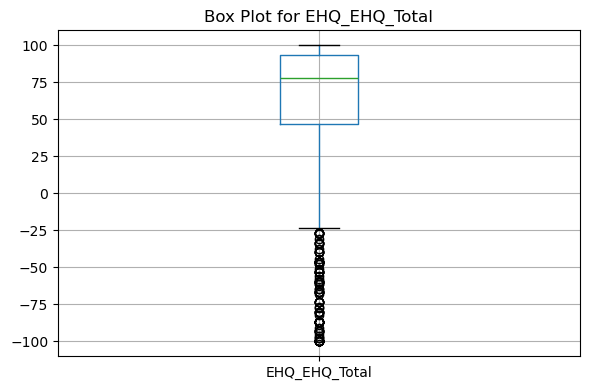

APQ_P_APQ_P_ID: 3 outliers


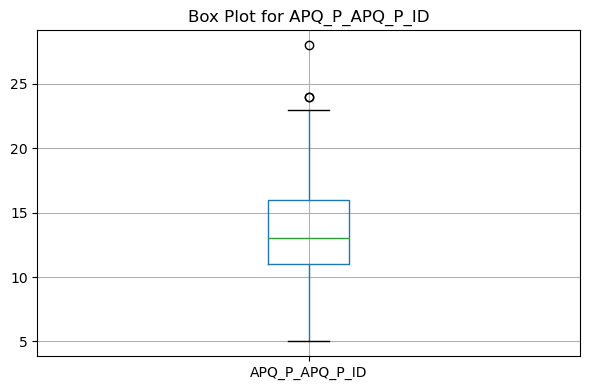

APQ_P_APQ_P_INV: 3 outliers


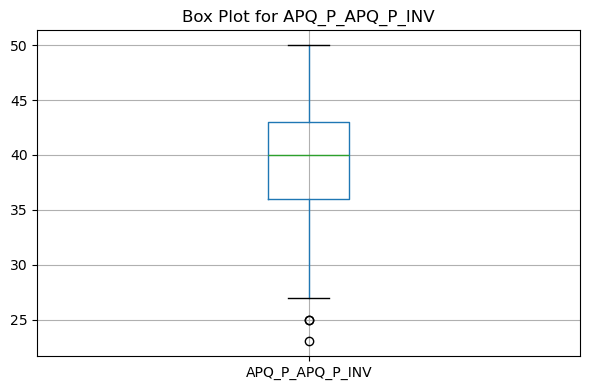

APQ_P_APQ_P_OPD: 13 outliers


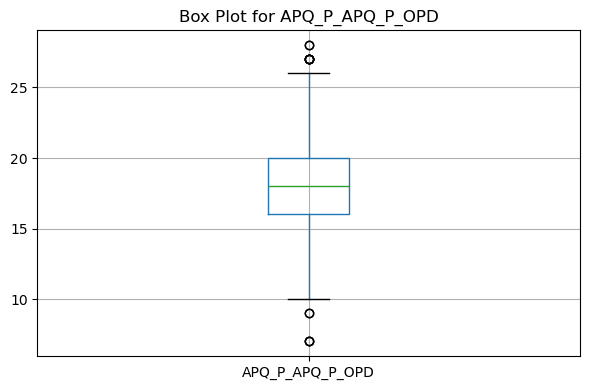

APQ_P_APQ_P_PM: 37 outliers


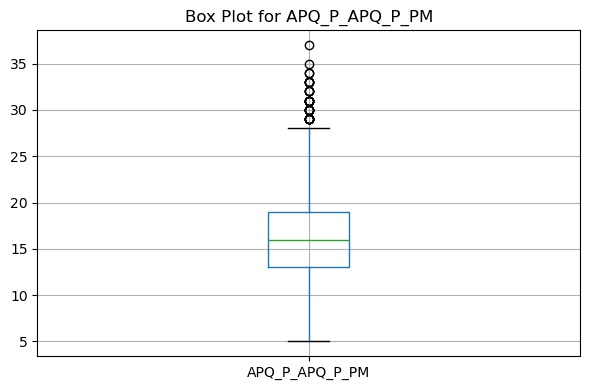

APQ_P_APQ_P_PP: 2 outliers


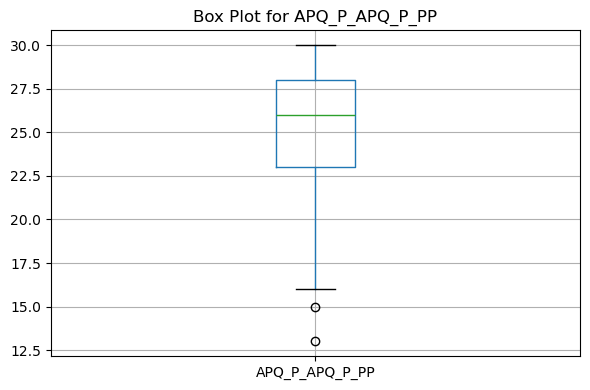

SDQ_SDQ_Difficulties_Total: 1 outliers


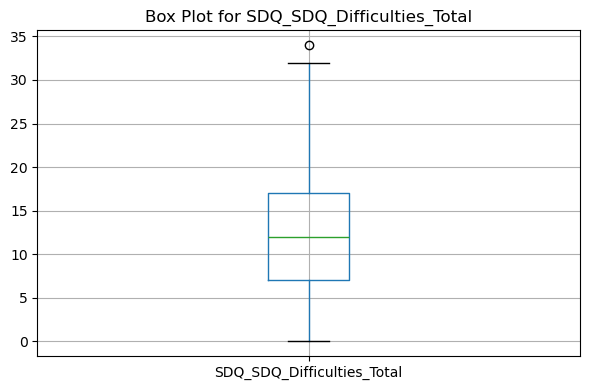

SDQ_SDQ_Externalizing: 7 outliers


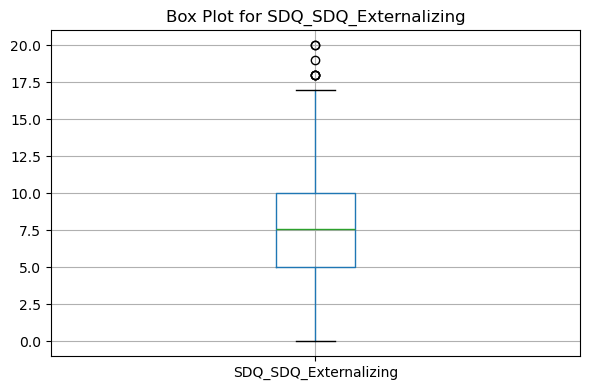

SDQ_SDQ_Internalizing: 10 outliers


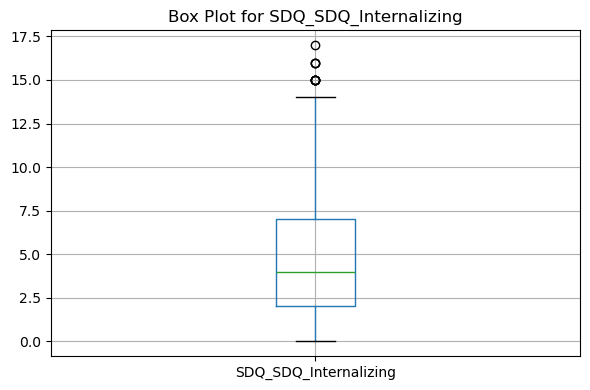

MRI_Track_Age_at_Scan: 106 outliers


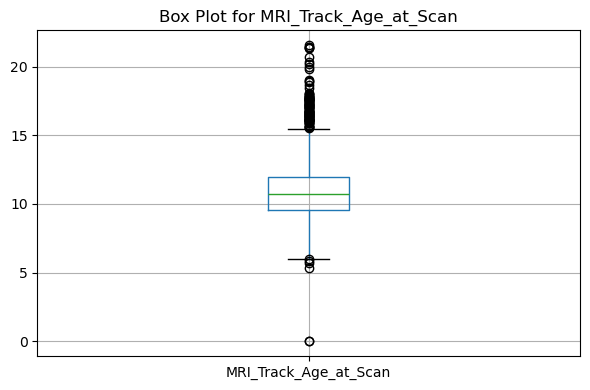

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = np.load("final_combined_withoutnull1.npy", allow_pickle=True).item()
metadata = data['metadata']

# Define numeric attributes (as identified earlier)
numeric_attributes = [
    'EHQ_EHQ_Total', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD',
    'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Internalizing', 'MRI_Track_Age_at_Scan'
]

# Box plot for each numeric attribute
for col in numeric_attributes:
    if col in metadata.columns:
        plt.figure(figsize=(6, 4))
        Q1 = metadata[col].quantile(0.25)
        Q3 = metadata[col].quantile(0.75)
        IQR = Q3 - Q1

        # Optional: Count and print number of outliers
        outliers = metadata[(metadata[col] < Q1 - 1.5 * IQR) | (metadata[col] > Q3 + 1.5 * IQR)]
        print(f"{col}: {len(outliers)} outliers")

        metadata.boxplot(column=col)
        plt.title(f'Box Plot for {col}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Column '{col}' not found in metadata.")


##  After removing outliers:

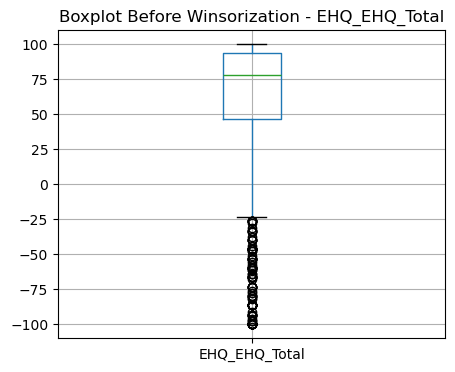

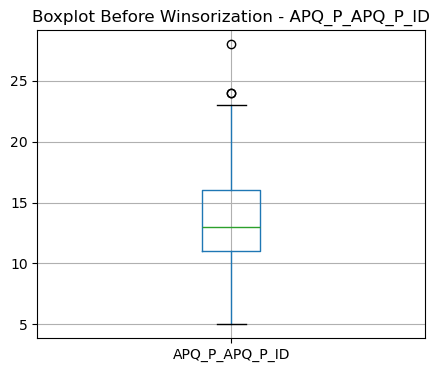

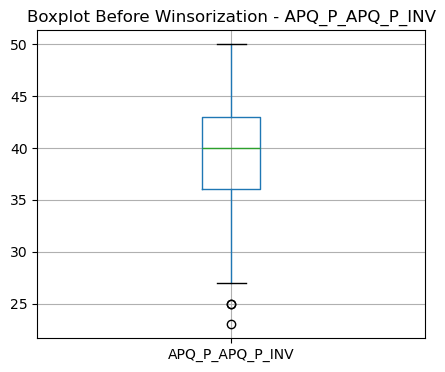

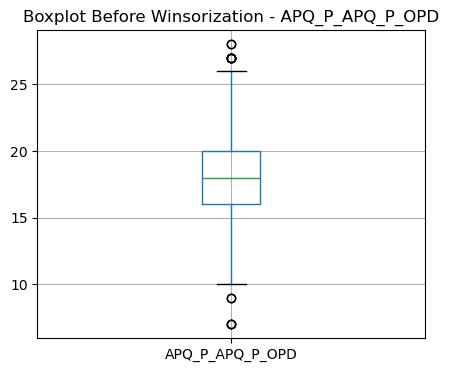

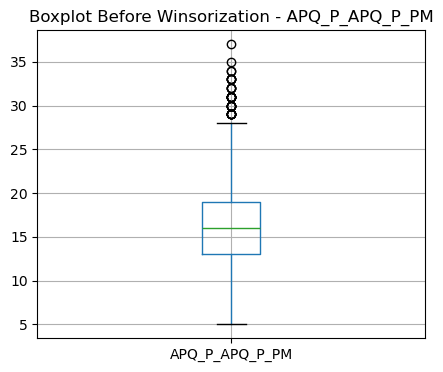

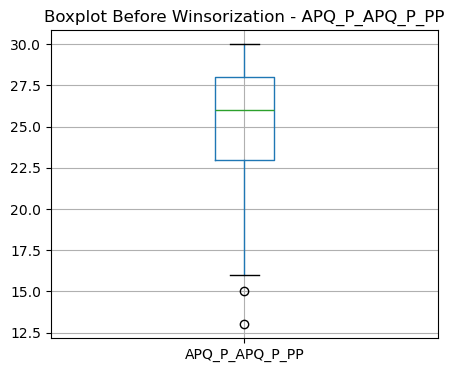

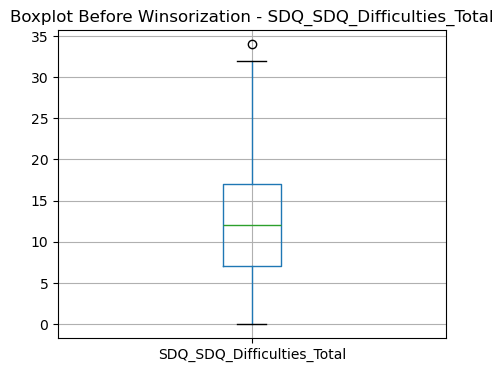

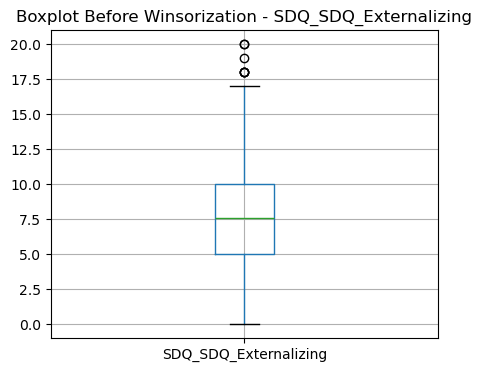

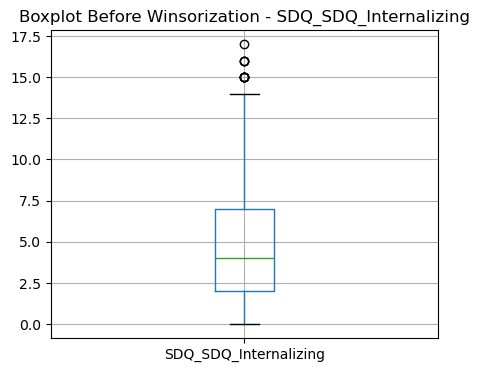

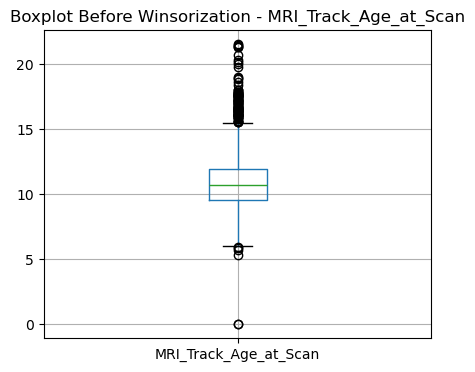

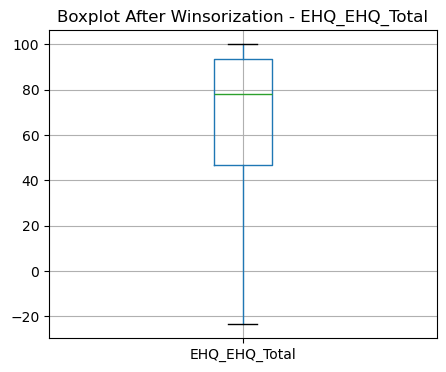

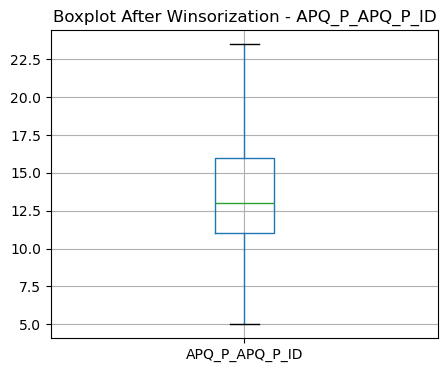

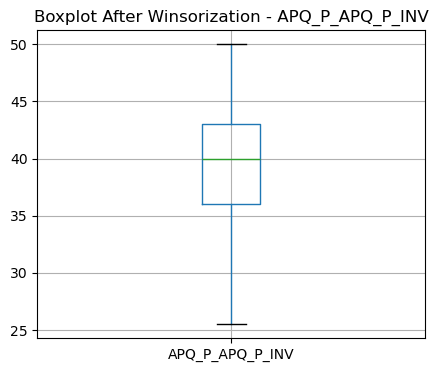

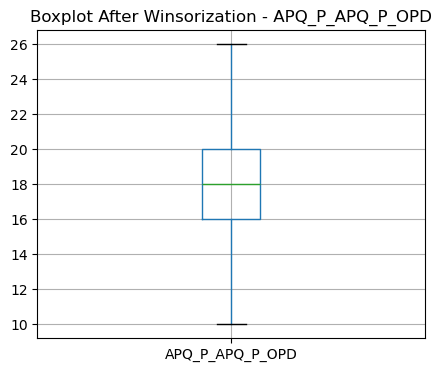

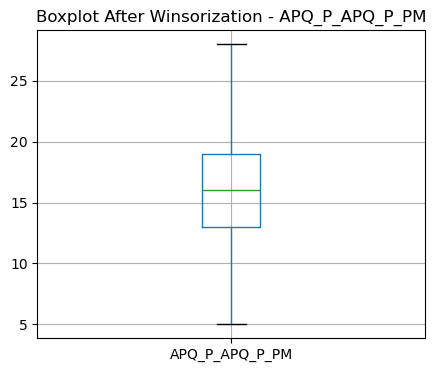

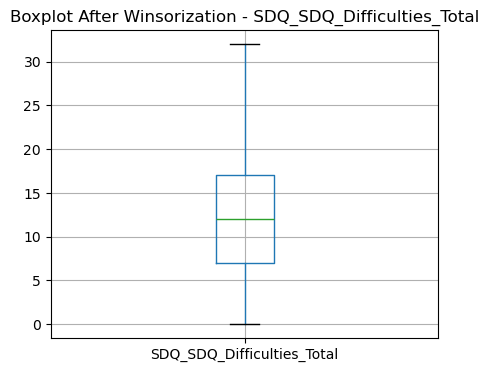

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
data = np.load("final_combined_withoutnull1.npy", allow_pickle=True).item()
metadata = data['metadata'].copy()

# List of numerical columns from your dataset
num_cols = ['EHQ_EHQ_Total', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
            'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Internalizing', 'MRI_Track_Age_at_Scan']

# Plot before winsorization
for col in num_cols:
    plt.figure(figsize=(5, 4))
    metadata.boxplot(column=col)
    plt.title(f'Boxplot Before Winsorization - {col}')
    plt.show()

# Winsorize (cap outliers)
for col in num_cols:
    Q1 = metadata[col].quantile(0.25)
    Q3 = metadata[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply winsorization
    metadata[col] = np.where(metadata[col] < lower_bound, lower_bound,
                             np.where(metadata[col] > upper_bound, upper_bound, metadata[col]))

# Plot after winsorization
for col in num_cols:
    plt.figure(figsize=(5, 4))
    metadata.boxplot(column=col)
    plt.title(f'Boxplot After Winsorization - {col}')
    plt.show()


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
data = np.load("final_preprocessed_for_modeling.npy", allow_pickle=True).item()
metadata = data['metadata'].copy()

# List of numerical columns from your dataset
num_cols = ['EHQ_EHQ_Total', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
            'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Internalizing', 'MRI_Track_Age_at_Scan']

# To store outlier counts
outliers_before = {}
outliers_after = {}

# Detect and Winsorize
for col in num_cols:
    Q1 = metadata[col].quantile(0.25)
    Q3 = metadata[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before
    out_before = ((metadata[col] < lower_bound) | (metadata[col] > upper_bound)).sum()
    outliers_before[col] = out_before

    # Winsorize
    metadata[col] = np.where(metadata[col] < lower_bound, lower_bound,
                             np.where(metadata[col] > upper_bound, upper_bound, metadata[col]))

    # Count outliers after
    out_after = ((metadata[col] < lower_bound) | (metadata[col] > upper_bound)).sum()
    outliers_after[col] = out_after

# Display outlier counts
print("Outliers Before Winsorization:")
for col, count in outliers_before.items():
    print(f"{col}: {count}")

print("\nOutliers After Winsorization:")
for col, count in outliers_after.items():
    print(f"{col}: {count}")


Outliers Before Winsorization:
EHQ_EHQ_Total: 78
APQ_P_APQ_P_ID: 3
APQ_P_APQ_P_INV: 3
APQ_P_APQ_P_OPD: 13
APQ_P_APQ_P_PM: 45
APQ_P_APQ_P_PP: 2
SDQ_SDQ_Difficulties_Total: 1
SDQ_SDQ_Externalizing: 7
SDQ_SDQ_Internalizing: 10
MRI_Track_Age_at_Scan: 106

Outliers After Winsorization:
EHQ_EHQ_Total: 0
APQ_P_APQ_P_ID: 0
APQ_P_APQ_P_INV: 0
APQ_P_APQ_P_OPD: 0
APQ_P_APQ_P_PM: 0
APQ_P_APQ_P_PP: 0
SDQ_SDQ_Difficulties_Total: 0
SDQ_SDQ_Externalizing: 0
SDQ_SDQ_Internalizing: 0
MRI_Track_Age_at_Scan: 0


In [45]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

# Load the original data
data = np.load("final_combined_withoutnull1.npy", allow_pickle=True).item()
metadata = data['metadata']
features = data['features'] 
# List of numeric columns
numeric_cols = ['EHQ_EHQ_Total', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD',
                'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Difficulties_Total',
                'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Internalizing', 'MRI_Track_Age_at_Scan']

# Apply Winsorization to numeric columns
for col in numeric_cols:
    if col in metadata.columns:
        # Winsorize at 5% on both sides
        metadata[col] = winsorize(metadata[col], limits=[0.05, 0.05])

# Replace the metadata in the data dictionary
data['metadata'] = metadata
data['features'] = features
# Save the cleaned data to a new .npy file
np.save("final_preprocessed_for_modeling4.npy", data)

print("✅ Saved the file without outliers as 'final_preprocessed_for_modeling4.npy'")


✅ Saved the file without outliers as 'final_preprocessed_for_modeling4.npy'


In [47]:
import numpy as np
import pandas as pd

# Load the cleaned file
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()

# Extract metadata
metadata = data['metadata']

# Display the first few rows
print("🔍 Preview of cleaned metadata (no outliers):")
print(metadata.head())


🔍 Preview of cleaned metadata (no outliers):
  participant_id  ADHD_Outcome  Sex_F  Basic_Demos_Enroll_Year  \
0   UmrK0vMLopoR             1      1                     2016   
1   CPaeQkhcjg7d             1      0                     2019   
2   Nb4EetVPm3gs             1      0                     2016   
3   p4vPhVu91o4b             1      1                     2018   
4   M09PXs7arQ5E             1      1                     2019   

   Basic_Demos_Study_Site  PreInt_Demos_Fam_Child_Ethnicity  \
0                       1                               0.0   
1                       3                               1.0   
2                       1                               1.0   
3                       3                               0.0   
4                       3                               0.0   

   PreInt_Demos_Fam_Child_Race  MRI_Track_Scan_Location  \
0                          0.0                      1.0   
1                          2.0                      3.0   
2 

# Correlation Analysis:-

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the cleaned data file
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data['metadata']

# Copy for encoding
encoded_metadata = metadata.copy()

# Encode object (categorical) columns using LabelEncoder
label_encoder = LabelEncoder()
for column in encoded_metadata.select_dtypes(include='object').columns:
    encoded_metadata[column] = label_encoder.fit_transform(encoded_metadata[column].astype(str))

# Compute correlation matrix
correlation_matrix = encoded_metadata.corr()

# Display the correlation matrix
print("🔗 Correlation Matrix:")
print(correlation_matrix)

🔗 Correlation Matrix:
                                  participant_id  ADHD_Outcome     Sex_F  \
participant_id                          1.000000      0.008003 -0.029322   
ADHD_Outcome                            0.008003      1.000000 -0.130836   
Sex_F                                  -0.029322     -0.130836  1.000000   
Basic_Demos_Enroll_Year                 0.013051      0.166252 -0.056145   
Basic_Demos_Study_Site                  0.056182      0.085513 -0.044651   
PreInt_Demos_Fam_Child_Ethnicity       -0.021745      0.032662 -0.007363   
PreInt_Demos_Fam_Child_Race             0.000231     -0.036242 -0.003389   
MRI_Track_Scan_Location                 0.043719      0.149432 -0.062799   
Barratt_Barratt_P1_Edu                  0.021428     -0.012722  0.041685   
Barratt_Barratt_P1_Occ                 -0.007134      0.031846  0.047290   
Barratt_Barratt_P2_Edu                 -0.003705     -0.014237  0.009107   
Barratt_Barratt_P2_Occ                  0.041325      0.023755 -0.

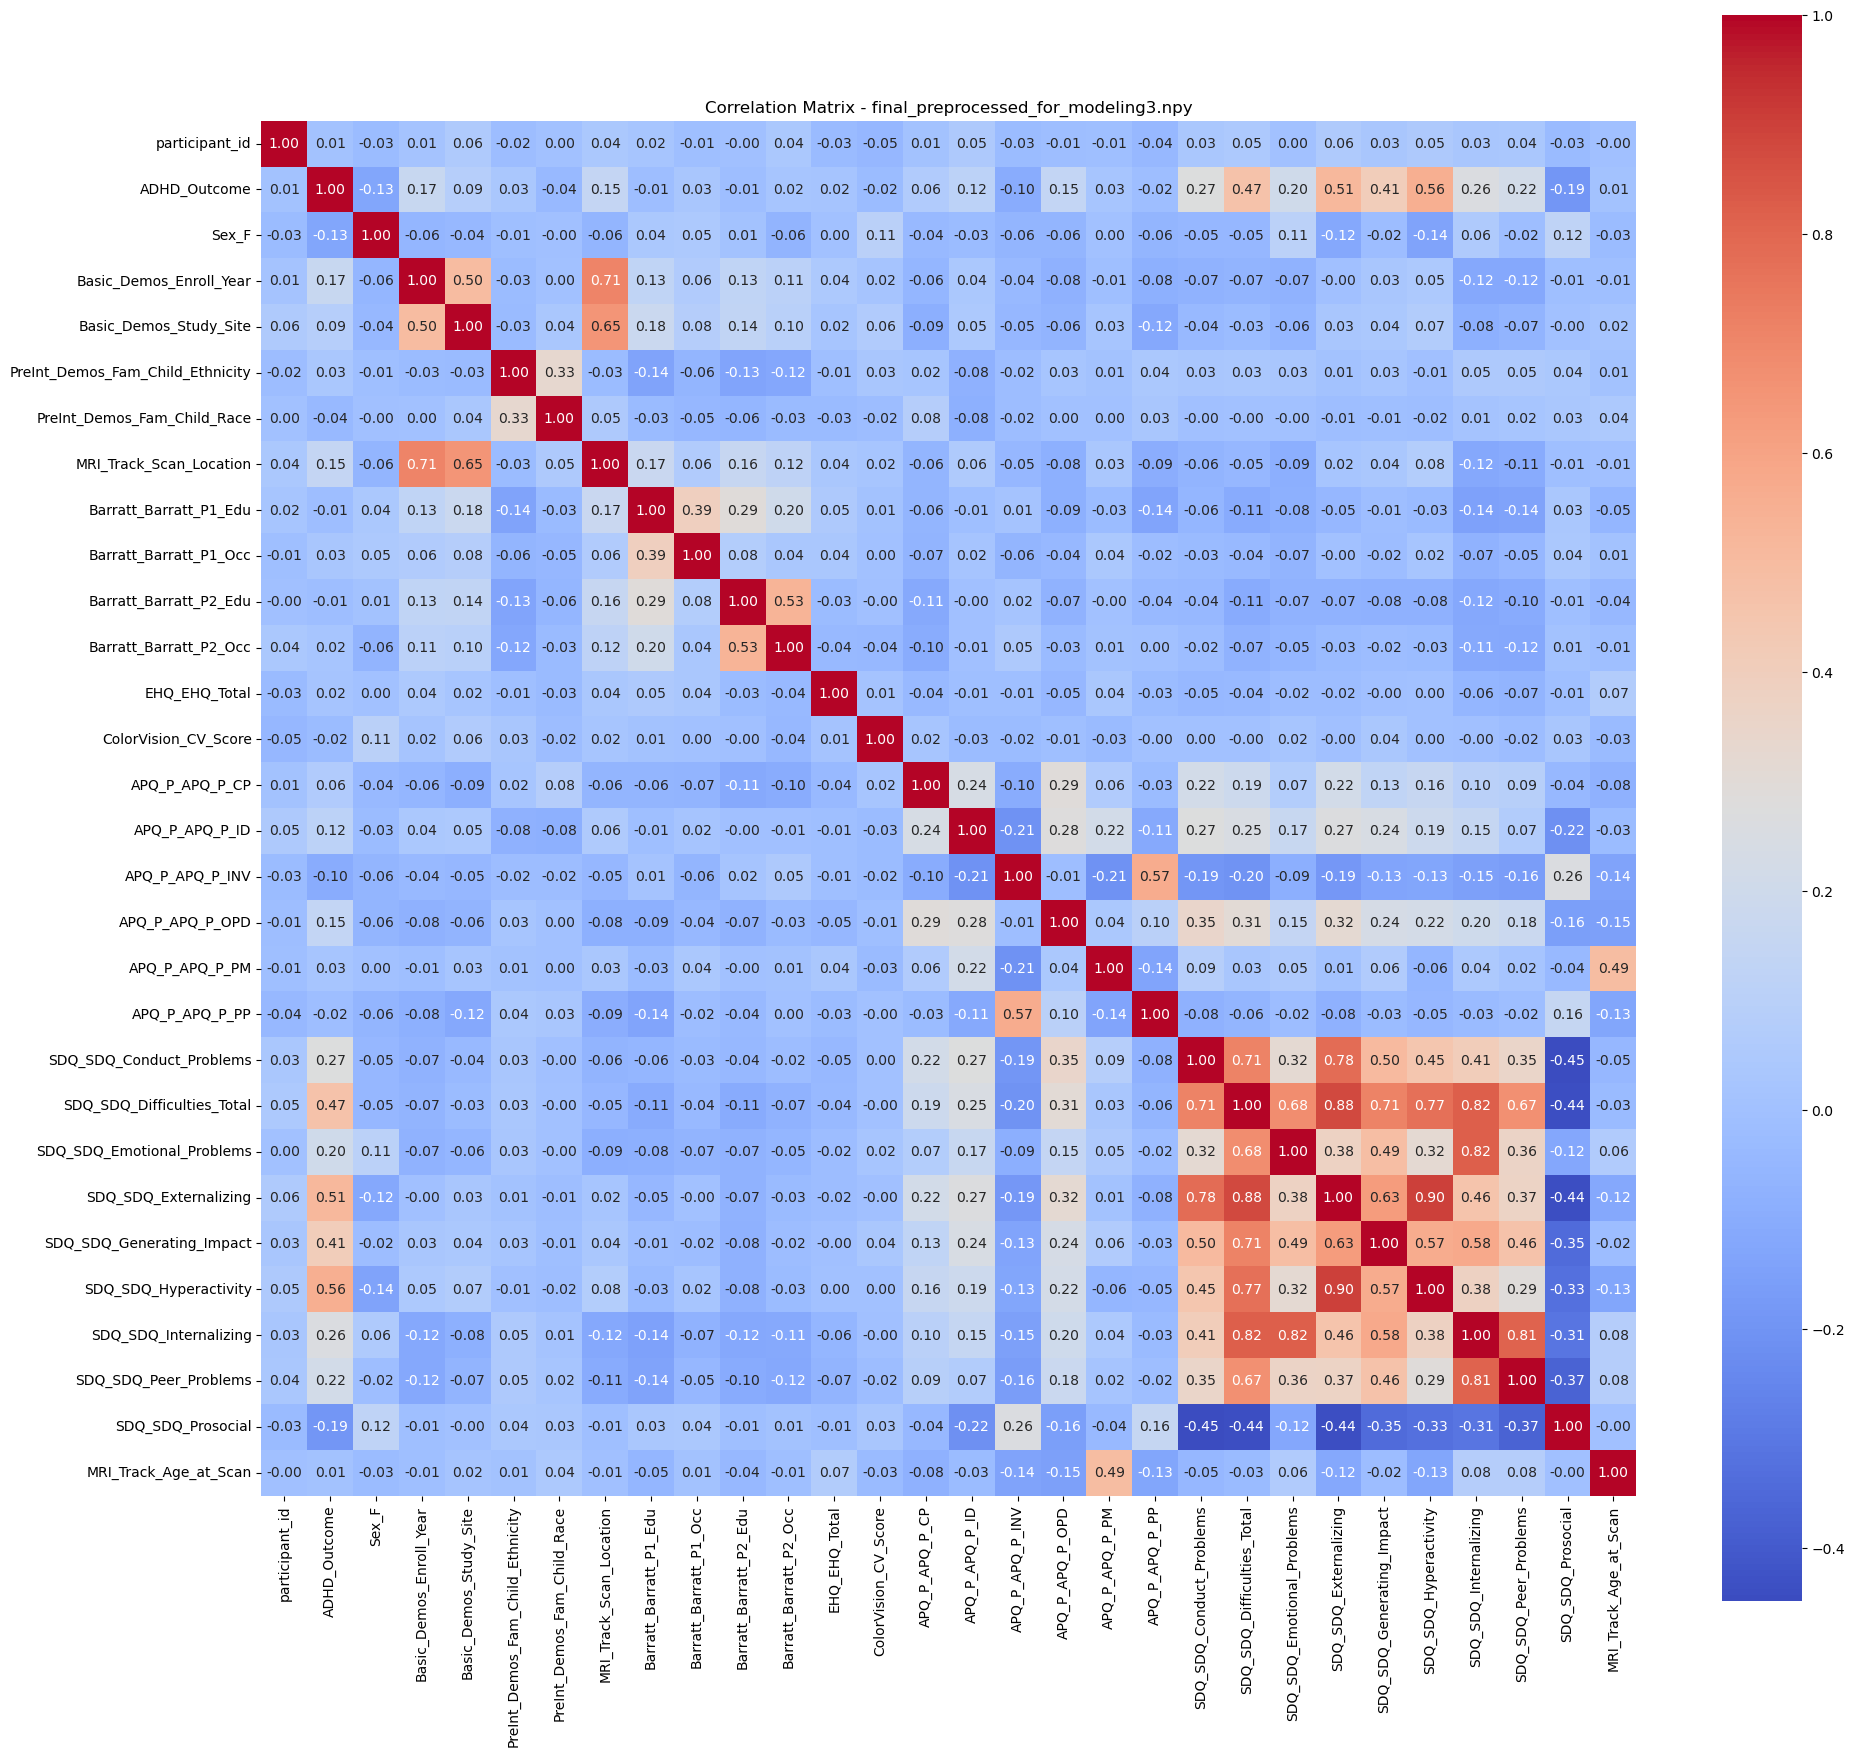

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the cleaned .npy file
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data['metadata']

# Copy to avoid modifying original
encoded_metadata = metadata.copy()

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in encoded_metadata.select_dtypes(include='object').columns:
    encoded_metadata[column] = label_encoder.fit_transform(encoded_metadata[column].astype(str))

# Compute correlation matrix
correlation_matrix = encoded_metadata.corr()

# Plot the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix - final_preprocessed_for_modeling3.npy')
plt.tight_layout()
plt.show()


## 2. Using pairplots:

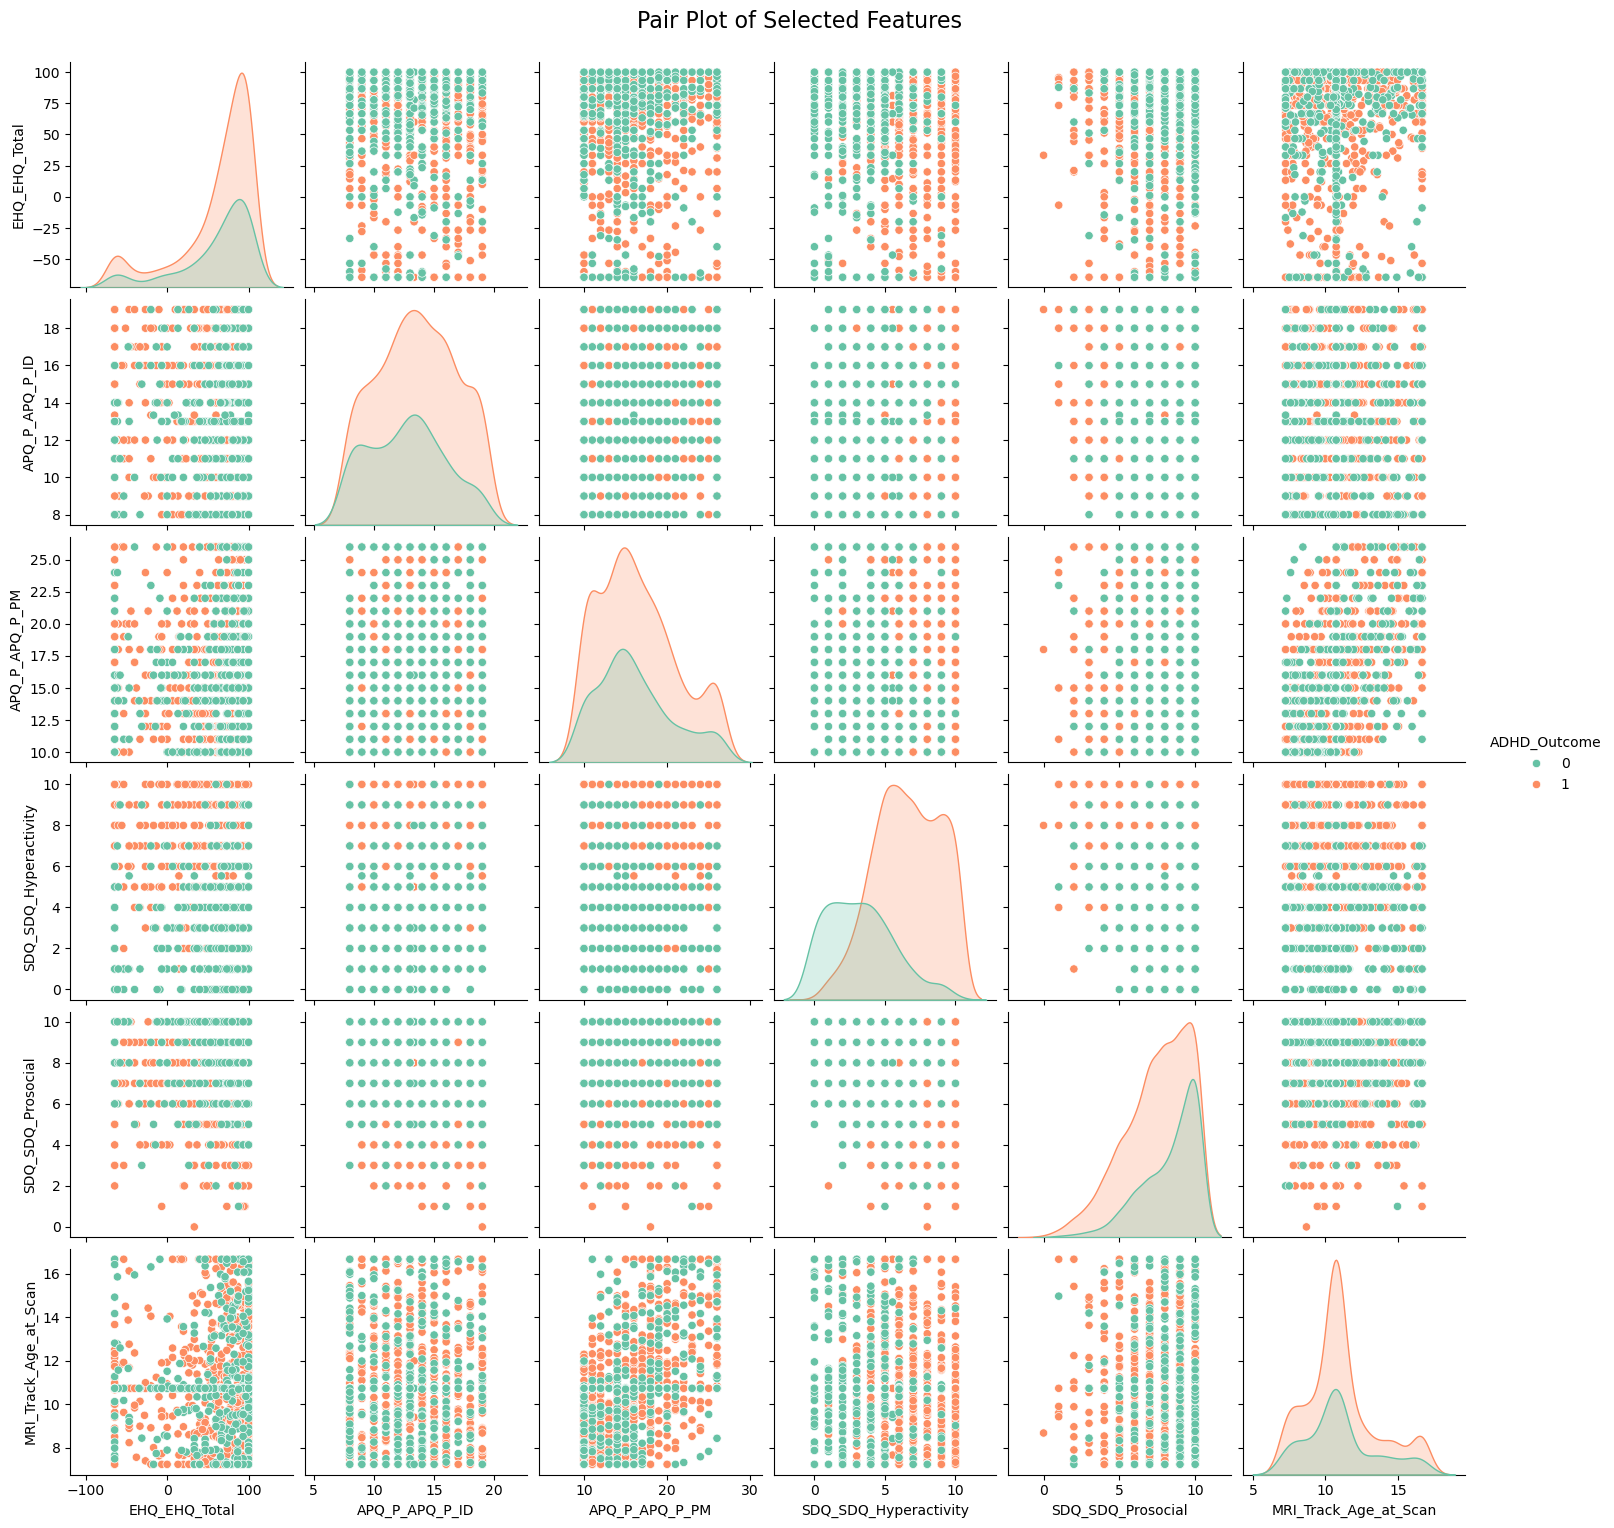

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the .npy file
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data["metadata"]

# Select relevant numeric features for pairplot
selected_features = [
    'EHQ_EHQ_Total',
    'APQ_P_APQ_P_ID',
    'APQ_P_APQ_P_PM',
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Prosocial',
    'MRI_Track_Age_at_Scan',
    'ADHD_Outcome'  # for hue if needed
]

# Drop rows with NaNs just for clean plotting
pairplot_data = metadata[selected_features].dropna()

# Plot pairplot
sns.pairplot(pairplot_data, hue="ADHD_Outcome", height=2.5, palette='Set2')
plt.suptitle("Pair Plot of Selected Features", y=1.02, fontsize=16)
plt.show()


In [55]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import squareform

# Load preprocessed data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data["metadata"]
functional_matrix = data["features"]  # Corrected the key for functional matrix

# Step 1: Flatten upper triangle (excluding diagonal)
def flatten_upper_tri(matrix):
    # squareform is used to get the upper triangular values (exclude diagonal)
    return np.array([squareform(m, checks=False) for m in matrix])

X = flatten_upper_tri(functional_matrix)

# Step 2: Target variable
y = metadata["ADHD_Outcome"].astype(int)  # Ensure it's in int format

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the model
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train_scaled, y_train)

# Step 6: Evaluation
y_pred = clf.predict(X_test_scaled)

print("✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


✅ Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.68      0.96      0.79       166

    accuracy                           0.66       243
   macro avg       0.34      0.48      0.40       243
weighted avg       0.46      0.66      0.54       243

✅ Accuracy: 0.6584362139917695


In [57]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import squareform

# Load preprocessed data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data["metadata"]
functional_matrix = data["features"]

# Step 1: Flatten upper triangle (excluding diagonal)
def flatten_upper_tri(matrix):
    return np.array([squareform(m, checks=False) for m in matrix])

X = flatten_upper_tri(functional_matrix)

# Step 2: Target variable
y = metadata["ADHD_Outcome"].astype(int)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Step 6: Best model
best_clf = grid_search.best_estimator_

# Step 7: Train and evaluate the best model
y_pred = best_clf.predict(X_test_scaled)

print("✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.68      0.98      0.80       166

    accuracy                           0.67       243
   macro avg       0.34      0.49      0.40       243
weighted avg       0.46      0.67      0.55       243

✅ Accuracy: 0.6666666666666666


In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import squareform

# Load preprocessed data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data["metadata"]
functional_matrix = data["features"]  # Corrected the key for functional matrix

# Step 1: Flatten upper triangle (excluding diagonal)
def flatten_upper_tri(matrix):
    # squareform is used to get the upper triangular values (exclude diagonal)
    return np.array([squareform(m, checks=False) for m in matrix])

X = flatten_upper_tri(functional_matrix)

# Step 2: Define target variables
y_adhd = metadata["ADHD_Outcome"].astype(int)  # Target variable for ADHD_Outcome
y_sex = metadata["Sex_F"].astype(int)  # Target variable for sex (assuming it's binary)

# Step 3: Train-test split for both target variables
X_train_adhd, X_test_adhd, y_train_adhd, y_test_adhd = train_test_split(X, y_adhd, test_size=0.2, random_state=42, stratify=y_adhd)
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(X, y_sex, test_size=0.2, random_state=42, stratify=y_sex)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_adhd_scaled = scaler.fit_transform(X_train_adhd)
X_test_adhd_scaled = scaler.transform(X_test_adhd)

X_train_sex_scaled = scaler.fit_transform(X_train_sex)
X_test_sex_scaled = scaler.transform(X_test_sex)

# Step 5: Define hyperparameters for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Step 6: GridSearchCV for ADHD_Outcome
grid_search_adhd = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                                param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_adhd.fit(X_train_adhd_scaled, y_train_adhd)

# Best model for ADHD_Outcome
best_rf_adhd = grid_search_adhd.best_estimator_

# Step 7: Evaluation for ADHD_Outcome
y_pred_adhd = best_rf_adhd.predict(X_test_adhd_scaled)
print("✅ ADHD_Outcome Classification Report:")
print(classification_report(y_test_adhd, y_pred_adhd))
print("✅ ADHD_Outcome Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))

# Step 8: GridSearchCV for sex prediction
grid_search_sex = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                               param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_sex.fit(X_train_sex_scaled, y_train_sex)

# Best model for sex prediction
best_rf_sex = grid_search_sex.best_estimator_

# Step 9: Evaluation for sex prediction
y_pred_sex = best_rf_sex.predict(X_test_sex_scaled)
print("✅ Sex Classification Report:")
print(classification_report(y_test_sex, y_pred_sex))
print("✅ Sex Accuracy:", accuracy_score(y_test_sex, y_pred_sex))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ ADHD_Outcome Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.68      0.98      0.80       166

    accuracy                           0.67       243
   macro avg       0.34      0.49      0.40       243
weighted avg       0.46      0.67      0.55       243

✅ ADHD_Outcome Accuracy: 0.6666666666666666
Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Sex Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       160
           1       0.00      0.00      0.00        83

    accuracy                           0.65       243
   macro avg       0.33      0.49      0.39       243
weighted avg       0.43      0.65      0.52       243

✅ Sex Accuracy: 0.6502057613168725


In [3]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.4 MB/s eta 0:01:50
   ---------------------------------------- 0.1/150.0 MB 1.1 MB/s eta 0:02:23
   ---------------------------------------- 0.1/150.0 MB 1.0 MB/s eta 0:02:26
   ---------------------------------------- 0.2/150.0 MB 1.4 MB/s eta 0:01:44
   ---------------------------------------- 0.4/150.0 MB 1.9 MB/s eta 0:01:19
   ---------------------------------------- 0.5/150.0 MB 2.1 MB/s eta 0:01:12
   ---------------------------------------- 0.7/150.0 MB 2.2 MB/s eta 0:01:09
   ---------------------------------------- 0.8/150.0 MB 2.4 MB/s eta 0:01:02
   ---------------------------------------- 0.9/150.0 MB 2.5 MB/s eta 0:01:01
   ---------------------------------------- 1.1/150.0 MB 2.6 MB/s eta 0:00:58
   ---------------------------------------- 1.2/150.0 MB 2.6 MB/s eta 0:00:58
   ---------------------------------------- 1.3/150.0 MB 2.8 MB/s eta 0

In [22]:
# import numpy as np

# # Load the numpy .npy file
# data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True)

# # Display the keys/attributes in the file (if it's a dictionary-like structure)
# print("Metadata Attributes in .npy file:")
# for key in data.item().keys():
#     print(f"{key}: {data.item()[key]}")


In [4]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import squareform

# 🔹 Load preprocessed data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data["metadata"]
functional_matrix = data["features"]

# 🔹 Flatten upper triangle of the connectivity matrices
def flatten_upper_tri(matrix):
    return np.array([squareform(m, checks=False) for m in matrix])

X = flatten_upper_tri(functional_matrix)

# 🔹 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ─────────────────────────────────────────────────────────── #
# 🎯 Model 1: SVM for ADHD_Outcome
# ─────────────────────────────────────────────────────────── #
y_adhd = metadata["ADHD_Outcome"].astype(int)

X_train_adhd, X_test_adhd, y_train_adhd, y_test_adhd = train_test_split(
    X_scaled, y_adhd, test_size=0.2, random_state=42, stratify=y_adhd
)

svm_adhd = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_adhd.fit(X_train_adhd, y_train_adhd)
y_pred_adhd = svm_adhd.predict(X_test_adhd)

print("\n📘 SVM - ADHD_Outcome Classification Report:")
print(classification_report(y_test_adhd, y_pred_adhd))
print("✅ ADHD Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))


# ─────────────────────────────────────────────────────────── #
# 🚺 Model 2: SVM for Sex_F
# ─────────────────────────────────────────────────────────── #
y_sex = metadata["Sex_F"].astype(int)

X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(
    X_scaled, y_sex, test_size=0.2, random_state=42, stratify=y_sex
)

svm_sex = SVC(kernel='rbf', probability=True, random_state=42)
svm_sex.fit(X_train_sex, y_train_sex)
y_pred_sex = svm_sex.predict(X_test_sex)

print("\n📗 SVM - Sex_F Classification Report:")
print(classification_report(y_test_sex, y_pred_sex))
print("✅ Sex_F Accuracy:", accuracy_score(y_test_sex, y_pred_sex))



📘 SVM - ADHD_Outcome Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.16      0.21        77
           1       0.69      0.86      0.76       166

    accuracy                           0.63       243
   macro avg       0.51      0.51      0.49       243
weighted avg       0.57      0.63      0.59       243

✅ ADHD Accuracy: 0.6337448559670782

📗 SVM - Sex_F Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       160
           1       0.00      0.00      0.00        83

    accuracy                           0.66       243
   macro avg       0.33      0.50      0.40       243
weighted avg       0.43      0.66      0.52       243

✅ Sex_F Accuracy: 0.6584362139917695


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import squareform

# Load data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data["metadata"]
functional_matrix = data["features"]

# Flatten upper triangle of each matrix
def flatten_upper_tri(matrix):
    return np.array([squareform(m, checks=False) for m in matrix])

X = flatten_upper_tri(functional_matrix)
y_adhd = metadata["ADHD_Outcome"]

# Drop any NaNs
valid_mask = y_adhd.notnull()
X_clean = X[valid_mask]
y_clean = y_adhd[valid_mask].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42)
}

# Train and evaluate each
for name, model in models.items():
    clf = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n📘 {name} - ADHD Classification Report:")
    print(classification_report(y_test, y_pred))
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))



📘 Logistic Regression - ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.22      0.24        77
           1       0.66      0.72      0.69       166

    accuracy                           0.56       243
   macro avg       0.47      0.47      0.47       243
weighted avg       0.54      0.56      0.55       243

✅ Accuracy: 0.5596707818930041

📘 Random Forest - ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.68      0.96      0.79       166

    accuracy                           0.66       243
   macro avg       0.34      0.48      0.40       243
weighted avg       0.46      0.66      0.54       243

✅ Accuracy: 0.6584362139917695

📘 SVM (RBF Kernel) - ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.68  

C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 495.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.5 MB 751.6 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.5 MB 1.0 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 1.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.5 MB 1.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 1.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 1.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 1.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 1.1 MB/s eta 0:00:01
   ------------ ------

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import squareform

# Load data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data["metadata"]
functional_matrix = data["features"]

# Flatten upper triangle of each matrix
def flatten_upper_tri(matrix):
    return np.array([squareform(m, checks=False) for m in matrix])

X = flatten_upper_tri(functional_matrix)
y_adhd = metadata["ADHD_Outcome"]

# Drop any NaNs
valid_mask = y_adhd.notnull()
X_clean = X[valid_mask]
y_clean = y_adhd[valid_mask].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

# LightGBM Classifier
lgbm_clf = Pipeline([
    ('scaler', StandardScaler()),  # Optional scaling step
    ('lgbm', lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Train model
lgbm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = lgbm_clf.predict(X_test)

# Evaluation
print("\n📘 LightGBM - ADHD Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


[LightGBM] [Info] Number of positive: 665, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.322563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5074500
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 19900
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685567 -> initscore=0.779475
[LightGBM] [Info] Start training from score 0.779475

📘 LightGBM - ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.03      0.05        77
           1       0.68      0.98      0.81       166

    accuracy                           0.68       243
   macro avg       0.54      0.50      0.43       243
weighted avg       0.59      0.68      0.57       243

✅ Accuracy: 0.6790123456790124


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import squareform

# Load preprocessed data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data["metadata"]
functional_matrix = data["features"]

# Step 1: Flatten upper triangle of each functional connectivity matrix
def flatten_upper_tri(matrix):
    return np.array([squareform(m, checks=False) for m in matrix])

X = flatten_upper_tri(functional_matrix)

# Step 2: Extract target variable
y = metadata["ADHD_Outcome"].astype(int)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize and train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train_scaled, y_train)

# Step 6: Evaluate
y_pred = gb_clf.predict(X_test_scaled)

print("✅ Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

✅ Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.06      0.10        77
           1       0.67      0.90      0.77       166

    accuracy                           0.63       243
   macro avg       0.45      0.48      0.44       243
weighted avg       0.53      0.63      0.56       243

✅ Accuracy: 0.6337448559670782


In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import squareform

# === 1. Load preprocessed data ===
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data["metadata"]
functional_matrix = data["features"]

# === 2. Flatten upper triangle of each matrix ===
X_full = np.array([squareform(m, checks=False) for m in functional_matrix])
y_full = metadata["ADHD_Outcome"].astype(int)

# === 3. Stratified sampling: Select a balanced subset (e.g. 500 samples) ===
sss = StratifiedShuffleSplit(n_splits=1, train_size=500, random_state=42)
for train_index, _ in sss.split(X_full, y_full):
    X_sample = X_full[train_index]
    y_sample = y_full.iloc[train_index]

# === 4. Train-test split (still stratified) ===
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=42
)

# === 5. Scale features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 6. Initialize and train Gradient Boosting Classifier ===
gb_clf = GradientBoostingClassifier(
    n_estimators=50, learning_rate=0.1, max_depth=2, random_state=42
)
gb_clf.fit(X_train_scaled, y_train)

# === 7. Evaluate ===
y_pred = gb_clf.predict(X_test_scaled)

print("✅ Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


✅ Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.06      0.11        31
           1       0.69      0.94      0.80        69

    accuracy                           0.67       100
   macro avg       0.51      0.50      0.45       100
weighted avg       0.58      0.67      0.58       100

✅ Accuracy: 0.67


In [11]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=200, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train XGBoost classifier (clean version)
xgb = XGBClassifier(
    tree_method="hist",
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'  # this is still needed
)
xgb.fit(X_train_pca, y_train)

# Predict & Evaluate
y_pred = xgb.predict(X_test_pca)
print("✅ XGBoost with PCA Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


✅ XGBoost with PCA Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.23      0.33        31
           1       0.73      0.94      0.82        69

    accuracy                           0.72       100
   macro avg       0.68      0.58      0.58       100
weighted avg       0.70      0.72      0.67       100

✅ Accuracy: 0.72


In [6]:
import numpy as np
import pandas as pd
import networkx as nx
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# === Optional: Suppress RuntimeWarnings ===
warnings.filterwarnings("ignore", category=RuntimeWarning)

# === Step 1: Load Data ===
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data["metadata"]
functional_matrix = data["features"]

# === Step 2: Extract graph-based features ===
def extract_graph_features(matrix):
    G = nx.from_numpy_array(matrix)

    try:
        assortativity = nx.degree_assortativity_coefficient(G)
        if np.isnan(assortativity):
            assortativity = 0.0
    except:
        assortativity = 0.0

    features = {
        "avg_degree": np.mean([d for n, d in G.degree()]),
        "avg_clustering": nx.average_clustering(G),
        "density": nx.density(G),
        "efficiency": nx.global_efficiency(G),
        "assortativity": assortativity
    }
    return pd.Series(features)

# Apply to all matrices
graph_features = pd.DataFrame([extract_graph_features(m) for m in functional_matrix])

# === Step 3: Extract target ===
y = metadata["ADHD_Outcome"].astype(int)

# === Step 4: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(graph_features, y, test_size=0.2, random_state=42, stratify=y)

# === Step 5: Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 6: Train model ===
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# === Step 7: Evaluate ===
y_pred = xgb.predict(X_test_scaled)
print("✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


✅ Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.68      1.00      0.81       166

    accuracy                           0.68       243
   macro avg       0.34      0.50      0.41       243
weighted avg       0.47      0.68      0.55       243

✅ Accuracy: 0.6831275720164609


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your preprocessed data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data['metadata']
functional_matrix = data['features']  # Shape: (n_samples, 200, 200)

# Step 1: Flatten each 200x200 matrix into a 1D vector of size 40000
X_matrix = np.array([mat.flatten() for mat in functional_matrix])

# Step 2: Standardize the matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_matrix)

# Step 3: Apply PCA to reduce dimensions
pca = PCA(n_components=100)  # Adjust as needed
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create final dictionary with metadata and PCA-transformed features
final_data = {
    'metadata': metadata,
    'functional_matrix_pca': X_pca
}

# Step 5: Save the final preprocessed file
np.save("final_preprocessed_for_modeling5.npy", final_data)

print("✅ Saved PCA-transformed matrix with metadata as 'final_preprocessed_for_modeling5.npy'")

✅ Saved PCA-transformed matrix with metadata as 'final_preprocessed_for_modeling5.npy'


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your final PCA-transformed file
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
metadata = data['metadata']
X = data['functional_matrix_pca']

# Target variable: ADHD_Outcome
y = metadata['ADHD_Outcome']

# Split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Gradient Boosting Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

✅ Gradient Boosting Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.12      0.18        77
           1       0.69      0.92      0.79       166

    accuracy                           0.67       243
   macro avg       0.55      0.52      0.49       243
weighted avg       0.60      0.67      0.60       243



In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load PCA-transformed data
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
X = data['functional_matrix_pca']   # PCA-transformed connectivity matrix
y = data['metadata']['ADHD_Outcome']   # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (optional if PCA is already scaled, but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define individual models
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
svm_model = SVC(kernel='rbf', probability=True)

# Create ensemble using soft voting
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model), ('svm', svm_model)],
    voting='soft'
)

# Train ensemble
ensemble_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ensemble_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ Ensemble Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


✅ Ensemble Model Accuracy: 0.7407

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        65
           1       0.74      1.00      0.85       178

    accuracy                           0.74       243
   macro avg       0.87      0.52      0.45       243
weighted avg       0.81      0.74      0.64       243



In [11]:
import os
import numpy as np

# Prepare your data (assuming final_data already exists)
# final_data = {"metadata": ..., "features": ...}

# Get path to Desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "final_preprocessed_for_modeling5.npy")

# Save the file
np.save(desktop_path, final_data)
print(f"✅ File saved to: {desktop_path}")


✅ File saved to: C:\Users\ADESH BUSARI\Desktop\final_preprocessed_for_modeling5.npy


In [15]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load PCA transformed data
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
X = data['functional_matrix_pca']  # PCA features
y = data['metadata']['ADHD_Outcome']  # Target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ XGBoost Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:36:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ XGBoost Accuracy: 0.7078

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.02      0.03        65
           1       0.73      0.96      0.83       178

    accuracy                           0.71       243
   macro avg       0.43      0.49      0.43       243
weighted avg       0.57      0.71      0.61       243



In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load file
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = data['metadata']

# Separate target
y = metadata['ADHD_Outcome']
X_meta = metadata.drop(columns=['ADHD_Outcome'])

# One-hot encode categorical columns (like 'Sex')
X_meta_encoded = pd.get_dummies(X_meta)

# Combine PCA + metadata
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost model
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ XGBoost Accuracy with Combined Features: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


✅ XGBoost Accuracy with Combined Features: 0.7942

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.49      0.56        65
           1       0.83      0.90      0.87       178

    accuracy                           0.79       243
   macro avg       0.74      0.70      0.71       243
weighted avg       0.78      0.79      0.78       243



In [19]:
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
print("Top-level keys:", data.keys())

for key, value in data.items():
    print(f"\nKey: {key}")
    print("Type:", type(value))
    try:
        print("Shape:", value.shape)
    except:
        print("Sample value:", value[:2])


Top-level keys: dict_keys(['metadata', 'functional_matrix_pca'])

Key: metadata
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (1213, 30)

Key: functional_matrix_pca
Type: <class 'numpy.ndarray'>
Shape: (1213, 100)


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# === Load Data ===
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
X = data["functional_matrix_pca"]  # shape: (1213, 100)
y = data["metadata"]["ADHD_Outcome"].astype(int)

# === Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Scale ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Models ===
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42),
    "SVM": SVC(kernel='rbf', C=10, gamma=0.01, probability=True),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "MLP": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
}

# === Training & Evaluation ===
for name, model in models.items():
    print(f"\n🔹 Training: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))



🔹 Training: XGBoost
✅ Accuracy: 0.6667
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.10      0.16        77
           1       0.69      0.93      0.79       166

    accuracy                           0.67       243
   macro avg       0.55      0.52      0.48       243
weighted avg       0.60      0.67      0.59       243


🔹 Training: RandomForest
✅ Accuracy: 0.6831
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.01      0.03        77
           1       0.68      0.99      0.81       166

    accuracy                           0.68       243
   macro avg       0.59      0.50      0.42       243
weighted avg       0.63      0.68      0.56       243


🔹 Training: SVM
✅ Accuracy: 0.6543
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.14      0.21        77
           1       0.69      0.89      0.

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# === Load Data ===
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
X = data['functional_matrix_pca']
y = data['metadata']['ADHD_Outcome'].astype(int)

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# === Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Handle Class Imbalance with SMOTE ===
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# === Define Base Models ===
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
svm_model = SVC(probability=True, kernel='rbf', C=10, gamma=0.01)

# === Stacking Classifier ===
stacked_model = StackingClassifier(
    estimators=[
        ("xgb", xgb_model),
        ("rf", rf_model),
        ("svm", svm_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# === Train Model ===
stacked_model.fit(X_train_bal, y_train_bal)

# === Predict and Evaluate ===
y_pred = stacked_model.predict(X_test_scaled)
print("\n🔹 Stacked Ensemble Results:")
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


🔹 Stacked Ensemble Results:
✅ Accuracy: 0.654320987654321
              precision    recall  f1-score   support

           0       0.29      0.06      0.11        77
           1       0.68      0.93      0.79       166

    accuracy                           0.65       243
   macro avg       0.49      0.50      0.45       243
weighted avg       0.56      0.65      0.57       243



In [40]:
!pip install catboost


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/102.4 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.1/102.4 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.2/102.4 MB 1.2 MB/s eta 0:01:27
   ---------------------------------------- 0.2/102.4 MB 1.5 MB/s eta 0:01:08
   ---------------------------------------- 0.4/102.4 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.4/102.4 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.6/102.4 MB 1.7 MB/s eta 0:01:02
   ---------------------------------------- 0.7/102.4 MB 1.7 MB/s eta 0:01:00
   ---------------------------------------- 0.8/102.4 MB 1.8 MB/s eta 0:00:56
   ---------------------------------------- 0.9/102.4 MB 1.9 MB/s eta 0:00:53
   ---------------------------------------- 1.1/102.4 MB 2.1 MB/s eta 0:00:50


In [47]:
import numpy as np

data = np.load('final_preprocessed_for_modeling5.npy', allow_pickle=True).item()
print(data.keys())

dict_keys(['metadata', 'functional_matrix_pca'])


In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# Separate target and drop from metadata
y = metadata["ADHD_Outcome"].values
meta_features = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")

# Convert categorical features to numeric using one-hot encoding
meta_encoded = pd.get_dummies(meta_features)

# Combine encoded metadata and PCA features
X_combined = np.hstack((meta_encoded.values, pca_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7942386831275721
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.34      0.47        65
           1       0.80      0.96      0.87       178

    accuracy                           0.79       243
   macro avg       0.78      0.65      0.67       243
weighted avg       0.79      0.79      0.76       243



In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform
import networkx as nx

# Load your saved .npy file
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
metadata = data['metadata']
pca_features = data['functional_matrix_pca']
data1 = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()

functional_matrices = data1['features']  # Full matrix (for graph analysis)

# Graph feature extraction
def extract_graph_features(matrix):
    G = nx.from_numpy_array(matrix)
    features = {
        "avg_degree": np.mean([d for n, d in G.degree()]),
        "avg_clustering": nx.average_clustering(G),
        "density": nx.density(G),
        "assortativity": nx.degree_assortativity_coefficient(G),
        "transitivity": nx.transitivity(G)
    }
    return pd.Series(features)

graph_features = pd.DataFrame([extract_graph_features(m) for m in functional_matrices])

# Combine features
X = np.hstack([pca_features, graph_features.values])
y = metadata['ADHD_Outcome'].astype(int)


In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# Extract targets: both ADHD_Outcome and Sex_F
y = metadata[["ADHD_Outcome", "Sex_F"]].values

# Prepare features (drop both targets)
meta_features = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")

# One-hot encode categorical metadata
meta_encoded = pd.get_dummies(meta_features)

# Combine metadata and PCA features
X_combined = np.hstack((meta_encoded.values, pca_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multi-output model
base_model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42)
multi_model = MultiOutputClassifier(base_model)

# Train
multi_model.fit(X_train_scaled, y_train)

# Predict
y_pred = multi_model.predict(X_test_scaled)

# Evaluate
print("Accuracy for each target:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test[:, 0], y_pred[:, 0]))
print("Sex_F Accuracy:", accuracy_score(y_test[:, 1], y_pred[:, 1]))

print("\nClassification Report for ADHD_Outcome:")
print(classification_report(y_test[:, 0], y_pred[:, 0]))

print("Classification Report for Sex_F:")
print(classification_report(y_test[:, 1], y_pred[:, 1]))


Accuracy for each target:
ADHD_Outcome Accuracy: 0.7942386831275721
Sex_F Accuracy: 0.7037037037037037

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.76      0.34      0.47        65
           1       0.80      0.96      0.87       178

    accuracy                           0.79       243
   macro avg       0.78      0.65      0.67       243
weighted avg       0.79      0.79      0.76       243

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       171
           1       0.00      0.00      0.00        72

    accuracy                           0.70       243
   macro avg       0.35      0.50      0.41       243
weighted avg       0.50      0.70      0.58       243



In [67]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

# Load file
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# Separate multi-target: ADHD_Outcome and Sex_F
y = metadata[['ADHD_Outcome', 'Sex_F']].values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# One-hot encode metadata
X_meta_encoded = pd.get_dummies(X_meta)

# Combine PCA + metadata
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Multi-output XGBoost model
xgb_base = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

multi_xgb = MultiOutputClassifier(xgb_base)
multi_xgb.fit(X_train, y_train)

# Predict
y_pred = multi_xgb.predict(X_test)

# Evaluate
print("✅ Accuracy per Target:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test[:, 0], y_pred[:, 0]))
print("Sex_F Accuracy:", accuracy_score(y_test[:, 1], y_pred[:, 1]))

print("\nClassification Report for ADHD_Outcome:")
print(classification_report(y_test[:, 0], y_pred[:, 0]))

print("Classification Report for Sex_F:")
print(classification_report(y_test[:, 1], y_pred[:, 1]))


✅ Accuracy per Target:
ADHD_Outcome Accuracy: 0.8148148148148148
Sex_F Accuracy: 0.6502057613168725

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.72      0.51      0.59        65
           1       0.84      0.93      0.88       178

    accuracy                           0.81       243
   macro avg       0.78      0.72      0.74       243
weighted avg       0.81      0.81      0.80       243

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       171
           1       0.29      0.12      0.17        72

    accuracy                           0.65       243
   macro avg       0.50      0.50      0.48       243
weighted avg       0.58      0.65      0.60       243



In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your preprocessed data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data['metadata']
functional_matrix = data['features']  # Shape: (n_samples, 200, 200)

# Step 1: Flatten each 200x200 matrix into a 1D vector of size 40000
X_matrix = np.array([mat.flatten() for mat in functional_matrix])

# Step 2: Standardize the matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_matrix)

# Step 3: Apply PCA to reduce dimensions
pca = PCA(n_components=400)  # Adjust as needed
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create final dictionary with metadata and PCA-transformed features
final_data = {
    'metadata': metadata,
    'functional_matrix_pca': X_pca
}

# Step 5: Save the final preprocessed file
np.save("final_preprocessed_for_modeling100.npy", final_data)

print("✅ Saved PCA-transformed matrix with metadata as 'final_preprocessed_for_modeling100.npy'")

✅ Saved PCA-transformed matrix with metadata as 'final_preprocessed_for_modeling100.npy'


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

# Load file
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# Separate multi-target: ADHD_Outcome and Sex_F
y = metadata[['ADHD_Outcome', 'Sex_F']].values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# One-hot encode metadata
X_meta_encoded = pd.get_dummies(X_meta)

# Combine PCA + metadata
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Multi-output XGBoost model
xgb_base = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

multi_xgb = MultiOutputClassifier(xgb_base)
multi_xgb.fit(X_train, y_train)

# Predict
y_pred = multi_xgb.predict(X_test)

# Evaluate
print("✅ Accuracy per Target:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test[:, 0], y_pred[:, 0]))
print("Sex_F Accuracy:", accuracy_score(y_test[:, 1], y_pred[:, 1]))

print("\nClassification Report for ADHD_Outcome:")
print(classification_report(y_test[:, 0], y_pred[:, 0]))

print("Classification Report for Sex_F:")
print(classification_report(y_test[:, 1], y_pred[:, 1]))


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:20:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:20:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy per Target:
ADHD_Outcome Accuracy: 0.7983539094650206
Sex_F Accuracy: 0.6831275720164609

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.67      0.49      0.57        65
           1       0.83      0.91      0.87       178

    accuracy                           0.80       243
   macro avg       0.75      0.70      0.72       243
weighted avg       0.79      0.80      0.79       243

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.70      0.95      0.81       171
           1       0.31      0.06      0.09        72

    accuracy                           0.68       243
   macro avg       0.51      0.50      0.45       243
weighted avg       0.59      0.68      0.60       243



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# Extract targets: both ADHD_Outcome and Sex_F
y = metadata[["ADHD_Outcome", "Sex_F"]].values

# Prepare features (drop both targets)
meta_features = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")

# One-hot encode categorical metadata
meta_encoded = pd.get_dummies(meta_features)

# Combine metadata and PCA features
X_combined = np.hstack((meta_encoded.values, pca_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multi-output model
base_model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42)
multi_model = MultiOutputClassifier(base_model)

# Train
multi_model.fit(X_train_scaled, y_train)

# Predict
y_pred = multi_model.predict(X_test_scaled)

# Evaluate
print("Accuracy for each target:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test[:, 0], y_pred[:, 0]))
print("Sex_F Accuracy:", accuracy_score(y_test[:, 1], y_pred[:, 1]))

print("\nClassification Report for ADHD_Outcome:")
print(classification_report(y_test[:, 0], y_pred[:, 0]))

print("Classification Report for Sex_F:")
print(classification_report(y_test[:, 1], y_pred[:, 1]))


Accuracy for each target:
ADHD_Outcome Accuracy: 0.7901234567901234
Sex_F Accuracy: 0.7037037037037037

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.89      0.25      0.39        65
           1       0.78      0.99      0.87       178

    accuracy                           0.79       243
   macro avg       0.84      0.62      0.63       243
weighted avg       0.81      0.79      0.74       243

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       171
           1       0.00      0.00      0.00        72

    accuracy                           0.70       243
   macro avg       0.35      0.50      0.41       243
weighted avg       0.50      0.70      0.58       243



C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your preprocessed data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data['metadata']
functional_matrix = data['features']  # Shape: (n_samples, 200, 200)

# Step 1: Flatten each 200x200 matrix into a 1D vector of size 40000
X_matrix = np.array([mat.flatten() for mat in functional_matrix])

# Step 2: Standardize the matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_matrix)

# Step 3: Apply PCA to reduce dimensions
pca = PCA(n_components=300)  # Adjust as needed
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create final dictionary with metadata and PCA-transformed features
final_data = {
    'metadata': metadata,
    'functional_matrix_pca': X_pca
}

# Step 5: Save the final preprocessed file
np.save("final_preprocessed_for_modeling200.npy", final_data)

print("✅ Saved PCA-transformed matrix with metadata as 'final_preprocessed_for_modeling200.npy'")

✅ Saved PCA-transformed matrix with metadata as 'final_preprocessed_for_modeling200.npy'


[LightGBM] [Info] Number of positive: 653, number of negative: 653
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29669
[LightGBM] [Info] Number of data points in the train set: 1306, number of used features: 130
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.8148148148148148
ROC-AUC Score: 0.731979256698358
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.55      0.62        65
           1       0.85      0.91      0.88       178

    accuracy                           0.81       243
   macro avg       0.77      0.73      0.75       243
weighted avg       0.81      0.81      0.81       243



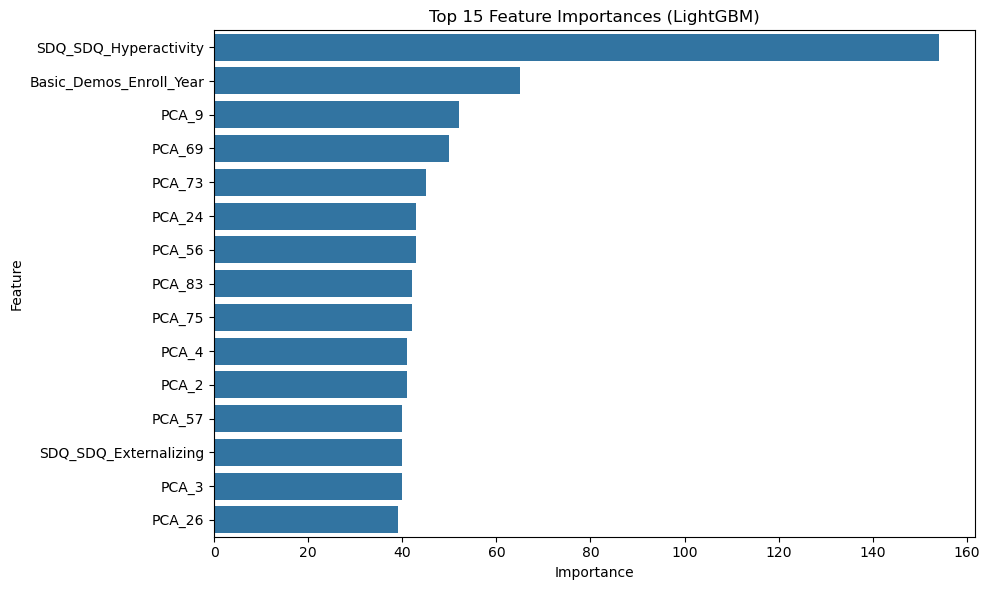

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier

# === 1. Load data ===
data = np.load("final_preprocessed_for_modeling5.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# === 2. Prepare X and y ===
y = metadata["ADHD_Outcome"].values
meta_features = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded = pd.get_dummies(meta_features)
X = np.hstack((meta_encoded.values, pca_features))

# === 3. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 4. Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 5. SMOTE ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# === 6. Train LightGBM ===
lgb_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgb_model.fit(X_train_res, y_train_res)

# === 7. Predict + Evaluate ===
y_pred = lgb_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# === 8. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (LightGBM)")
plt.show()

# === 9. Feature Importance ===
importances = lgb_model.feature_importances_
feature_names = list(meta_encoded.columns) + [f'PCA_{i}' for i in range(pca_features.shape[1])]
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = feature_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title("Top 15 Feature Importances (LightGBM)")
plt.tight_layout()
plt.show()

[LightGBM] [Info] Number of positive: 653, number of negative: 653
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 106551
[LightGBM] [Info] Number of data points in the train set: 1306, number of used features: 433
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 344, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102626
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 427
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
🔹 Evaluation for ADHD_Outcome:
✅ Accuracy: 0.7942386831275721
📊 Classifica

🔹 Evaluation for Sex_F:
✅ Accuracy: 0.6255144032921811
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.84      0.76       171
           1       0.24      0.12      0.17        72

    accuracy                           0.63       243
   macro avg       0.47      0.48      0.46       243
weighted avg       0.56      0.63      0.58       243



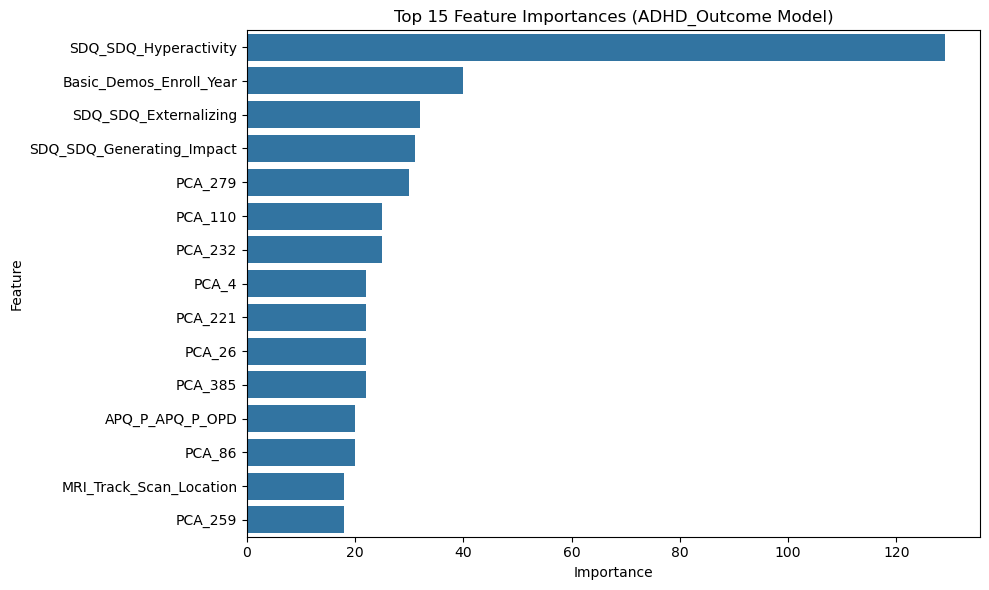

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# === 2. Prepare X and y ===
meta_features = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded = pd.get_dummies(meta_features)
X = np.hstack((meta_encoded.values, pca_features))

y_adhd = metadata["ADHD_Outcome"].astype(int).values
y_sex = metadata["Sex_F"].astype(int).values

# === 3. Train-test split ===
X_train, X_test, y_adhd_train, y_adhd_test, y_sex_train, y_sex_test = train_test_split(
    X, y_adhd, y_sex, test_size=0.2, random_state=42
)

# === 4. Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 5. SMOTE for ADHD_Outcome ===
smote = SMOTE(random_state=42)
X_train_res, y_adhd_res = smote.fit_resample(X_train_scaled, y_adhd_train)

# === 6. Train separate LightGBM models ===
adhd_model = LGBMClassifier(random_state=42, class_weight='balanced')
sex_model = LGBMClassifier(random_state=42, class_weight='balanced')

adhd_model.fit(X_train_res, y_adhd_res)
sex_model.fit(X_train_scaled, y_sex_train)  # No SMOTE for sex

# === 7. Predict + Evaluate ===
y_adhd_pred = adhd_model.predict(X_test_scaled)
y_sex_pred = sex_model.predict(X_test_scaled)

# ADHD Outcome Metrics
print("🔹 Evaluation for ADHD_Outcome:")
print("✅ Accuracy:", accuracy_score(y_adhd_test, y_adhd_pred))
print("📊 Classification Report:\n", classification_report(y_adhd_test, y_adhd_pred))
sns.heatmap(confusion_matrix(y_adhd_test, y_adhd_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: ADHD_Outcome")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Sex_F Metrics
print("🔹 Evaluation for Sex_F:")
print("✅ Accuracy:", accuracy_score(y_sex_test, y_sex_pred))
print("📊 Classification Report:\n", classification_report(y_sex_test, y_sex_pred))
sns.heatmap(confusion_matrix(y_sex_test, y_sex_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix: Sex_F")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 8. Feature Importance (ADHD model only) ===
importances = adhd_model.feature_importances_
feature_names = list(meta_encoded.columns) + [f'PCA_{i}' for i in range(pca_features.shape[1])]
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = feature_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title("Top 15 Feature Importances (ADHD_Outcome Model)")
plt.tight_layout()
plt.show()


In [9]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your preprocessed data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data['metadata']
functional_matrix = data['features']  # Shape: (n_samples, 200, 200)

# Step 1: Flatten each 200x200 matrix into a 1D vector of size 40000
X_matrix = np.array([mat.flatten() for mat in functional_matrix])

# Step 2: Standardize the matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_matrix)

# Step 3: Apply PCA to reduce dimensions
pca = PCA(n_components=500)  # Adjust as needed
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create final dictionary with metadata and PCA-transformed features
final_data = {
    'metadata': metadata,
    'functional_matrix_pca': X_pca
}

# Step 5: Save the final preprocessed file
np.save("final_preprocessed_for_modeling000.npy", final_data)

print("✅ Saved PCA-transformed matrix with metadata as 'final_preprocessed_for_modeling000.npy'")

✅ Saved PCA-transformed matrix with metadata as 'final_preprocessed_for_modeling000.npy'


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
data = np.load("final_preprocessed_for_modeling000.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# Extract targets: both ADHD_Outcome and Sex_F
y = metadata[["ADHD_Outcome", "Sex_F"]].values

# Prepare features (drop both targets)
meta_features = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")

# One-hot encode categorical metadata
meta_encoded = pd.get_dummies(meta_features)

# Combine metadata and PCA features
X_combined = np.hstack((meta_encoded.values, pca_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multi-output model
base_model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42)
multi_model = MultiOutputClassifier(base_model)

# Train
multi_model.fit(X_train_scaled, y_train)

# Predict
y_pred = multi_model.predict(X_test_scaled)

# Evaluate
print("Accuracy for each target:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test[:, 0], y_pred[:, 0]))
print("Sex_F Accuracy:", accuracy_score(y_test[:, 1], y_pred[:, 1]))

print("\nClassification Report for ADHD_Outcome:")
print(classification_report(y_test[:, 0], y_pred[:, 0]))

print("Classification Report for Sex_F:")
print(classification_report(y_test[:, 1], y_pred[:, 1]))


Accuracy for each target:
ADHD_Outcome Accuracy: 0.7901234567901234
Sex_F Accuracy: 0.7037037037037037

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.79      0.29      0.43        65
           1       0.79      0.97      0.87       178

    accuracy                           0.79       243
   macro avg       0.79      0.63      0.65       243
weighted avg       0.79      0.79      0.75       243

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       171
           1       0.00      0.00      0.00        72

    accuracy                           0.70       243
   macro avg       0.35      0.50      0.41       243
weighted avg       0.50      0.70      0.58       243



C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your preprocessed data
data = np.load("final_preprocessed_for_modeling4.npy", allow_pickle=True).item()
metadata = data['metadata']
functional_matrix = data['features']  # Shape: (n_samples, 200, 200)

# Step 1: Flatten each 200x200 matrix into a 1D vector of size 40000
X_matrix = np.array([mat.flatten() for mat in functional_matrix])

# Step 2: Standardize the matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_matrix)

# Step 3: Apply PCA to reduce dimensions
pca = PCA(n_components=300)  # Adjust as needed
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create final dictionary with metadata and PCA-transformed features
final_data = {
    'metadata': metadata,
    'functional_matrix_pca': X_pca
}

# Step 5: Save the final preprocessed file
np.save("final_preprocessed_for_modeling300.npy", final_data)

print("✅ Saved PCA-transformed matrix with metadata as 'final_preprocessed_for_modeling300.npy'")

✅ Saved PCA-transformed matrix with metadata as 'final_preprocessed_for_modeling300.npy'


Learning rate set to 0.011546
0:	learn: 0.6868506	total: 271ms	remaining: 4m 31s
100:	learn: 0.4018311	total: 5.3s	remaining: 47.2s
200:	learn: 0.3045187	total: 10.4s	remaining: 41.5s
300:	learn: 0.2457592	total: 15.1s	remaining: 35.2s
400:	learn: 0.2022305	total: 19.9s	remaining: 29.8s
500:	learn: 0.1669433	total: 24.6s	remaining: 24.5s
600:	learn: 0.1374284	total: 29.3s	remaining: 19.5s
700:	learn: 0.1144777	total: 34.3s	remaining: 14.6s
800:	learn: 0.0944519	total: 39.1s	remaining: 9.71s
900:	learn: 0.0775385	total: 44.4s	remaining: 4.88s
999:	learn: 0.0629742	total: 49.8s	remaining: 0us
Accuracy: 0.8148148148148148
ROC-AUC Score: 0.746629213483146
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63        65
           1       0.86      0.89      0.88       178

    accuracy                           0.81       243
   macro avg       0.77      0.75      0.76       243
weighted avg       0.81      0.81      0.81 

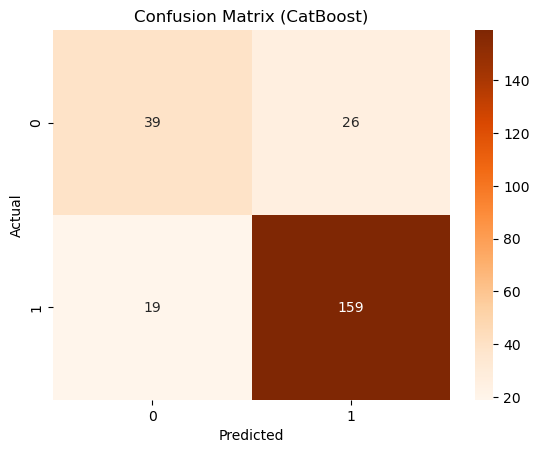

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

# === 1. Load data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# === 2. Prepare X and y ===
y = metadata["ADHD_Outcome"].values
meta_features = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded = pd.get_dummies(meta_features)
X = np.hstack((meta_encoded.values, pca_features))

# === 3. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 4. Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 5. SMOTE ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# === 6. Train CatBoost (with internal CV/tuning optional) ===
cat_model = CatBoostClassifier(verbose=100, random_state=42)
cat_model.fit(X_train_res, y_train_res)

# === 7. Predict + Evaluate ===
y_pred = cat_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# === 8. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (CatBoost)")
plt.show()

# === 9. Feature Importance ===
importances = cat_model.get_feature_importance()
feature_names = list(meta_encoded.columns) + [f'PCA_{i}' for i in range(pca_features.shape[1])]
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = feature_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title("Top 15 Feature Importances (CatBoost)")
plt.tight_layout()
plt.show()

# try only from here gugyghgfsfkfisbi
gjnfisnfisfisnleg
mdnsninfvgbhnj
mkshubsufg
fnfhsin
mfasilfis
fsmndsjvnis
fslkfsknvbfuabisnjbsfu


In [7]:
# === Common imports ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from collections import Counter

# === 1. Load data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# ==========================
# === ADHD PREDICTION ===
# ==========================
print("========== ADHD Prediction ==========")

# === Prepare X and y for ADHD ===
y_adhd = metadata["ADHD_Outcome"].values
meta_features_adhd = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded_adhd = pd.get_dummies(meta_features_adhd)
X_adhd = np.hstack((meta_encoded_adhd.values, pca_features))

# === Split, Scale, SMOTE ===
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_adhd, y_adhd, test_size=0.2, random_state=42, stratify=y_adhd)
scaler_a = StandardScaler()
X_train_scaled_a = scaler_a.fit_transform(X_train_a)
X_test_scaled_a = scaler_a.transform(X_test_a)
X_train_res_a, y_train_res_a = SMOTE(random_state=42).fit_resample(X_train_scaled_a, y_train_a)

# === Train CatBoost for ADHD ===
cat_model_adhd = CatBoostClassifier(verbose=0, random_state=42)
cat_model_adhd.fit(X_train_res_a, y_train_res_a)

# === Predict + Evaluate ADHD ===
y_pred_a = cat_model_adhd.predict(X_test_scaled_a)
print("ADHD Accuracy:", accuracy_score(y_test_a, y_pred_a))
print("ADHD ROC-AUC Score:", roc_auc_score(y_test_a, y_pred_a))
print("ADHD Classification Report:\n", classification_report(y_test_a, y_pred_a))

# === Confusion Matrix ADHD ===
sns.heatmap(confusion_matrix(y_test_a, y_pred_a), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (ADHD Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# === SEX_F PREDICTION ===
# ==========================
print("\n========== Sex_F Prediction ==========")

# === Prepare X and y for Sex_F ===
y_sex = metadata["Sex_F"].values
meta_features_sex = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded_sex = pd.get_dummies(meta_features_sex)  # <-- fixed here
X_sex = np.hstack((meta_encoded_sex.values, pca_features))

========== ADHD Prediction ==========
ADHD Accuracy: 0.7983539094650206
ADHD ROC-AUC Score: 0.7410029729306837
ADHD Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.58      0.65        77
           1       0.82      0.90      0.86       166

    accuracy                           0.80       243
   macro avg       0.77      0.74      0.75       243
weighted avg       0.79      0.80      0.79       243




========== Sex_F Prediction ==========


========== ADHD Prediction ==========
ADHD Accuracy: 0.7983539094650206
ADHD ROC-AUC Score: 0.7410029729306837
ADHD Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.58      0.65        77
           1       0.82      0.90      0.86       166

    accuracy                           0.80       243
   macro avg       0.77      0.74      0.75       243
weighted avg       0.79      0.80      0.79       243




========== Sex_F Prediction ==========
Sex_F Accuracy: 0.6460905349794238
Sex_F ROC-AUC Score: 0.525414156626506
Sex_F Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.91      0.77       160
           1       0.44      0.14      0.22        83

    accuracy                           0.65       243
   macro avg       0.56      0.53      0.49       243
weighted avg       0.59      0.65      0.58       243



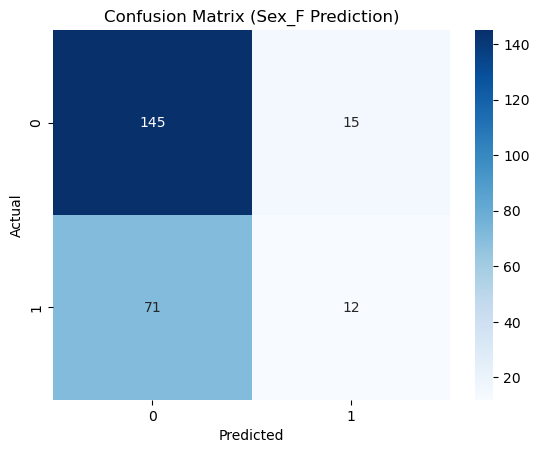

In [12]:
# === Common imports ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

# === 1. Load data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# ==========================
# === ADHD PREDICTION ===
# ==========================
print("========== ADHD Prediction ==========")

# === Prepare X and y for ADHD ===
y_adhd = metadata["ADHD_Outcome"].values
meta_features_adhd = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded_adhd = pd.get_dummies(meta_features_adhd)
X_adhd = np.hstack((meta_encoded_adhd.values, pca_features))

# === Split, Scale, SMOTE ===
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_adhd, y_adhd, test_size=0.2, random_state=42, stratify=y_adhd)
scaler_a = StandardScaler()
X_train_scaled_a = scaler_a.fit_transform(X_train_a)
X_test_scaled_a = scaler_a.transform(X_test_a)
X_train_res_a, y_train_res_a = SMOTE(random_state=42).fit_resample(X_train_scaled_a, y_train_a)

# === Train CatBoost for ADHD ===
cat_model_adhd = CatBoostClassifier(verbose=0, random_state=42)
cat_model_adhd.fit(X_train_res_a, y_train_res_a)

# === Predict + Evaluate ADHD ===
y_pred_a = cat_model_adhd.predict(X_test_scaled_a)
print("ADHD Accuracy:", accuracy_score(y_test_a, y_pred_a))
print("ADHD ROC-AUC Score:", roc_auc_score(y_test_a, y_pred_a))
print("ADHD Classification Report:\n", classification_report(y_test_a, y_pred_a))

# === Confusion Matrix ADHD ===
sns.heatmap(confusion_matrix(y_test_a, y_pred_a), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (ADHD Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# === SEX_F PREDICTION ===
# ==========================
print("\n========== Sex_F Prediction ==========")

# === Prepare X and y for Sex_F ===
y_sex = metadata["Sex_F"].values
meta_features_sex = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded_sex = pd.get_dummies(meta_features_sex)
X_sex = np.hstack((meta_encoded_sex.values, pca_features))

# === Split, Scale, SMOTE for Sex_F ===
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sex, y_sex, test_size=0.2, random_state=42, stratify=y_sex)
scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)
X_train_res_s, y_train_res_s = SMOTE(random_state=42).fit_resample(X_train_scaled_s, y_train_s)

# === Train CatBoost for Sex_F ===
cat_model_sex = CatBoostClassifier(verbose=0, random_state=42)
cat_model_sex.fit(X_train_res_s, y_train_res_s)

# === Predict + Evaluate Sex_F ===
y_pred_s = cat_model_sex.predict(X_test_scaled_s)
print("Sex_F Accuracy:", accuracy_score(y_test_s, y_pred_s))
print("Sex_F ROC-AUC Score:", roc_auc_score(y_test_s, y_pred_s))
print("Sex_F Classification Report:\n", classification_report(y_test_s, y_pred_s))

# === Confusion Matrix Sex_F ===
sns.heatmap(confusion_matrix(y_test_s, y_pred_s), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Sex_F Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


========== ADHD Prediction ==========
ADHD Accuracy: 0.7983539094650206
ADHD ROC-AUC Score: 0.7410029729306837
ADHD Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.58      0.65        77
           1       0.82      0.90      0.86       166

    accuracy                           0.80       243
   macro avg       0.77      0.74      0.75       243
weighted avg       0.79      0.80      0.79       243



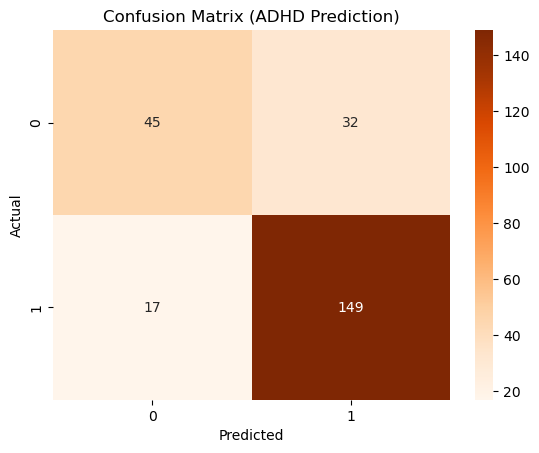

XGBoost - Sex_F Accuracy: 0.6378600823045267
XGBoost - Sex_F ROC-AUC Score: 0.5307605421686747
XGBoost - Sex_F Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76       160
           1       0.43      0.19      0.27        83

    accuracy                           0.64       243
   macro avg       0.55      0.53      0.51       243
weighted avg       0.59      0.64      0.59       243



In [14]:
# === Common imports ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

# === 1. Load data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# ==========================
# === ADHD PREDICTION ===
# ==========================
print("========== ADHD Prediction ==========")

# === Prepare X and y for ADHD ===
y_adhd = metadata["ADHD_Outcome"].values
meta_features_adhd = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded_adhd = pd.get_dummies(meta_features_adhd)
X_adhd = np.hstack((meta_encoded_adhd.values, pca_features))

# === Split, Scale, SMOTE ===
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_adhd, y_adhd, test_size=0.2, random_state=42, stratify=y_adhd)
scaler_a = StandardScaler()
X_train_scaled_a = scaler_a.fit_transform(X_train_a)
X_test_scaled_a = scaler_a.transform(X_test_a)
X_train_res_a, y_train_res_a = SMOTE(random_state=42).fit_resample(X_train_scaled_a, y_train_a)

# === Train CatBoost for ADHD ===
cat_model_adhd = CatBoostClassifier(verbose=0, random_state=42)
cat_model_adhd.fit(X_train_res_a, y_train_res_a)

# === Predict + Evaluate ADHD ===
y_pred_a = cat_model_adhd.predict(X_test_scaled_a)
print("ADHD Accuracy:", accuracy_score(y_test_a, y_pred_a))
print("ADHD ROC-AUC Score:", roc_auc_score(y_test_a, y_pred_a))
print("ADHD Classification Report:\n", classification_report(y_test_a, y_pred_a))

# === Confusion Matrix ADHD ===
sns.heatmap(confusion_matrix(y_test_a, y_pred_a), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (ADHD Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# === SEX_F PREDICTION ===
# ==========================
from xgboost import XGBClassifier

# === Train XGBoost for Sex_F ===
xgb_model_sex = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6,
                              subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model_sex.fit(X_train_res_s, y_train_res_s)

# === Predict + Evaluate ===
y_pred_s_xgb = xgb_model_sex.predict(X_test_scaled_s)
print("XGBoost - Sex_F Accuracy:", accuracy_score(y_test_s, y_pred_s_xgb))
print("XGBoost - Sex_F ROC-AUC Score:", roc_auc_score(y_test_s, y_pred_s_xgb))
print("XGBoost - Sex_F Classification Report:\n", classification_report(y_test_s, y_pred_s_xgb))

# === Confusion Matrix ===
sns.heatmap(confusion_matrix(y_test_s, y_pred_s_xgb), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Sex_F - XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Sex_F Accuracy: 0.6378600823045267
Sex_F ROC-AUC Score: 0.5220632530120481
Sex_F Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76       160
           1       0.42      0.16      0.23        83

    accuracy                           0.64       243
   macro avg       0.54      0.52      0.50       243
weighted avg       0.58      0.64      0.58       243



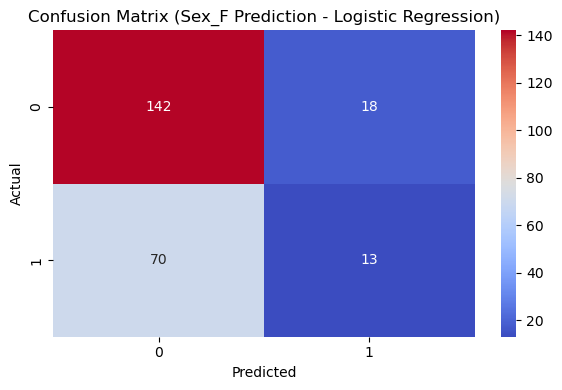

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()

# Extract metadata and PCA features
metadata = pd.DataFrame(data['metadata'])
pca_features = data['functional_matrix_pca']

# Prepare input features and target for Sex_F prediction
y_sex = metadata["Sex_F"].values
meta_features_sex = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded_sex = pd.get_dummies(meta_features_sex)
X_sex = np.hstack((meta_encoded_sex.values, pca_features))

# Split data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sex, y_sex, test_size=0.2, random_state=42, stratify=y_sex)

# Scale the features
scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)

# Train Logistic Regression Classifier with L2 regularization (Ridge)
logreg_model = LogisticRegression(
    penalty='l2', C=1.0, random_state=42
)
logreg_model.fit(X_train_scaled_s, y_train_s)

# Predictions
y_pred_s = logreg_model.predict(X_test_scaled_s)

# Evaluation
print("Sex_F Accuracy:", accuracy_score(y_test_s, y_pred_s))
print("Sex_F ROC-AUC Score:", roc_auc_score(y_test_s, y_pred_s))
print("Sex_F Classification Report:\n", classification_report(y_test_s, y_pred_s))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_s, y_pred_s), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix (Sex_F Prediction - Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
# === Common Imports ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

# === Load Data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# === Helper Function for Training ===
def train_model(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Balance with SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

    # CatBoost Model
    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=8,
        l2_leaf_reg=3,
        random_state=42,
        verbose=0
    )
    model.fit(X_train_res, y_train_res)

    # Predict + Evaluate
    y_pred = model.predict(X_test_scaled)
    print(f"\n========== {label} Prediction ==========")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({label} Prediction)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# === ADHD Prediction ===
y_adhd = metadata["ADHD_Outcome"].values
X_meta_adhd = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
X_adhd = np.hstack([pd.get_dummies(X_meta_adhd).values, pca_features])
train_model(X_adhd, y_adhd, "ADHD_Outcome")

# === Sex_F Prediction ===
y_sex = metadata["Sex_F"].values
X_meta_sex = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
X_sex = np.hstack([pd.get_dummies(X_meta_sex).values, pca_features])
train_model(X_sex, y_sex, "Sex_F")

C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Sex_F Accuracy: 0.6378600823045267
✅ Sex_F ROC-AUC Score: 0.5619728915662651
✅ Sex_F Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76       160
           1       0.42      0.16      0.23        83

    accuracy                           0.64       243
   macro avg       0.54      0.52      0.50       243
weighted avg       0.58      0.64      0.58       243



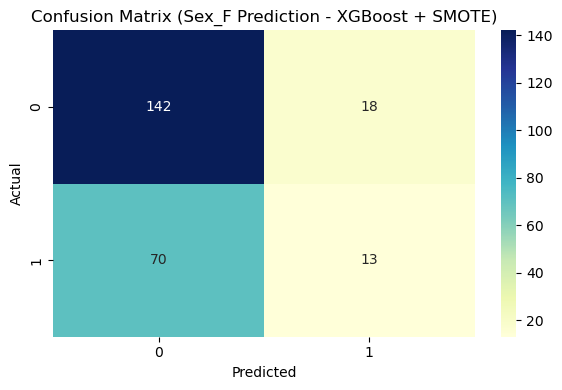

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# === Load the dataset ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data['metadata'])
pca_features = data['functional_matrix_pca']

# === Prepare input features and target for Sex_F prediction ===
y_sex = metadata["Sex_F"].values
meta_features = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded = pd.get_dummies(meta_features)
X = np.hstack((meta_encoded.values, pca_features))

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y_sex, test_size=0.2, random_state=42, stratify=y_sex)

# === Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === SMOTE Oversampling ===
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# === Train XGBoost Classifier ===
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

# === Predictions ===
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# === Evaluation ===
print("✅ Sex_F Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Sex_F ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("✅ Sex_F Classification Report:\n", classification_report(y_test, y_pred))

# === Confusion Matrix ===
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix (Sex_F Prediction - XGBoost + SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [5]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
     ---------------------------------------- 0.0/49.8 kB ? eta -:--:--
     ---------------------------------------- 49.8/49.8 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/376.0 MB 5.1 MB/s eta 0:01:14
   ---------------------------------------- 0.3/376.0 MB 3.8 MB/s eta 0:01:39
   ---------------------------------------- 0.4/376.0 MB 3.4 MB/s eta 0:01:50
   ---------------------------------------- 0.8/376.0 MB 4.1 MB/s eta 0:01:31
   ---------------------------------------- 1.2/376.0 MB 4.9 MB/s eta 0:01:17
   ---------------------------------------- 1.5/376.0 MB 5.3 MB/s eta 0:01:11
   ---------------------------------------- 1.8/376.0 MB 5.9 MB/s eta 0:01:04
   ---------------------------------------- 2.1/376.0 MB 5.7 MB/s eta 0:01:06
   ---------------------------------------- 2.5/376.0 MB 5.8 MB/s 

In [9]:
pip install pytorch-tabnet


   ---------------------------------------- 0.0/44.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 kB ? eta -:--:--
   ---------------------------------------- 44.5/44.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


0:	test: 0.5176205	best: 0.5176205 (0)	total: 230ms	remaining: 3m 49s
100:	test: 0.5650602	best: 0.5810241 (62)	total: 4.63s	remaining: 41.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5810240964
bestIteration = 62

Shrink model to first 63 iterations.
✅ Accuracy: 0.6296296296296297
✅ ROC-AUC Score: 0.5810240963855422
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.74       160
           1       0.44      0.34      0.38        83

    accuracy                           0.63       243
   macro avg       0.57      0.56      0.56       243
weighted avg       0.61      0.63      0.62       243



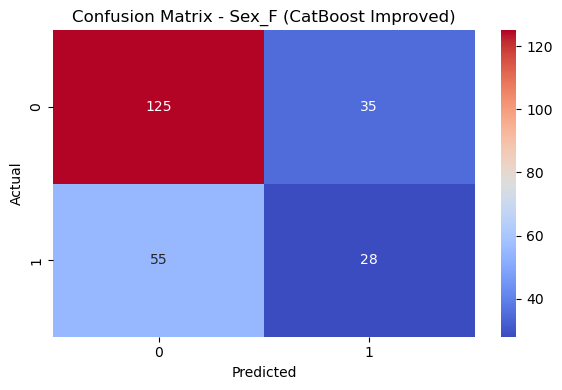

In [13]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data['metadata'])
pca_features = data['functional_matrix_pca']

# Target and features for Sex_F prediction
y = metadata["Sex_F"].values
X_meta = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors='ignore')
X_meta_encoded = pd.get_dummies(X_meta)
X = np.hstack((X_meta_encoded.values, pca_features))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Count class imbalance
from collections import Counter
counts = Counter(y_train)
weight_ratio = counts[0] / counts[1]

# CatBoost with class weights
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    class_weights=[1.0, weight_ratio],  # Give more importance to class 1 (female)
    verbose=100,
    random_seed=42
)

# Train the model
model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test), early_stopping_rounds=50)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - Sex_F (CatBoost Improved)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


0:	test: 0.5176205	best: 0.5176205 (0)	total: 130ms	remaining: 2m 9s
100:	test: 0.5650602	best: 0.5810241 (62)	total: 4.75s	remaining: 42.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5810240964
bestIteration = 62

Shrink model to first 63 iterations.
✅ Accuracy: 0.6296296296296297
✅ ROC-AUC Score: 0.5810240963855422
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.74       160
           1       0.44      0.34      0.38        83

    accuracy                           0.63       243
   macro avg       0.57      0.56      0.56       243
weighted avg       0.61      0.63      0.62       243



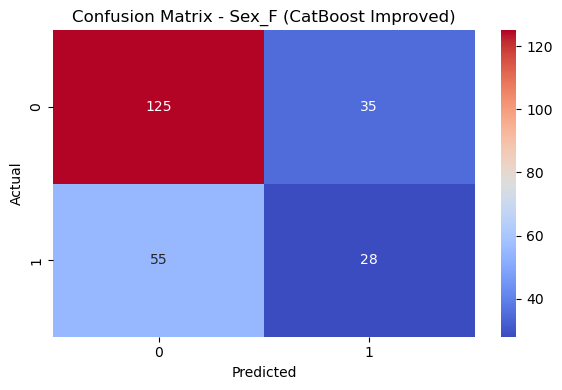

In [15]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data['metadata'])
pca_features = data['functional_matrix_pca']

# Target and features for Sex_F prediction
y = metadata["Sex_F"].values
X_meta = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors='ignore')
X_meta_encoded = pd.get_dummies(X_meta)
X = np.hstack((X_meta_encoded.values, pca_features))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Count class imbalance
from collections import Counter
counts = Counter(y_train)
weight_ratio = counts[0] / counts[1]

# CatBoost with class weights
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    class_weights=[1.0, weight_ratio],  # Give more importance to class 1 (female)
    verbose=100,
    random_seed=42
)

# Train the model
model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test), early_stopping_rounds=50)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - Sex_F (CatBoost Improved)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


✅ Sex_F Accuracy: 0.6378600823045267
✅ Sex_F ROC-AUC Score: 0.5494728915662651
✅ Sex_F Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76       160
           1       0.42      0.16      0.23        83

    accuracy                           0.64       243
   macro avg       0.54      0.52      0.50       243
weighted avg       0.58      0.64      0.58       243



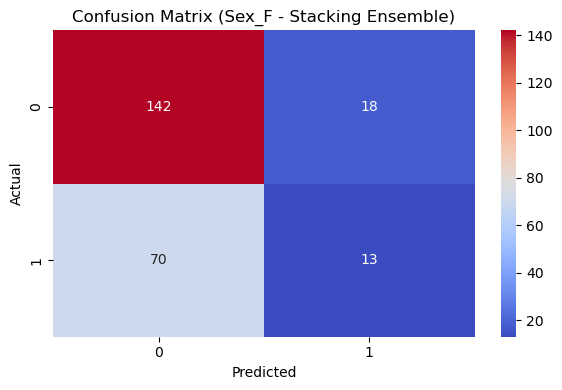

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data['metadata'])
pca_features = data['functional_matrix_pca']

# Prepare input features and target for Sex_F prediction
y_sex = metadata["Sex_F"].values
meta_features_sex = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")
meta_encoded_sex = pd.get_dummies(meta_features_sex)
X_sex = np.hstack((meta_encoded_sex.values, pca_features))

# Split the data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sex, y_sex, test_size=0.2, random_state=42, stratify=y_sex)

# Scale features
scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)

# Define base models
base_learners = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
]

# Define stacking model
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1,
    passthrough=True
)

# Train the model
stack_model.fit(X_train_scaled_s, y_train_s)

# Predictions
y_pred_s = stack_model.predict(X_test_scaled_s)
y_proba_s = stack_model.predict_proba(X_test_scaled_s)[:, 1]

# Evaluation
print("✅ Sex_F Accuracy:", accuracy_score(y_test_s, y_pred_s))
print("✅ Sex_F ROC-AUC Score:", roc_auc_score(y_test_s, y_proba_s))
print("✅ Sex_F Classification Report:\n", classification_report(y_test_s, y_pred_s))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_s, y_pred_s), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix (Sex_F - Stacking Ensemble)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:04:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Sex_F Accuracy: 0.6502057613168725

Sex_F Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       160
           1       0.42      0.06      0.11        83

    accuracy                           0.65       243
   macro avg       0.54      0.51      0.44       243
weighted avg       0.58      0.65      0.55       243



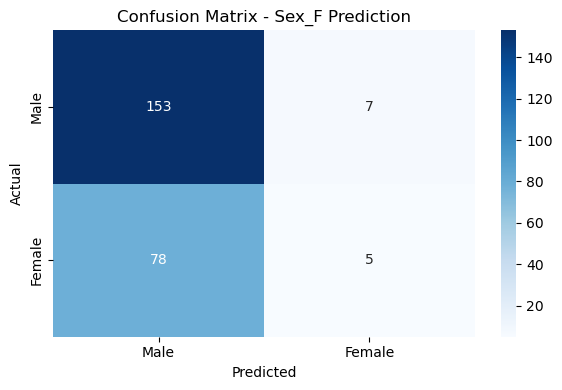

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load training data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Extract target: Sex_F ===
y_sex = metadata['Sex_F'].values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# === 3. One-hot encode metadata ===
X_meta_encoded = pd.get_dummies(X_meta)

# === 4. Combine PCA and metadata features ===
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 5. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_sex, test_size=0.2, random_state=42, stratify=y_sex)

# === 6. Scale features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 7. Train XGBoost Classifier for Sex_F ===
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# === 8. Predictions and Evaluation ===
y_pred = xgb_model.predict(X_test_scaled)

print("✅ Sex_F Accuracy:", accuracy_score(y_test, y_pred))
print("\nSex_F Classification Report:")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Sex_F Prediction")
plt.tight_layout()
plt.show()


In [25]:
# this 1st i mean highest one
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
import os

# === 1. Load training data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Extract targets: ADHD_Outcome and Sex_F ===
y = metadata[['ADHD_Outcome', 'Sex_F']].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# === 3. One-hot encode metadata ===
X_meta_encoded = pd.get_dummies(X_meta)

# === 4. Combine PCA and metadata features ===
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 5. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)

# === 6. Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 7. Define and train MultiOutput XGBoost model ===
xgb_base = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
multi_xgb = MultiOutputClassifier(xgb_base)
multi_xgb.fit(X_train_scaled, y_train)

# === 8. Evaluate model ===
y_pred = multi_xgb.predict(X_test_scaled)

print("✅ Accuracy per Target:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test[:, 0], y_pred[:, 0]))
print("Sex_F Accuracy:", accuracy_score(y_test[:, 1], y_pred[:, 1]))

print("\n📊 Classification Report for ADHD_Outcome:")
print(classification_report(y_test[:, 0], y_pred[:, 0]))

print("📊 Classification Report for Sex_F:")
print(classification_report(y_test[:, 1], y_pred[:, 1]))





C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:08:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:08:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy per Target:
ADHD_Outcome Accuracy: 0.7942386831275721
Sex_F Accuracy: 0.6790123456790124

📊 Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.66      0.48      0.55        65
           1       0.83      0.91      0.87       178

    accuracy                           0.79       243
   macro avg       0.74      0.69      0.71       243
weighted avg       0.78      0.79      0.78       243

📊 Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       171
           1       0.31      0.07      0.11        72

    accuracy                           0.68       243
   macro avg       0.51      0.50      0.46       243
weighted avg       0.59      0.68      0.60       243



C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:10:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:10:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy per Target:
ADHD_Outcome Accuracy: 0.7942386831275721
Sex_F Accuracy: 0.6790123456790124

📊 Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.66      0.48      0.55        65
           1       0.83      0.91      0.87       178

    accuracy                           0.79       243
   macro avg       0.74      0.69      0.71       243
weighted avg       0.78      0.79      0.78       243

📊 Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       171
           1       0.31      0.07      0.11        72

    accuracy                           0.68       243
   macro avg       0.51      0.50      0.46       243
weighted avg       0.59      0.68      0.60       243



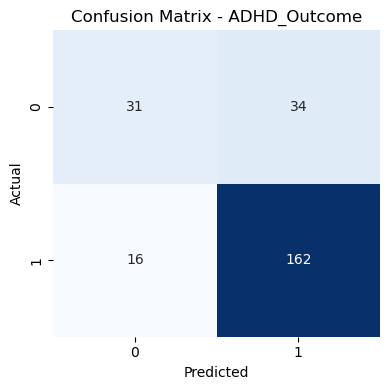

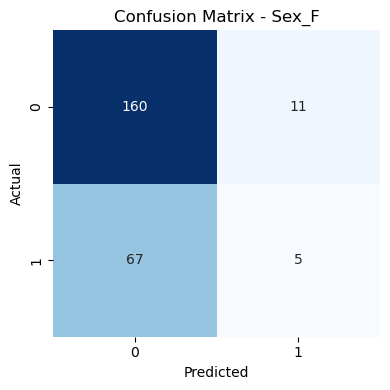

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load training data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Extract targets: ADHD_Outcome and Sex_F ===
y = metadata[['ADHD_Outcome', 'Sex_F']].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# === 3. One-hot encode metadata ===
X_meta_encoded = pd.get_dummies(X_meta)

# === 4. Combine PCA and metadata features ===
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 5. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)

# === 6. Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 7. Define and train MultiOutput XGBoost model ===
xgb_base = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
multi_xgb = MultiOutputClassifier(xgb_base)
multi_xgb.fit(X_train_scaled, y_train)

# === 8. Evaluate model ===
y_pred = multi_xgb.predict(X_test_scaled)

print("✅ Accuracy per Target:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test[:, 0], y_pred[:, 0]))
print("Sex_F Accuracy:", accuracy_score(y_test[:, 1], y_pred[:, 1]))

print("\n📊 Classification Report for ADHD_Outcome:")
print(classification_report(y_test[:, 0], y_pred[:, 0]))

print("📊 Classification Report for Sex_F:")
print(classification_report(y_test[:, 1], y_pred[:, 1]))

# === 9. Confusion Matrices ===
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test[:, 0], y_pred[:, 0], "ADHD_Outcome")
plot_confusion_matrix(y_test[:, 1], y_pred[:, 1], "Sex_F")


Class Weights: {0: 1.0, 1: 1.0}
0:	learn: 0.6789639	test: 0.5555556	best: 0.5555556 (0)	total: 216ms	remaining: 3m 36s
100:	learn: 0.9756672	test: 0.6831276	best: 0.7078189 (56)	total: 4.99s	remaining: 44.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.70781893
bestIteration = 56

Shrink model to first 57 iterations.

Validation Accuracy: 0.7078189300411523
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       160
           1       0.64      0.33      0.43        83

    accuracy                           0.71       243
   macro avg       0.68      0.62      0.62       243
weighted avg       0.69      0.71      0.68       243



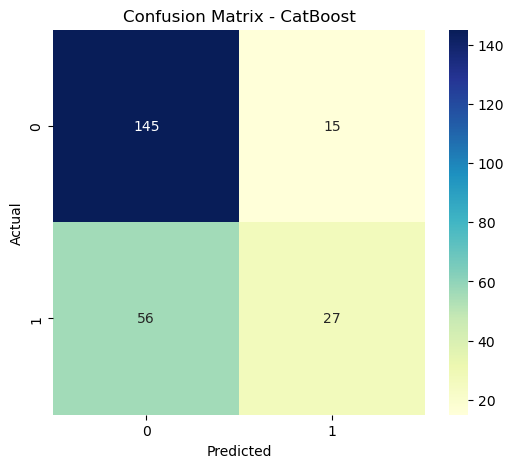


Sample Final Predictions:
  participant_id  Predicted_Sex_F
0   Cfwaf5FX7jWK                1
1   vhGrzmvA3Hjq                1
2   ULliyEXjy4OV                1
3   LZfeAb1xMtql                1
4   EnFOUv0YK1RG                1


In [1]:
# === Imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.combine import SMOTETomek
from catboost import CatBoostClassifier

# === 1. Load data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Prepare metadata ===
X_meta = metadata.drop(columns=['participant_id', 'Sex_F'], errors='ignore')
X_meta_encoded = pd.get_dummies(X_meta)

# === 3. Target extraction ===
y = metadata['Sex_F'].astype(int).values

# === 4. Combine PCA and metadata features ===
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 5. Train-test split (stratified) ===
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

# === 6. Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 7. Apply BorderlineSMOTE + Tomek Links ===
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

# === 8. Compute class weights (optional) ===
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(zip(np.unique(y_train_resampled), class_weights))
print("Class Weights:", class_weight_dict)

# === 9. Train CatBoost Classifier ===
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    class_weights=[class_weight_dict[0], class_weight_dict[1]],
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50
)

cat_model.fit(X_train_resampled, y_train_resampled, eval_set=(X_test_scaled, y_test))

# === 10. Predict and Evaluate ===
y_pred = cat_model.predict(X_test_scaled)

print("\nValidation Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# === 11. Plot Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()

# === 12. Load and prepare final test data ===
test_data = np.load("final_preprocessed_for_modeling_test.npy", allow_pickle=True).item()
test_metadata = pd.DataFrame(test_data['metadata'])
test_pca_features = test_data['functional_matrix_pca']

test_meta = test_metadata.drop(columns=['participant_id', 'Sex_F'], errors='ignore')
test_meta_encoded = pd.get_dummies(test_meta)

# Align columns
missing_cols = set(X_meta_encoded.columns) - set(test_meta_encoded.columns)
for col in missing_cols:
    test_meta_encoded[col] = 0
test_meta_encoded = test_meta_encoded[X_meta_encoded.columns]

# Pad PCA if needed
required_pca = functional_matrix.shape[1]
if test_pca_features.shape[1] < required_pca:
    padding = np.zeros((test_pca_features.shape[0], required_pca - test_pca_features.shape[1]))
    test_pca_padded = np.hstack((test_pca_features, padding))
else:
    test_pca_padded = test_pca_features

# Combine and scale
X_test_final = np.hstack((test_pca_padded, test_meta_encoded.values))
X_test_final_scaled = scaler.transform(X_test_final)

# === 13. Final Predictions ===
final_predictions = cat_model.predict(X_test_final_scaled)

submission = pd.DataFrame({'Predicted_Sex_F': final_predictions})
if 'participant_id' in test_metadata.columns:
    submission.insert(0, 'participant_id', test_metadata['participant_id'])

print("\nSample Final Predictions:")
print(submission.head())

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
data = np.load("final_preprocessed_for_modeling200.npy", allow_pickle=True).item()
metadata = pd.DataFrame(data["metadata"])
pca_features = data["functional_matrix_pca"]

# Extract targets: both ADHD_Outcome and Sex_F
y = metadata[["ADHD_Outcome", "Sex_F"]].values

# Prepare features (drop both targets)
meta_features = metadata.drop(columns=["ADHD_Outcome", "Sex_F"], errors="ignore")

# One-hot encode categorical metadata
meta_encoded = pd.get_dummies(meta_features)

# Combine metadata and PCA features
X_combined = np.hstack((meta_encoded.values, pca_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multi-output model
base_model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42)
multi_model = MultiOutputClassifier(base_model)

# Train
multi_model.fit(X_train_scaled, y_train)

# Predict
y_pred = multi_model.predict(X_test_scaled)

# Evaluate
print("Accuracy for each target:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test[:, 0], y_pred[:, 0]))
print("Sex_F Accuracy:", accuracy_score(y_test[:, 1], y_pred[:, 1]))

print("\nClassification Report for ADHD_Outcome:")
print(classification_report(y_test[:, 0], y_pred[:, 0]))

print("Classification Report for Sex_F:")
print(classification_report(y_test[:, 1], y_pred[:, 1]))


Accuracy for each target:
ADHD_Outcome Accuracy: 0.7736625514403292
Sex_F Accuracy: 0.7078189300411523

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.73      0.25      0.37        65
           1       0.78      0.97      0.86       178

    accuracy                           0.77       243
   macro avg       0.75      0.61      0.61       243
weighted avg       0.76      0.77      0.73       243

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       171
           1       1.00      0.01      0.03        72

    accuracy                           0.71       243
   macro avg       0.85      0.51      0.43       243
weighted avg       0.79      0.71      0.59       243



In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# === 1. Load data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Targets ===
y = metadata[['ADHD_Outcome', 'Sex_F']].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# === 3. Encode metadata ===
X_meta_encoded = pd.get_dummies(X_meta)

# === 4. Combine features ===
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 5. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)

# === 6. Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 7. Split targets ===
y_train_adhd = y_train[:, 0]
y_train_sex = y_train[:, 1]
y_test_adhd = y_test[:, 0]
y_test_sex = y_test[:, 1]

# === 8. SMOTE for Sex_F (to fix class imbalance) ===
smote = SMOTE(random_state=42)
X_train_smote, y_train_sex_smote = smote.fit_resample(X_train_scaled, y_train_sex)

# === 9. XGBoost for ADHD_Outcome ===
xgb_adhd = XGBClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.85,
    colsample_bytree=0.7,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_adhd.fit(X_train_scaled, y_train_adhd)

# === 10. XGBoost for Sex_F ===
xgb_sex = XGBClassifier(
    n_estimators=500,
    learning_rate=0.04,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    scale_pos_weight=1.5,  # adjust for class imbalance
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_sex.fit(X_train_smote, y_train_sex_smote)

# === 11. Predictions ===
y_pred_adhd = xgb_adhd.predict(X_test_scaled)
y_pred_sex = xgb_sex.predict(X_test_scaled)

# === 12. Evaluation ===
print("✅ Accuracy:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))
print("Sex_F Accuracy:", accuracy_score(y_test_sex, y_pred_sex))

print("\n📊 ADHD_Outcome Classification Report:")
print(classification_report(y_test_adhd, y_pred_adhd))

print("📊 Sex_F Classification Report:")
print(classification_report(y_test_sex, y_pred_sex))

print("🧩 Confusion Matrix for Sex_F:")
print(confusion_matrix(y_test_sex, y_pred_sex))


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:51:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:51:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy:
ADHD_Outcome Accuracy: 0.8106995884773662
Sex_F Accuracy: 0.654320987654321

📊 ADHD_Outcome Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.52      0.60        65
           1       0.84      0.92      0.88       178

    accuracy                           0.81       243
   macro avg       0.77      0.72      0.74       243
weighted avg       0.80      0.81      0.80       243

📊 Sex_F Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       171
           1       0.37      0.24      0.29        72

    accuracy                           0.65       243
   macro avg       0.55      0.53      0.53       243
weighted avg       0.62      0.65      0.63       243

🧩 Confusion Matrix for Sex_F:
[[142  29]
 [ 55  17]]


In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# === 1. Load data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Targets ===
y = metadata[['ADHD_Outcome', 'Sex_F']].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# === 3. Encode metadata ===
X_meta_encoded = pd.get_dummies(X_meta)

# === 4. Combine features ===
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 5. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)

# === 6. Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 7. Split targets ===
y_train_adhd = y_train[:, 0]
y_train_sex = y_train[:, 1]
y_test_adhd = y_test[:, 0]
y_test_sex = y_test[:, 1]

# === 8. SMOTE for Sex_F (to fix class imbalance) ===
smote = SMOTE(random_state=42)
X_train_smote, y_train_sex_smote = smote.fit_resample(X_train_scaled, y_train_sex)

# === 9. XGBoost for ADHD_Outcome ===
xgb_adhd = XGBClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.7,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_adhd.fit(X_train_scaled, y_train_adhd)

# === 10. XGBoost for Sex_F ===
xgb_sex = XGBClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    scale_pos_weight=1.5,  # adjust for class imbalance
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_sex.fit(X_train_smote, y_train_sex_smote)

# === 11. Predictions ===
y_pred_adhd = xgb_adhd.predict(X_test_scaled)
y_pred_sex = xgb_sex.predict(X_test_scaled)

# === 12. Evaluation ===
print("✅ Accuracy:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))
print("Sex_F Accuracy:", accuracy_score(y_test_sex, y_pred_sex))

print("\n📊 ADHD_Outcome Classification Report:")
print(classification_report(y_test_adhd, y_pred_adhd))

print("📊 Sex_F Classification Report:")
print(classification_report(y_test_sex, y_pred_sex))

print("🧩 Confusion Matrix for Sex_F:")
print(confusion_matrix(y_test_sex, y_pred_sex))


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:02:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy:
ADHD_Outcome Accuracy: 0.8148148148148148
Sex_F Accuracy: 0.654320987654321

📊 ADHD_Outcome Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        65
           1       0.84      0.92      0.88       178

    accuracy                           0.81       243
   macro avg       0.77      0.73      0.74       243
weighted avg       0.81      0.81      0.81       243

📊 Sex_F Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       171
           1       0.37      0.24      0.29        72

    accuracy                           0.65       243
   macro avg       0.55      0.53      0.53       243
weighted avg       0.62      0.65      0.63       243

🧩 Confusion Matrix for Sex_F:
[[142  29]
 [ 55  17]]


In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

# === Load Data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === Targets ===
y = metadata[['ADHD_Outcome', 'Sex_F']].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')
X_meta_encoded = pd.get_dummies(X_meta)
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Feature Selection ===
selector = SelectKBest(f_classif, k=300)
X_train_selected = selector.fit_transform(X_train_scaled, y_train[:, 0])
X_test_selected = selector.transform(X_test_scaled)

# === Separate Targets ===
y_train_adhd = y_train[:, 0]
y_train_sex = y_train[:, 1]
y_test_adhd = y_test[:, 0]
y_test_sex = y_test[:, 1]

# === SMOTE for Sex_F ===
smote = SMOTE(random_state=42)
X_train_smote, y_train_sex_smote = smote.fit_resample(X_train_selected, y_train_sex)

# === ADHD_Outcome: XGBoost ===
adhd_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.04,
    max_depth=6,
    subsample=0.85,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
adhd_model.fit(X_train_selected, y_train_adhd)
y_pred_adhd = adhd_model.predict(X_test_selected)

# === Sex_F: Stacking Ensemble (XGBoost + CatBoost + RF) ===
sex_base_models = [
    ('xgb', XGBClassifier(n_estimators=250, learning_rate=0.05, max_depth=6, use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('cat', CatBoostClassifier(iterations=250, learning_rate=0.05, depth=6, verbose=0, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42))
]
sex_final_model = LogisticRegression(max_iter=1000)

sex_stacking = StackingClassifier(
    estimators=sex_base_models,
    final_estimator=sex_final_model,
    passthrough=True,
    cv=3,
    n_jobs=-1
)
sex_stacking.fit(X_train_smote, y_train_sex_smote)
y_pred_sex = sex_stacking.predict(X_test_selected)

# === Evaluation ===
print("✅ Final Accuracy:")
print("ADHD_Outcome:", accuracy_score(y_test_adhd, y_pred_adhd))
print("Sex_F:", accuracy_score(y_test_sex, y_pred_sex))

print("\n📊 ADHD_Outcome Report:")
print(classification_report(y_test_adhd, y_pred_adhd))

print("\n📊 Sex_F Report:")
print(classification_report(y_test_sex, y_pred_sex))

print("🧩 Sex_F Confusion Matrix:")
print(confusion_matrix(y_test_sex, y_pred_sex))


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 434  437  453  457  460  461  466  469  474  478  479  482  490  494
  500  507  512  513  514  525  529  532  546  552  556  557  565  566
  568  569  574  575  583  587  606  608  619  622  629  632  663  679
  685  687  695  699  710  713  714  725  739  742  747  748  754  755
  756  766  768  770  782  784  787  788  794  808  813  814  821  824
  831  832  838  850  854  856  862  865  870  871  875  884  889  893
  895  897  898  899  907  908  914  918  919  921  928  933  935  938
  939  942  952  959  961  962  967  968  970  971  974  984  986  993
  996  999 1004 1005 1019 1026 1027 1028 1034 1036 1041 1043 1045 1054
 1057 1058 1061 1077 1078 1083 1092 1096 1104 1106 1111 1113 1115 1131
 1136 1139 1145 1149 1151 1152 1155 1157 1161 1183 1188 1196 1200 1207
 1208 1209 1213 1221 1223 1224 1234 1235 1242 1256 1262 1267 1275 1288
 1294 1297 1301 1302

✅ Final Accuracy:
ADHD_Outcome: 0.7983539094650206
Sex_F: 0.6213991769547325

📊 ADHD_Outcome Report:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        65
           1       0.83      0.92      0.87       178

    accuracy                           0.80       243
   macro avg       0.75      0.70      0.71       243
weighted avg       0.79      0.80      0.79       243


📊 Sex_F Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       171
           1       0.33      0.26      0.29        72

    accuracy                           0.62       243
   macro avg       0.52      0.52      0.52       243
weighted avg       0.60      0.62      0.61       243

🧩 Sex_F Confusion Matrix:
[[132  39]
 [ 53  19]]


In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# === Load Data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === Target and Feature Prep ===
y = metadata[['ADHD_Outcome', 'Sex_F']].astype(int).values
X_meta = pd.get_dummies(metadata.drop(columns=['ADHD_Outcome', 'Sex_F']))
X_combined = np.hstack((functional_matrix, X_meta.values))

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Feature Selection ===
selector = SelectKBest(score_func=f_classif, k=300)
X_train_selected = selector.fit_transform(X_train_scaled, y_train[:, 0])
X_test_selected = selector.transform(X_test_scaled)

# === Target Split ===
y_train_adhd = y_train[:, 0]
y_test_adhd = y_test[:, 0]
y_train_sex = y_train[:, 1]
y_test_sex = y_test[:, 1]

# === SMOTE for Sex_F ===
smote = SMOTE(random_state=42)
X_sex_smote, y_sex_smote = smote.fit_resample(X_train_selected, y_train_sex)

# === ADHD_Outcome - Pure CatBoost ===
adhd_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.02,
    depth=8,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)
adhd_model.fit(X_train_selected, y_train_adhd)
y_pred_adhd = adhd_model.predict(X_test_selected)

# === Sex_F - Stacking with CatBoost, LightGBM, XGBoost ===
stack_model_sex = StackingClassifier(
    estimators=[
        ('cat', CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, verbose=0, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=6, use_label_encoder=False, eval_metric='logloss', random_state=42)),
        ('lgb', LGBMClassifier(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=3,
    n_jobs=-1,
    passthrough=True
)
stack_model_sex.fit(X_sex_smote, y_sex_smote)
y_pred_sex = stack_model_sex.predict(X_test_selected)

# === Evaluation ===
print("✅ Final Accuracy:")
print("ADHD_Outcome Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))
print("Sex_F Accuracy:", accuracy_score(y_test_sex, y_pred_sex))

print("\n📊 ADHD_Outcome Classification Report:")
print(classification_report(y_test_adhd, y_pred_adhd))

print("\n📊 Sex_F Classification Report:")
print(classification_report(y_test_sex, y_pred_sex))


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 434  437  453  457  460  461  466  469  474  478  479  482  490  494
  500  507  512  513  514  525  529  532  546  552  556  557  565  566
  568  569  574  575  583  587  606  608  619  622  629  632  663  679
  685  687  695  699  710  713  714  725  739  742  747  748  754  755
  756  766  768  770  782  784  787  788  794  808  813  814  821  824
  831  832  838  850  854  856  862  865  870  871  875  884  889  893
  895  897  898  899  907  908  914  918  919  921  928  933  935  938
  939  942  952  959  961  962  967  968  970  971  974  984  986  993
  996  999 1004 1005 1019 1026 1027 1028 1034 1036 1041 1043 1045 1054
 1057 1058 1061 1077 1078 1083 1092 1096 1104 1106 1111 1113 1115 1131
 1136 1139 1145 1149 1151 1152 1155 1157 1161 1183 1188 1196 1200 1207
 1208 1209 1213 1221 1223 1224 1234 1235 1242 1256 1262 1267 1275 1288
 1294 1297 1301 1302

✅ Final Accuracy:
ADHD_Outcome Accuracy: 0.8065843621399177
Sex_F Accuracy: 0.6008230452674898

📊 ADHD_Outcome Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.51      0.58        65
           1       0.84      0.92      0.87       178

    accuracy                           0.81       243
   macro avg       0.76      0.71      0.73       243
weighted avg       0.80      0.81      0.80       243


📊 Sex_F Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       171
           1       0.31      0.28      0.29        72

    accuracy                           0.60       243
   macro avg       0.51      0.51      0.51       243
weighted avg       0.59      0.60      0.59       243



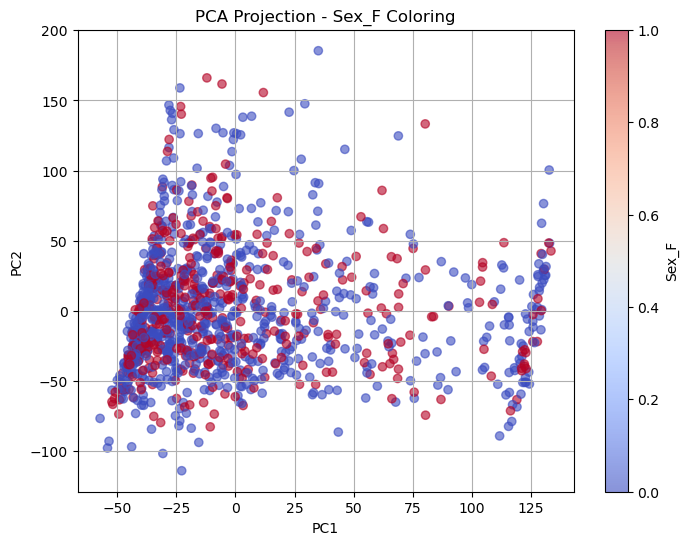

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_combined)

plt.figure(figsize=(8, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=metadata['Sex_F'], cmap='coolwarm', alpha=0.6)
plt.title("PCA Projection - Sex_F Coloring")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Sex_F')
plt.grid(True)
plt.show()


Before SMOTE: [305 665]
After SMOTE: [665 665]


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:13:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ ADHD_Outcome Accuracy: 0.8024691358024691

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.60      0.66        77
           1       0.83      0.90      0.86       166

    accuracy                           0.80       243
   macro avg       0.78      0.75      0.76       243
weighted avg       0.80      0.80      0.80       243



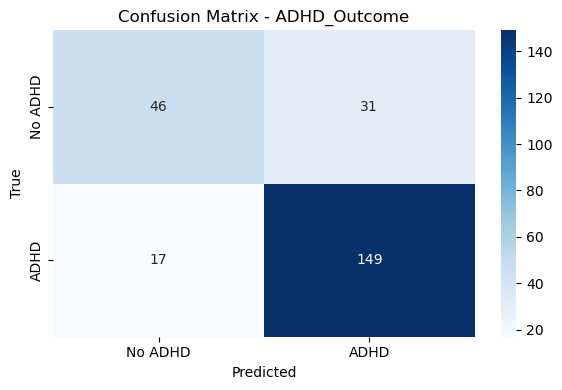

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Extract ADHD_Outcome Target Only ===
y = metadata['ADHD_Outcome'].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# === 3. One-hot Encode Metadata & Combine Features ===
X_meta_encoded = pd.get_dummies(X_meta)
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 4. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

# === 5. Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 6. Handle Imbalance (if exists) ===
print("Before SMOTE:", np.bincount(y_train))
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("After SMOTE:", np.bincount(y_train_res))

# === 7. XGBoost with Tuned Parameters ===
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb.fit(X_train_res, y_train_res)
y_pred = xgb.predict(X_test_scaled)

# === 8. Evaluation ===
print("✅ ADHD_Outcome Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No ADHD', 'ADHD'], yticklabels=['No ADHD', 'ADHD'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ADHD_Outcome')
plt.tight_layout()
plt.show()


In [55]:
pip install catboost imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


0:	learn: 0.8127820	total: 231ms	remaining: 3m 50s
100:	learn: 0.9917293	total: 18.5s	remaining: 2m 44s
200:	learn: 1.0000000	total: 36.2s	remaining: 2m 23s
300:	learn: 1.0000000	total: 53.9s	remaining: 2m 5s
400:	learn: 1.0000000	total: 1m 11s	remaining: 1m 46s
500:	learn: 1.0000000	total: 1m 29s	remaining: 1m 28s
600:	learn: 1.0000000	total: 1m 46s	remaining: 1m 10s
700:	learn: 1.0000000	total: 2m 4s	remaining: 53.2s
800:	learn: 1.0000000	total: 2m 22s	remaining: 35.4s
900:	learn: 1.0000000	total: 2m 40s	remaining: 17.6s
999:	learn: 1.0000000	total: 2m 58s	remaining: 0us
✅ Accuracy: 0.7901234567901234

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        77
           1       0.82      0.89      0.85       166

    accuracy                           0.79       243
   macro avg       0.76      0.73      0.75       243
weighted avg       0.78      0.79      0.78       243



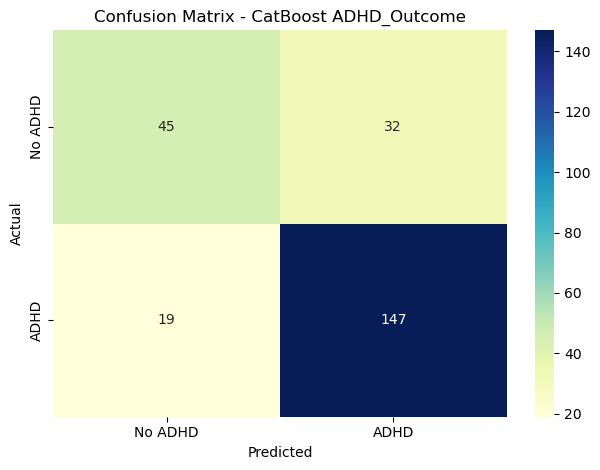

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. ADHD_Outcome Target Only ===
y = metadata['ADHD_Outcome'].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')
X_meta_encoded = pd.get_dummies(X_meta)
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 3. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 5. SMOTE ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# === 6. CatBoost Model ===
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=3,
    random_seed=42,
    eval_metric='Accuracy',
    verbose=100
)

model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test_scaled)

# === 7. Evaluation ===
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# === 8. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No ADHD', 'ADHD'], yticklabels=['No ADHD', 'ADHD'])
plt.title('Confusion Matrix - CatBoost ADHD_Outcome')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:23:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ ADHD_Outcome Accuracy: 0.7983539094650206

📊 Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.67      0.49      0.57        65
           1       0.83      0.91      0.87       178

    accuracy                           0.80       243
   macro avg       0.75      0.70      0.72       243
weighted avg       0.79      0.80      0.79       243

✅ Sex_F Accuracy: 0.774294670846395

📊 Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       160
           1       0.82      0.70      0.76       159

    accuracy                           0.77       319
   macro avg       0.78      0.77      0.77       319
weighted avg       0.78      0.77      0.77       319



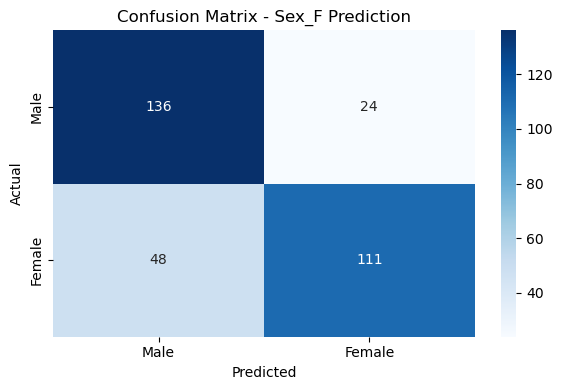

In [59]:
# final 76 one this code  
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load training data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Extract target columns ===
y_adhd = metadata['ADHD_Outcome'].astype(int).values
y_sex = metadata['Sex_F'].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# === 3. One-hot encode metadata ===
X_meta_encoded = pd.get_dummies(X_meta)
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 4. ADHD_Outcome model (XGBoost) ===
X_train_adhd, X_test_adhd, y_train_adhd, y_test_adhd = train_test_split(
    X_combined, y_adhd, test_size=0.2, random_state=42
)

scaler_adhd = StandardScaler()
X_train_adhd_scaled = scaler_adhd.fit_transform(X_train_adhd)
X_test_adhd_scaled = scaler_adhd.transform(X_test_adhd)

xgb_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train_adhd_scaled, y_train_adhd)
y_pred_adhd = xgb_model.predict(X_test_adhd_scaled)

print("✅ ADHD_Outcome Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))
print("\n📊 Classification Report for ADHD_Outcome:")
print(classification_report(y_test_adhd, y_pred_adhd))

# === 5. Sex_F model (RandomForest + SMOTE) ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_combined, y_sex)

X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

scaler_sex = StandardScaler()
X_train_sex_scaled = scaler_sex.fit_transform(X_train_sex)
X_test_sex_scaled = scaler_sex.transform(X_test_sex)

rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train_sex_scaled, y_train_sex)
y_pred_sex = rf_model.predict(X_test_sex_scaled)

print("✅ Sex_F Accuracy:", accuracy_score(y_test_sex, y_pred_sex))
print("\n📊 Classification Report for Sex_F:")
print(classification_report(y_test_sex, y_pred_sex))

# === Confusion Matrix for Sex_F ===
cm = confusion_matrix(y_test_sex, y_pred_sex)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Sex_F Prediction")
plt.tight_layout()
plt.show()


✅ ADHD_Outcome Accuracy (MLP): 0.6995884773662552

📊 Classification Report for ADHD_Outcome (MLP):
              precision    recall  f1-score   support

           0       0.46      0.66      0.54        65
           1       0.85      0.71      0.78       178

    accuracy                           0.70       243
   macro avg       0.65      0.69      0.66       243
weighted avg       0.75      0.70      0.71       243

✅ Sex_F Accuracy (MLP): 0.8025078369905956

📊 Classification Report for Sex_F (MLP):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       160
           1       0.79      0.83      0.81       159

    accuracy                           0.80       319
   macro avg       0.80      0.80      0.80       319
weighted avg       0.80      0.80      0.80       319



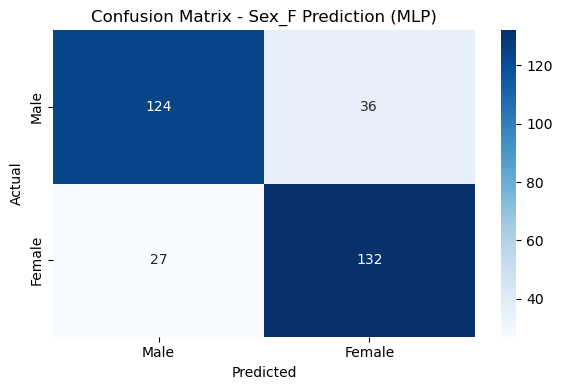

In [61]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load training data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Extract target columns ===
y_adhd = metadata['ADHD_Outcome'].astype(int).values
y_sex = metadata['Sex_F'].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# === 3. One-hot encode metadata ===
X_meta_encoded = pd.get_dummies(X_meta)
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 4. ADHD_Outcome model (MLP) ===
X_train_adhd, X_test_adhd, y_train_adhd, y_test_adhd = train_test_split(
    X_combined, y_adhd, test_size=0.2, random_state=42
)

scaler_adhd = StandardScaler()
X_train_adhd_scaled = scaler_adhd.fit_transform(X_train_adhd)
X_test_adhd_scaled = scaler_adhd.transform(X_test_adhd)

mlp_model_adhd = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42
)

mlp_model_adhd.fit(X_train_adhd_scaled, y_train_adhd)
y_pred_adhd = mlp_model_adhd.predict(X_test_adhd_scaled)

print("✅ ADHD_Outcome Accuracy (MLP):", accuracy_score(y_test_adhd, y_pred_adhd))
print("\n📊 Classification Report for ADHD_Outcome (MLP):")
print(classification_report(y_test_adhd, y_pred_adhd))

# === 5. Sex_F model (MLP + SMOTE) ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_combined, y_sex)

X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

scaler_sex = StandardScaler()
X_train_sex_scaled = scaler_sex.fit_transform(X_train_sex)
X_test_sex_scaled = scaler_sex.transform(X_test_sex)

mlp_model_sex = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42
)

mlp_model_sex.fit(X_train_sex_scaled, y_train_sex)
y_pred_sex = mlp_model_sex.predict(X_test_sex_scaled)

print("✅ Sex_F Accuracy (MLP):", accuracy_score(y_test_sex, y_pred_sex))
print("\n📊 Classification Report for Sex_F (MLP):")
print(classification_report(y_test_sex, y_pred_sex))

# === Confusion Matrix for Sex_F ===
cm = confusion_matrix(y_test_sex, y_pred_sex)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Sex_F Prediction (MLP)")
plt.tight_layout()
plt.show()


C:\Users\ADESH BUSARI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:26:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ ADHD_Outcome Accuracy: 0.7983539094650206

📊 Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.67      0.49      0.57        65
           1       0.83      0.91      0.87       178

    accuracy                           0.80       243
   macro avg       0.75      0.70      0.72       243
weighted avg       0.79      0.80      0.79       243

✅ Sex_F Accuracy (MLP): 0.8025078369905956

📊 Classification Report for Sex_F (MLP):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       160
           1       0.79      0.83      0.81       159

    accuracy                           0.80       319
   macro avg       0.80      0.80      0.80       319
weighted avg       0.80      0.80      0.80       319



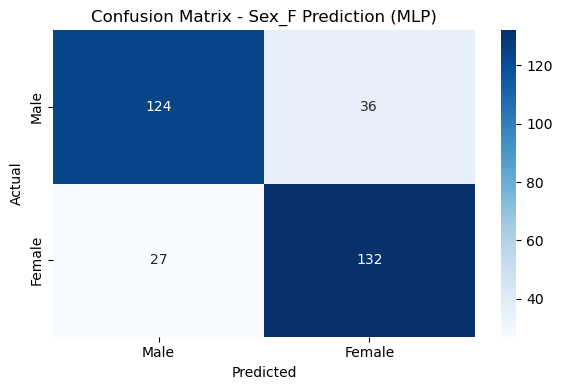

In [63]:
# final 76 one this code  ,,,
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load training data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Extract target columns ===
y_adhd = metadata['ADHD_Outcome'].astype(int).values
y_sex = metadata['Sex_F'].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# === 3. One-hot encode metadata ===
X_meta_encoded = pd.get_dummies(X_meta)
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 4. ADHD_Outcome model (XGBoost) ===
X_train_adhd, X_test_adhd, y_train_adhd, y_test_adhd = train_test_split(
    X_combined, y_adhd, test_size=0.2, random_state=42
)

scaler_adhd = StandardScaler()
X_train_adhd_scaled = scaler_adhd.fit_transform(X_train_adhd)
X_test_adhd_scaled = scaler_adhd.transform(X_test_adhd)

xgb_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train_adhd_scaled, y_train_adhd)
y_pred_adhd = xgb_model.predict(X_test_adhd_scaled)

print("✅ ADHD_Outcome Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))
print("\n📊 Classification Report for ADHD_Outcome:")
print(classification_report(y_test_adhd, y_pred_adhd))

# === 5. Sex_F model (MLP + SMOTE) ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_combined, y_sex)

X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

scaler_sex = StandardScaler()
X_train_sex_scaled = scaler_sex.fit_transform(X_train_sex)
X_test_sex_scaled = scaler_sex.transform(X_test_sex)

mlp_model_sex = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42
)

mlp_model_sex.fit(X_train_sex_scaled, y_train_sex)
y_pred_sex = mlp_model_sex.predict(X_test_sex_scaled)

print("✅ Sex_F Accuracy (MLP):", accuracy_score(y_test_sex, y_pred_sex))
print("\n📊 Classification Report for Sex_F (MLP):")
print(classification_report(y_test_sex, y_pred_sex))

# === Confusion Matrix for Sex_F ===
cm = confusion_matrix(y_test_sex, y_pred_sex)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Sex_F Prediction (MLP)")
plt.tight_layout()
plt.show()

✅ ADHD_Outcome Accuracy (MLP): 0.7325102880658436

📊 Classification Report for ADHD_Outcome (MLP):
              precision    recall  f1-score   support

           0       0.50      0.57      0.53        65
           1       0.83      0.79      0.81       178

    accuracy                           0.73       243
   macro avg       0.67      0.68      0.67       243
weighted avg       0.74      0.73      0.74       243

✅ Sex_F Accuracy (MLP): 0.8025078369905956

📊 Classification Report for Sex_F (MLP):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       160
           1       0.79      0.83      0.81       159

    accuracy                           0.80       319
   macro avg       0.80      0.80      0.80       319
weighted avg       0.80      0.80      0.80       319



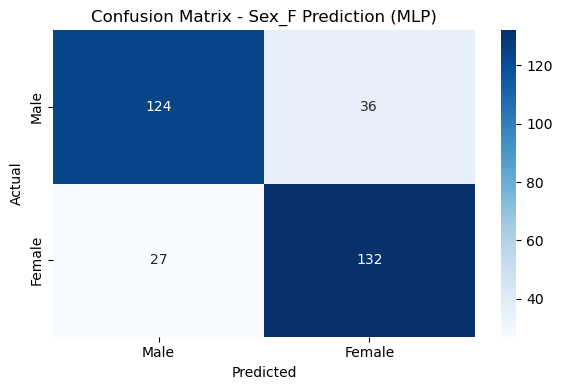

In [65]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load training data ===
data = np.load("final_preprocessed_for_modeling100.npy", allow_pickle=True).item()
functional_matrix = data['functional_matrix_pca']
metadata = pd.DataFrame(data['metadata'])

# === 2. Extract target columns ===
y_adhd = metadata['ADHD_Outcome'].astype(int).values
y_sex = metadata['Sex_F'].astype(int).values
X_meta = metadata.drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore')

# === 3. One-hot encode metadata ===
X_meta_encoded = pd.get_dummies(X_meta)
X_combined = np.hstack((functional_matrix, X_meta_encoded.values))

# === 4. ADHD_Outcome model (MLP) ===
X_train_adhd, X_test_adhd, y_train_adhd, y_test_adhd = train_test_split(
    X_combined, y_adhd, test_size=0.2, random_state=42
)

scaler_adhd = StandardScaler()
X_train_adhd_scaled = scaler_adhd.fit_transform(X_train_adhd)
X_test_adhd_scaled = scaler_adhd.transform(X_test_adhd)

# More complex MLP architecture
mlp_model_adhd = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),  # Three hidden layers with 256, 128, and 64 neurons
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=1000,
    alpha=0.0001,  # Regularization term
    random_state=42,
    batch_size=64,  # Batch size to speed up training
    early_stopping=True,  # Stop training early if validation score is not improving
    validation_fraction=0.1,  # Fraction of training data for validation set
    n_iter_no_change=10  # Early stopping after 10 iterations of no improvement
)

mlp_model_adhd.fit(X_train_adhd_scaled, y_train_adhd)
y_pred_adhd = mlp_model_adhd.predict(X_test_adhd_scaled)

print("✅ ADHD_Outcome Accuracy (MLP):", accuracy_score(y_test_adhd, y_pred_adhd))
print("\n📊 Classification Report for ADHD_Outcome (MLP):")
print(classification_report(y_test_adhd, y_pred_adhd))

# === 5. Sex_F model (MLP + SMOTE) ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_combined, y_sex)

X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

scaler_sex = StandardScaler()
X_train_sex_scaled = scaler_sex.fit_transform(X_train_sex)
X_test_sex_scaled = scaler_sex.transform(X_test_sex)

mlp_model_sex = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42
)

mlp_model_sex.fit(X_train_sex_scaled, y_train_sex)
y_pred_sex = mlp_model_sex.predict(X_test_sex_scaled)

print("✅ Sex_F Accuracy (MLP):", accuracy_score(y_test_sex, y_pred_sex))
print("\n📊 Classification Report for Sex_F (MLP):")
print(classification_report(y_test_sex, y_pred_sex))

# === Confusion Matrix for Sex_F ===
cm = confusion_matrix(y_test_sex, y_pred_sex)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Sex_F Prediction (MLP)")
plt.tight_layout()
plt.show()


##                                                               THANK YOU